In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.impute import KNNImputer
import dask
from dask import delayed
import profile
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import rpy2
from sklearn.model_selection import train_test_split

In [2]:
#os.chdir('C:/Users/33698/Documents/M2_EBDS/Big Projet semestre/wetransfer_data-amf-classification-des-traider_2022-12-12_1445/data AMF Classification des TRAIDER')
#os.chdir("C:/Users/BAHJURY-T/Documents/ML project")
os.chdir("D:/Master2 EBDS/Document projet Machine learning/dataProjet/data AMF Classification des TRAIDER")

In [3]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
x_train=pd.read_csv('X_train.csv')
y_train=pd.read_csv('y_train.csv')
x_test=pd.read_csv('X_test.csv')
y_test=pd.read_csv('y_test.csv')

In [4]:
print('dim X train: ',x_train.shape)
print('dim Y train: ',y_train.shape)
print('dim X test: ',x_test.shape)
print('dim y tEST: ',y_test.shape)

dim X train:  (105782, 39)
dim Y train:  (86, 2)
dim X test:  (85304, 39)
dim y tEST:  (85, 2)


In [5]:
x_train.head()

Index    Share      Day     Trader       OTR        OCR         OMR  \
0      1   Isin_8  Date_24  Trader_10  2.272727   8.333333   12.500000   
1      2  Isin_87  Date_29  Trader_10  1.696629  25.166667   21.571429   
2      3  Isin_87  Date_23  Trader_10  1.482759  47.300000  118.250000   
3      4  Isin_12  Date_11  Trader_10  1.705882  14.500000   29.000000   
4      5  Isin_87   Date_9  Trader_10  1.517730  26.750000         NaN   

   min_time_two_events  mean_time_two_events  10_p_time_two_events  ...  \
0                  0.0           5117.830300              0.000000  ...   
1                  0.0           1846.968401              0.000074  ...   
2                  0.0            686.300630              0.000071  ...   
3                  0.0           2174.335265              0.000000  ...   
4                  0.0            944.008551              0.000071  ...   

   min_dt_TV1_TV2  mean_dt_TV1_TV2  med_dt_TV1_TV2  min_dt_TV1_TV3  \
0             NaN              NaN             NaN             NaN   
1             NaN              NaN             NaN             NaN   
2             NaN              NaN             NaN             NaN   
3             NaN              NaN             NaN             NaN   
4             NaN              NaN             NaN             NaN   

   mean_dt_TV1_TV3  med_dt_TV1_TV3  min_dt_TV1_TV4  mean_dt_TV1_TV4  \
0              NaN             NaN             NaN              NaN   
1              NaN             NaN             NaN              NaN   
2              NaN             NaN             NaN              NaN   
3              NaN             NaN             NaN              NaN   
4              NaN             NaN             NaN              NaN   

   med_dt_TV1_TV4  NbSecondWithAtLeatOneTrade  
0             NaN                           4  
1             NaN                          15  
2             NaN                          63  
3             NaN                           4  
4             NaN                          38  

[5 rows x 39 columns]

In [7]:
y_train.head()

Trader     type
0  Trader_285      MIX
1  Trader_114  NON HFT
2  Trader_110  NON HFT
3   Trader_57  NON HFT
4  Trader_128  NON HFT

In [8]:
x_test.head()

Index     Share      Day    Trader       OTR   OCR  OMR  \
0      1  Isin_106  Date_12  Adelaide  1.114754  68.0  NaN   
1      2   Isin_94   Date_2  Adelaide  1.666667   5.0  NaN   
2      3  Isin_106  Date_13  Adelaide  1.088235  37.0  NaN   
3      4  Isin_106   Date_7  Adelaide  2.250000   4.5  NaN   
4      5  Isin_106  Date_20  Adelaide  1.266667  19.0  NaN   

   min_time_two_events  mean_time_two_events  10_p_time_two_events  \
0             0.000012             22.905096              0.000061   
1             0.001970             67.630572              0.001970   
2             0.000000             39.506490              0.000000   
3             0.000000            103.378733              0.000000   
4             0.000026             49.417177              0.000063   

   med_time_two_events  25_p_time_two_events  75_p_time_two_events  \
0             0.003870              0.000196              0.340629   
1             0.005786              0.001970              0.008854   
2             0.000485              0.000070              2.182102   
3             0.004708              0.001081            230.002690   
4             0.000152              0.000065              0.339079   

   90_p_time_two_events  max_time_two_events  min_lifetime_cancel  \
0              4.720414            751.59094            283.95500   
1            270.505680            270.50568            270.52230   
2            250.331450            272.06940            272.06940   
3            389.484830            389.48483            230.00269   
4            129.889250            549.25635            237.76761   

   mean_lifetime_cancel  10_p_lifetime_cancel  med_lifetime_cancel  \
0            283.954987             283.95500            283.95500   
1            270.522308             270.52230            270.52230   
2            272.069397             272.06940            272.06940   
3            309.743759             230.00269            230.00269   
4            237.767609             237.76761            237.76761   

   25_p_lifetime_cancel  75_p_lifetime_cancel  90_p_lifetime_cancel  \
0             283.95500             283.95500             283.95500   
1             270.52230             270.52230             270.52230   
2             272.06940             272.06940             272.06940   
3             230.00269             389.48483             389.48483   
4             237.76761             237.76761             237.76761   

   max_lifetime_cancel  NbTradeVenueMic  MaxNbTradesBySecond  \
0            283.95500                1                   19   
1            270.52230                1                    3   
2            272.06940                1                   13   
3            389.48483                1                    3   
4            237.76761                1                    6   

   MeanNbTradesBySecond  min_dt_TV1  mean_dt_TV1  med_dt_TV1  min_dt_TV1_TV2  \
0              3.812500       0.001   514.483186       0.005             NaN   
1              3.000000       0.002     0.004000       0.002             NaN   
2              5.666667       0.001   124.194500       1.400             NaN   
3              2.000000       0.001     0.261333       0.004             NaN   
4              3.000000       0.001  4621.266333       0.339             NaN   

   mean_dt_TV1_TV2  med_dt_TV1_TV2  min_dt_TV1_TV3  mean_dt_TV1_TV3  \
0              NaN             NaN             NaN              NaN   
1              NaN             NaN             NaN              NaN   
2              NaN             NaN             NaN              NaN   
3              NaN             NaN             NaN              NaN   
4              NaN             NaN             NaN              NaN   

   med_dt_TV1_TV3  min_dt_TV1_TV4  mean_dt_TV1_TV4  med_dt_TV1_TV4  \
0             NaN             NaN              NaN             NaN   
1             NaN             NaN              NaN             NaN   
2             NaN     

In [9]:
y_test.head()

Trader     type
0       Adelaide  NON HFT
1          Alana  NON HFT
2        Alcmene      MIX
3          Alice      MIX
4  Alices Sister  NON HFT

In [7]:
df_train=pd.merge(y_train,x_train, on='Trader')
df_train.head()

Trader type  Index     Share      Day       OTR   OCR  OMR  \
0  Trader_285  MIX  58849  Isin_108   Date_2  1.428571  10.0  NaN   
1  Trader_285  MIX  58850    Isin_7  Date_11       NaN   2.0  NaN   
2  Trader_285  MIX  58851   Isin_62  Date_25  1.500000   7.0  NaN   
3  Trader_285  MIX  58852   Isin_27  Date_29  1.050633  83.0  NaN   
4  Trader_285  MIX  58853  Isin_118  Date_11       NaN   2.0  NaN   

   min_time_two_events  mean_time_two_events  ...  min_dt_TV1_TV2  \
0                0.000              2.013731  ...           0.018   
1            21258.127          21258.126953  ...           0.021   
2                0.000           4269.648575  ...             NaN   
3                0.000              1.728176  ...          65.660   
4            21261.256          21261.255859  ...           0.020   

   mean_dt_TV1_TV2  med_dt_TV1_TV2  min_dt_TV1_TV3  mean_dt_TV1_TV3  \
0       420.371000          51.083           0.017        17.039333   
1        13.355429           0.644           0.021        20.416500   
2              NaN             NaN             NaN              NaN   
3        65.660000          65.660          65.660        65.660000   
4         2.687125           0.021           0.020         3.676200   

   med_dt_TV1_TV3  min_dt_TV1_TV4  mean_dt_TV1_TV4  med_dt_TV1_TV4  \
0           0.018           0.018        17.039667           0.018   
1           0.021           0.021        20.416500           0.021   
2             NaN             NaN              NaN             NaN   
3          65.660          65.660        65.660000          65.660   
4           0.021           0.020        16.099333           0.021   

   NbSecondWithAtLeatOneTrade  
0                          52  
1                          14  
2                           1  
3                          82  
4                          12  

[5 rows x 40 columns]

In [8]:
df_test=pd.merge(y_test,x_test, on='Trader')
df_test.head()

Trader     type  Index     Share      Day       OTR   OCR  OMR  \
0  Adelaide  NON HFT      1  Isin_106  Date_12  1.114754  68.0  NaN   
1  Adelaide  NON HFT      2   Isin_94   Date_2  1.666667   5.0  NaN   
2  Adelaide  NON HFT      3  Isin_106  Date_13  1.088235  37.0  NaN   
3  Adelaide  NON HFT      4  Isin_106   Date_7  2.250000   4.5  NaN   
4  Adelaide  NON HFT      5  Isin_106  Date_20  1.266667  19.0  NaN   

   min_time_two_events  mean_time_two_events  ...  min_dt_TV1_TV2  \
0             0.000012             22.905096  ...             NaN   
1             0.001970             67.630572  ...             NaN   
2             0.000000             39.506490  ...             NaN   
3             0.000000            103.378733  ...             NaN   
4             0.000026             49.417177  ...             NaN   

   mean_dt_TV1_TV2  med_dt_TV1_TV2  min_dt_TV1_TV3  mean_dt_TV1_TV3  \
0              NaN             NaN             NaN              NaN   
1              NaN             NaN             NaN              NaN   
2              NaN             NaN             NaN              NaN   
3              NaN             NaN             NaN              NaN   
4              NaN             NaN             NaN              NaN   

   med_dt_TV1_TV3  min_dt_TV1_TV4  mean_dt_TV1_TV4  med_dt_TV1_TV4  \
0             NaN             NaN              NaN             NaN   
1             NaN             NaN              NaN             NaN   
2             NaN             NaN              NaN             NaN   
3             NaN             NaN              NaN             NaN   
4             NaN             NaN              NaN             NaN   

   NbSecondWithAtLeatOneTrade  
0                          16  
1                           1  
2                           6  
3                           2  
4                           5  

[5 rows x 40 columns]

In [9]:
df_train['sample']='train'
df_test['sample']='test'

In [10]:

df=pd.concat([df_train,df_test], ignore_index=True)
df.head()

Trader type  Index     Share      Day       OTR   OCR  OMR  \
0  Trader_285  MIX  58849  Isin_108   Date_2  1.428571  10.0  NaN   
1  Trader_285  MIX  58850    Isin_7  Date_11       NaN   2.0  NaN   
2  Trader_285  MIX  58851   Isin_62  Date_25  1.500000   7.0  NaN   
3  Trader_285  MIX  58852   Isin_27  Date_29  1.050633  83.0  NaN   
4  Trader_285  MIX  58853  Isin_118  Date_11       NaN   2.0  NaN   

   min_time_two_events  mean_time_two_events  ...  mean_dt_TV1_TV2  \
0                0.000              2.013731  ...       420.371000   
1            21258.127          21258.126953  ...        13.355429   
2                0.000           4269.648575  ...              NaN   
3                0.000              1.728176  ...        65.660000   
4            21261.256          21261.255859  ...         2.687125   

   med_dt_TV1_TV2  min_dt_TV1_TV3  mean_dt_TV1_TV3  med_dt_TV1_TV3  \
0          51.083           0.017        17.039333           0.018   
1           0.644           0.021        20.416500           0.021   
2             NaN             NaN              NaN             NaN   
3          65.660          65.660        65.660000          65.660   
4           0.021           0.020         3.676200           0.021   

   min_dt_TV1_TV4  mean_dt_TV1_TV4  med_dt_TV1_TV4  \
0           0.018        17.039667           0.018   
1           0.021        20.416500           0.021   
2             NaN              NaN             NaN   
3          65.660        65.660000          65.660   
4           0.020        16.099333           0.021   

   NbSecondWithAtLeatOneTrade  sample  
0                          52   train  
1                          14   train  
2                           1   train  
3                          82   train  
4                          12   train  

[5 rows x 41 columns]

# EXPLANATORY DATA ANALYSIS

## Descriptive Statistics

In [29]:
import researchpy as rp

In [15]:
rp.summary_cat(df['type'])

Variable  Outcome  Count  Percent
0     type      MIX  86364    45.20
1           NON HFT  55839    29.22
2               HFT  48883    25.58

In [18]:
rp.crosstab(df["type"], df["sample"])

sample               
sample     test  train     All
type                          
HFT       31950  16933   48883
MIX       51483  34881   86364
NON HFT   22349  33490   55839
All      105782  85304  191086

In [19]:
rp.crosstab(df["type"], df["sample"], prop = "col")

sample                
sample     test   train     All
type                           
HFT       30.20   19.85   25.58
MIX       48.67   40.89   45.20
NON HFT   21.13   39.26   29.22
All      100.00  100.00  100.00

#### Size of our database

In [20]:
print(f'Our original dataset have \n{df.shape[0]} rows \nand {df.shape[1]} columns')

Our original dataset have 
191086 rows 
and 41 columns


#### Here is the type of all the variables in our database

below we the type of each columns in our dataset

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191086 entries, 0 to 191085
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Trader                      191086 non-null  object 
 1   type                        191086 non-null  object 
 2   Index                       191086 non-null  int64  
 3   Share                       191086 non-null  object 
 4   Day                         191086 non-null  object 
 5   OTR                         187825 non-null  float64
 6   OCR                         191086 non-null  float64
 7   OMR                         104951 non-null  float64
 8   min_time_two_events         191086 non-null  float64
 9   mean_time_two_events        191086 non-null  float64
 10  10_p_time_two_events        191086 non-null  float64
 11  med_time_two_events         191086 non-null  float64
 12  25_p_time_two_events        191086 non-null  float64
 13  75_p_time_two_

In [12]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

Index       OTR   OCR  OMR  min_time_two_events  mean_time_two_events  \
0  58849  1.428571  10.0  NaN                0.000              2.013731   
1  58850       NaN   2.0  NaN            21258.127          21258.126953   
2  58851  1.500000   7.0  NaN                0.000           4269.648575   
3  58852  1.050633  83.0  NaN                0.000              1.728176   
4  58853       NaN   2.0  NaN            21261.256          21261.255859   

   10_p_time_two_events  med_time_two_events  25_p_time_two_events  \
0                 0.000             0.000000                 0.000   
1             21258.127         21258.127000             21258.127   
2                 0.000           651.518100                 0.000   
3                 0.000             0.000435                 0.000   
4             21261.256         21261.256000             21261.256   

   75_p_time_two_events  ...  mean_dt_TV1_TV2  med_dt_TV1_TV2  min_dt_TV1_TV3  \
0              4.027461  ...       420.371000          51.083           0.017   
1          21258.127000  ...        13.355429           0.644           0.021   
2           3377.453100  ...              NaN             NaN             NaN   
3              0.003303  ...        65.660000          65.660          65.660   
4          21261.256000  ...         2.687125           0.021           0.020   

   mean_dt_TV1_TV3  med_dt_TV1_TV3  min_dt_TV1_TV4  mean_dt_TV1_TV4  \
0        17.039333           0.018           0.018        17.039667   
1        20.416500           0.021           0.021        20.416500   
2              NaN             NaN             NaN              NaN   
3        65.660000          65.660          65.660        65.660000   
4         3.676200           0.021           0.020        16.099333   

   med_dt_TV1_TV4  NbSecondWithAtLeatOneTrade  jours  
0           0.018                          52      2  
1           0.021                          14     11  
2             NaN                           1     25  
3          65.660                          82     29  
4           0.021                          12     11  

[5 rows x 37 columns]

In [13]:
print(df_num.shape)
print(f'\nWe have {df_num.duplicated().sum()} ')

(191086, 37)

We have 0 


## We now make a statistical description of all our variables 

In [14]:

df_num.drop('Index',axis=1).describe().round(5)

OTR           OCR           OMR  min_time_two_events  \
count  187825.00000  191086.00000  104951.00000         191086.00000   
mean       34.64817      17.35128     139.15472             90.25375   
std       147.70481      62.49230     731.85172           1548.24361   
min         1.04040       2.00000       1.00182              0.00000   
25%         3.84615       2.68632       2.94930              0.00000   
50%         7.93565       4.65881      13.84615              0.00000   
75%        23.76502      16.39130      66.74141              0.00000   
max     20446.00000   14409.00000  127861.00000          52568.76600   

       mean_time_two_events  10_p_time_two_events  med_time_two_events  \
count          191086.00000          191086.00000         191086.00000   
mean             2907.64341             115.83977           1214.65229   
std              5316.89439            1688.90806           5563.61735   
min                 0.00004               0.00000              0.00000   
25%                76.36091               0.00000              1.56433   
50%               270.57643               0.00013             11.48139   
75%              3796.43664               0.03368             65.31084   
max             52568.76562           52568.76600          52568.76600   

       25_p_time_two_events  75_p_time_two_events  90_p_time_two_events  ...  \
count          191086.00000          191086.00000          191086.00000  ...   
mean              302.73035            5031.93766           10006.04626  ...   
std              2763.47015           10906.08606           14516.55636  ...   
min                 0.00000               0.00000               0.00000  ...   
25%                 0.00007              24.69793             127.99684  ...   
50%                 0.12179             121.95816             504.95096  ...   
75%                 3.29137            2374.82665           21517.74025  ...   
max             52568.76600           60597.41400           60609.66000  ...   

       mean_dt_TV1_TV2  med_dt_TV1_TV2  min_dt_TV1_TV3  mean_dt_TV1_TV3  \
count     144756.00000    144756.00000    144566.00000     144566.00000   
mean         637.09408       411.73375       338.27856        648.60358   
std         2065.01964      1937.88539      1979.96593       2104.59376   
min            0.00000         0.00000         0.00000          0.00000   
25%           36.18289         2.83494         0.00001         35.16997   
50%          117.41757        23.79050         0.00033        117.65693   
75%          390.67475       126.52890         0.08400        400.27708   
max        30919.32300     30919.32300     30919.32300      30919.32300   

       med_dt_TV1_TV3  min_dt_TV1_TV4  mean_dt_TV1_TV4  med_dt_TV1_TV4  \
count    144566.00000    144605.00000     144605.00000    144605.00000   
mean        430.88253       340.15735        653.70517       432.72387   
std        1990.94723      1978.53876       2109.43585      1990.24867   
min           0.00000         0.00000          0.00000         0.00000   
25%           2.62341         0.00002         36.22523         2.82068   
50%          25.06941         0.00035        118.03049        24.60369   
75%         134.55930         0.09306        399.43437       134.92300   
max       30919.32300     30919.32300      30919.32300     30919.32300   

       NbSecondWithAtLeatOneTrade         jours  
count                191086.00000  191086.00000  
mean                    301.51785      14.13996  
std                     575.12290       8.24123  
min                       1.00000       1.00000  
25%                      21.00000       7.00000  
50%                      88.00000      13.00000  
75%                     315.00000      20.00000  
max                   12966.00000      30.00000  

[8 rows x 36 columns]

We can see from this description that there are columns in our database that have missing values.  And probably some outliers. That's why interpreted the statistics of base because the average is impacted by this presence. Let's take a closer look to identify the columns and the number of missing values of each column

### Now we will look at the statistics according to each modality of our target variable

In [25]:
df_num.groupby('type').mean()

Index        OTR        OCR         OMR  min_time_two_events  \
type                                                                           
HFT      47464.317738  57.299806  16.814434  124.078791            90.831113   
MIX      50468.889167  23.702673  14.251526  151.093467            16.152815   
NON HFT  45747.669639  31.920105  22.615510  120.190719           204.357340   

         mean_time_two_events  10_p_time_two_events  med_time_two_events  \
type                                                                       
HFT               2575.607826             95.094701           929.777286   
MIX               1209.421331             19.160163           173.333040   
NON HFT           5824.890253            283.531149          3074.607527   

         25_p_time_two_events  75_p_time_two_events  ...  med_dt_TV1_TV2  \
type                                                 ...                   
HFT                153.995751           4342.665012  ...      385.244377   
MIX                 34.114811           2893.225166  ...      338.522383   
NON HFT            848.393873           8943.208990  ...      615.354415   

         min_dt_TV1_TV3  mean_dt_TV1_TV3  med_dt_TV1_TV3  min_dt_TV1_TV4  \
type                                                                       
HFT          313.536694       626.880688      403.424807      307.060799   
MIX          270.109181       530.383473      353.925617      269.046977   
NON HFT      528.480566       950.378233      644.975395      547.676808   

         mean_dt_TV1_TV4  med_dt_TV1_TV4  NbSecondWithAtLeatOneTrade  \
type                                                                   
HFT           625.863121      396.690218                  412.919583   
MIX           527.370155      351.503321                  352.212369   
NON HFT       981.467311      667.410144                  125.586472   

             jours  target  
type                        
HFT      14.742324     2.0  
MIX      14.403594     1.0  
NON HFT  13.204893     0.0  

[3 rows x 38 columns]

In [26]:
df_num.groupby('type').median()

Index        OTR        OCR        OMR  min_time_two_events  \
type                                                                     
HFT      55476.0  12.648479   3.009494  12.000000                  0.0   
MIX      44091.5   7.777460   4.403239  11.358601                  0.0   
NON HFT  49485.0   5.660000  12.000000  20.083333                  0.0   

         mean_time_two_events  10_p_time_two_events  med_time_two_events  \
type                                                                       
HFT                141.981853              0.000205             4.676257   
MIX                180.478891              0.000415            10.738841   
NON HFT           3545.684942              0.000007            36.097298   

         25_p_time_two_events  75_p_time_two_events  ...  med_dt_TV1_TV2  \
type                                                 ...                   
HFT                  0.059054             62.837933  ...       10.785647   
MIX                  0.416929             80.907813  ...       27.657489   
NON HFT              0.095961           1391.480100  ...       36.954360   

         min_dt_TV1_TV3  mean_dt_TV1_TV3  med_dt_TV1_TV3  min_dt_TV1_TV4  \
type                                                                       
HFT            0.000076       102.639810        12.04500        0.000143   
MIX            0.000584       103.448243        27.89000        0.000463   
NON HFT        0.001000       204.653393        41.73132        0.001000   

         mean_dt_TV1_TV4  med_dt_TV1_TV4  NbSecondWithAtLeatOneTrade  jours  \
type                                                                          
HFT           105.129664       12.832423                       101.0   13.0   
MIX           102.562612       26.406599                       150.0   13.0   
NON HFT       212.462265       44.343410                        32.0   12.0   

         target  
type             
HFT         2.0  
MIX         1.0  
NON HFT     0.0  

[3 rows x 38 columns]

In [27]:
df_num.groupby('type').std()

Index         OTR        OCR         OMR  min_time_two_events  \
type                                                                            
HFT      29473.164336  193.112047  70.466350  408.726631          1582.225332   
MIX      28932.115340  132.652495  64.495090  890.104641           538.518067   
NON HFT  26684.842074  118.964261  50.409265  394.978620          2354.023645   

         mean_time_two_events  10_p_time_two_events  med_time_two_events  \
type                                                                       
HFT               4931.653198           1610.872923          4803.398410   
MIX               2619.802382            550.463392          1375.862448   
NON HFT           7194.939426           2641.602210          8808.757891   

         25_p_time_two_events  75_p_time_two_events  ...  med_dt_TV1_TV2  \
type                                                 ...                   
HFT               1939.903071          10137.498591  ...     1902.709874   
MIX                621.911903           8928.712997  ...     1777.358113   
NON HFT           4670.403601          13075.881832  ...     2291.938127   

         min_dt_TV1_TV3  mean_dt_TV1_TV3  med_dt_TV1_TV3  min_dt_TV1_TV4  \
type                                                                       
HFT         1931.464558      2056.987567     1945.920907     1887.887002   
MIX         1831.552493      1934.529516     1840.470131     1826.444333   
NON HFT     2330.337251      2480.803794     2338.775254     2377.991821   

         mean_dt_TV1_TV4  med_dt_TV1_TV4  NbSecondWithAtLeatOneTrade  \
type                                                                   
HFT          2024.064514     1901.995042                  812.845443   
MIX          1930.081769     1836.057390                  532.441712   
NON HFT      2537.685416     2387.927345                  263.159779   

            jours  target  
type                       
HFT      8.394029     0.0  
MIX      8.314922     0.0  
NON HFT  7.906247     0.0  

[3 rows x 38 columns]

In [17]:
df_num['type']=pd.Categorical(df['type'])
rp.summary_cat(df_num['type'])

NameError: name 'rp' is not defined

In [18]:
df.head()

Trader type  Index     Share      Day       OTR   OCR  OMR  \
0  Trader_285  MIX  58849  Isin_108   Date_2  1.428571  10.0  NaN   
1  Trader_285  MIX  58850    Isin_7  Date_11       NaN   2.0  NaN   
2  Trader_285  MIX  58851   Isin_62  Date_25  1.500000   7.0  NaN   
3  Trader_285  MIX  58852   Isin_27  Date_29  1.050633  83.0  NaN   
4  Trader_285  MIX  58853  Isin_118  Date_11       NaN   2.0  NaN   

   min_time_two_events  mean_time_two_events  ...  med_dt_TV1_TV2  \
0                0.000              2.013731  ...          51.083   
1            21258.127          21258.126953  ...           0.644   
2                0.000           4269.648575  ...             NaN   
3                0.000              1.728176  ...          65.660   
4            21261.256          21261.255859  ...           0.021   

   min_dt_TV1_TV3  mean_dt_TV1_TV3  med_dt_TV1_TV3  min_dt_TV1_TV4  \
0           0.017        17.039333           0.018           0.018   
1           0.021        20.416500           0.021           0.021   
2             NaN              NaN             NaN             NaN   
3          65.660        65.660000          65.660          65.660   
4           0.020         3.676200           0.021           0.020   

   mean_dt_TV1_TV4  med_dt_TV1_TV4  NbSecondWithAtLeatOneTrade  sample  jours  
0        17.039667           0.018                          52   train      2  
1        20.416500           0.021                          14   train     11  
2              NaN             NaN                           1   train     25  
3        65.660000          65.660                          82   train     29  
4        16.099333           0.021                          12   train     11  

[5 rows x 42 columns]

In [19]:
# package allowing us to use R code in jupyter
pip install rpy2

SyntaxError: invalid syntax (3406038683.py, line 2)

In [20]:
#use r code in jupiter note book
import rpy2
%load_ext rpy2.ipython

C:\Users\thier\anaconda\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [21]:
%%R
#install.packages("visdat")
library(visdat)
#install.packages('parallel')
library(parallel)

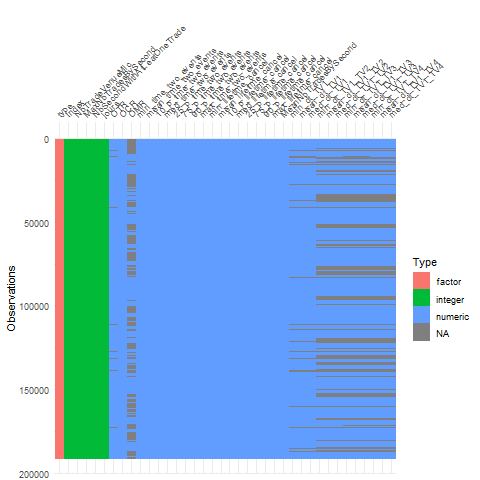

In [22]:
%%R -i df_num

df_num
vis_dat(df_num, warn_large_data = FALSE)


This graph shows us the visualization of the distribution of missing values by variables and the type of variables. 
We can see that there are more missing values for the variables the number of modification-type event (OMR) and statistics over the observed time delta between two trades occurring on trading venue (min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4)

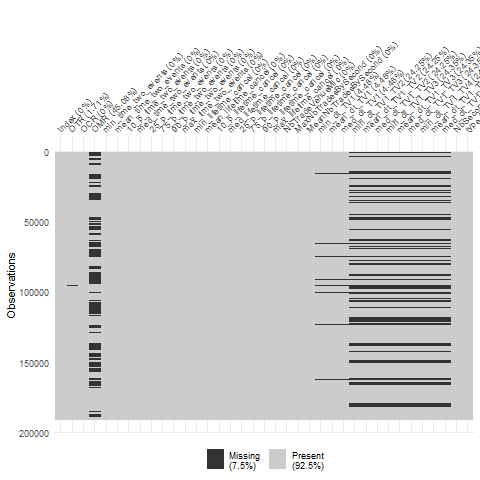

In [39]:
%%R
visdat::vis_miss(df_num, warn_large_data=FALSE)


In [41]:
%%R 
#install.packages('naniar')
library(naniar)

In [49]:
%%R
print(miss_var_summary(df_num), n=14)

# A tibble: 37 x 3
   variable        n_miss pct_miss
   <chr>            <int>    <dbl>
 1 OMR              86135    45.1 
 2 min_dt_TV1_TV3   46520    24.3 
 3 mean_dt_TV1_TV3  46520    24.3 
 4 med_dt_TV1_TV3   46520    24.3 
 5 min_dt_TV1_TV4   46481    24.3 
 6 mean_dt_TV1_TV4  46481    24.3 
 7 med_dt_TV1_TV4   46481    24.3 
 8 min_dt_TV1_TV2   46330    24.2 
 9 mean_dt_TV1_TV2  46330    24.2 
10 med_dt_TV1_TV2   46330    24.2 
11 min_dt_TV1        8552     4.48
12 mean_dt_TV1       8552     4.48
13 med_dt_TV1        8552     4.48
14 OTR               3261     1.71
# ... with 23 more rows
# i Use `print(n = ...)` to see more rows


On this graph we see not only the percentage of global missing values in our database but also the proportion of missing values per variable.

So we see that in the database we see that there is 7.5% of missing values and 92.5% of present values.

If we look in detail at the proportion of missing values we can see that the variable OMR has 45% of missing values, 24% of missing values for the variables min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4, min_dt_TV1_TV2,mean_dt_TV1_TV2, med_dt_TV1_TV2 ,min_dt_TV1_TV3, mean_dt_TV1_TV3, 4.48% for th variables min_dt_TV1, med_dt_TV1, mean_dt_TV1 and 1. 7% for the variable he number of cancellation-type event (OTR)


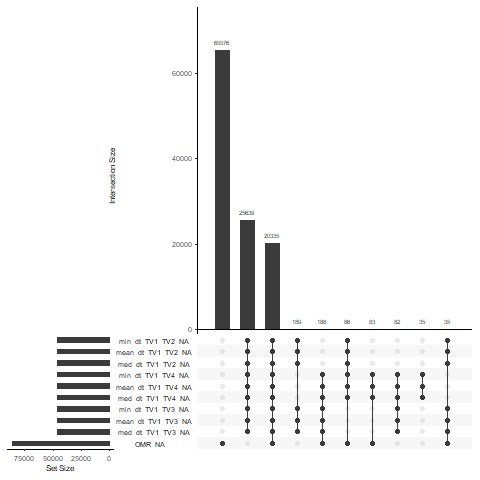

In [44]:
%%R 
naniar::gg_miss_upset(df_num, nsets = 10, nintersects = 10)

We observe on the graph above, the frequency of missing values and the visualization of missing values common between our min_dt_TV1_TV2,mean_dt_TV1_TV2, med_dt_TV1_TV2, med_dt_TV1_TV4, mean_dt_TV1_TV4 etc.. variables. We see the variables that have all the missing values on the rows.

#### Here is a dataframe of the variables with missing values with the shares in the original database


 Variables sorted by number of missings: 
                   Variable      Count
                        OMR 0.45076562
             min_dt_TV1_TV3 0.24345059
            mean_dt_TV1_TV3 0.24345059
             med_dt_TV1_TV3 0.24345059
             min_dt_TV1_TV4 0.24324650
            mean_dt_TV1_TV4 0.24324650
             med_dt_TV1_TV4 0.24324650
             min_dt_TV1_TV2 0.24245628
            mean_dt_TV1_TV2 0.24245628
             med_dt_TV1_TV2 0.24245628
                 min_dt_TV1 0.04475472
                mean_dt_TV1 0.04475472
                 med_dt_TV1 0.04475472
                        OTR 0.01706561
                      Index 0.00000000
                        OCR 0.00000000
        min_time_two_events 0.00000000
       mean_time_two_events 0.00000000
       10_p_time_two_events 0.00000000
        med_time_two_events 0.00000000
       25_p_time_two_events 0.00000000
       75_p_time_two_events 0.00000000
       90_p_time_two_events 0.00000000
        max_time_two_

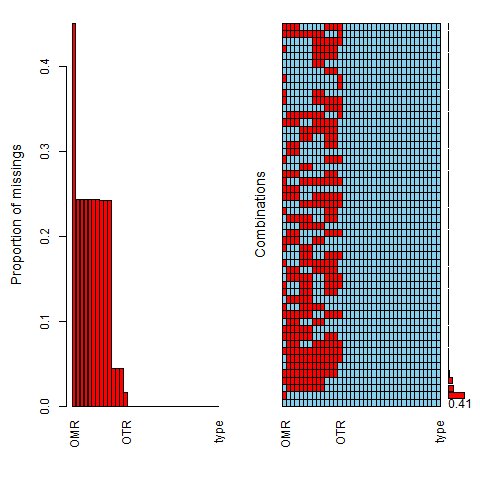

In [55]:
%%R
#install.packages('VIM')
# Visualize the pattern
library(VIM)
aggr(df_num,only.miss = TRUE,numbers = TRUE,sortVar = TRUE)

In [35]:
nb_na=df.isnull().sum()
number_of_na=nb_na[nb_na>0]
nb_obs=df.shape[0]
prop_na=((number_of_na.values)/nb_obs)*100
df_number_of_na=pd.DataFrame({'variable': number_of_na.index, 'number of na':number_of_na.values, 'prop na in data (%)': prop_na})
df_number_of_na
                              

variable  number of na  prop na in data (%)
0               OTR          3261             1.706561
1               OMR         86135            45.076562
2        min_dt_TV1          8552             4.475472
3       mean_dt_TV1          8552             4.475472
4        med_dt_TV1          8552             4.475472
5    min_dt_TV1_TV2         46330            24.245628
6   mean_dt_TV1_TV2         46330            24.245628
7    med_dt_TV1_TV2         46330            24.245628
8    min_dt_TV1_TV3         46520            24.345059
9   mean_dt_TV1_TV3         46520            24.345059
10   med_dt_TV1_TV3         46520            24.345059
11   min_dt_TV1_TV4         46481            24.324650
12  mean_dt_TV1_TV4         46481            24.324650
13   med_dt_TV1_TV4         46481            24.324650

#### We make a visual of these missing values, to well apprehend 

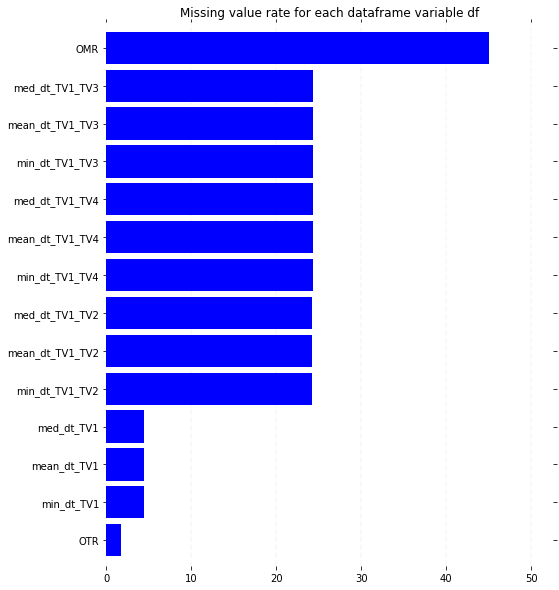

In [36]:
size = df.shape
nan_values = df.isna().sum()
nb_na=df.isnull().sum()
number_of_na=nb_na[nb_na>0]
nan_values=number_of_na
nan_values = nan_values.sort_values(ascending=True)*100/size[0]

ax = nan_values.plot(kind='barh', 
                     figsize=(8, 10), 
                     color='#0000FF',
                     zorder=2,
                     width=0.85)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis="both", 
               which="both", 
               bottom="off", 
               top="off", 
               labelbottom="on", 
               left="off", 
               right="off", 
               labelleft="on")
ax.set_title("Missing value rate for each dataframe variable df")
vals = ax.get_xticks()

for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)


We observe that our dataset contains 533045 missing values in 14 features. Let's look at them in more detail

In [37]:
for var in df_number_of_na.variable:
    print(f'number of missing values {var} according to the target variable')
    print(df.loc[df[var].isnull(),'type'].value_counts())
    print('\n\n---------------------------------------------------------------')

number of missing values OTR according to the target variable
NON HFT    1638
HFT         949
MIX         674
Name: type, dtype: int64


---------------------------------------------------------------
number of missing values OMR according to the target variable
HFT        32049
NON HFT    30009
MIX        24077
Name: type, dtype: int64


---------------------------------------------------------------
number of missing values min_dt_TV1 according to the target variable
NON HFT    4169
HFT        2316
MIX        2067
Name: type, dtype: int64


---------------------------------------------------------------
number of missing values mean_dt_TV1 according to the target variable
NON HFT    4169
HFT        2316
MIX        2067
Name: type, dtype: int64


---------------------------------------------------------------
number of missing values med_dt_TV1 according to the target variable
NON HFT    4169
HFT        2316
MIX        2067
Name: type, dtype: int64


----------------------------------

We see that our database has more than 53000 missing values. The presence of missing data has a huge problem on the performance of our models in terms of inference and prediction. The source of the missing data can be totally random (in this case the probability of missing data is the same for all observations and all variables with missing values) it is the MCAR, It can also be non-random or systemic (in this case the absence of missing data depends on the variables that have not been observed. 
To avoid problems of bias in our model, we will consider both situations. 
Considering that the presence of missing data is completely random, in this case we delete all the observations for which there is the presence of missing values. 
In a second time we will consider that the presence of missing values in our database is not random, in this case we proceed by the method of imputation. The imputation consists in replacing the missing values of the database by a value. There are several, we choose the method of KNN imputation despite the complexity but it is more efficient on a database like ours.

### Distribution of target variables

In [20]:
n=df.shape[0]
tab_target=df['type'].value_counts()
df_target=pd.DataFrame({'modality':tab_target.index, 'frequence':tab_target.values, 'prop in data (%)': (tab_target.values/n)*100})
df_target

modality  frequence  prop in data (%)
0      MIX      86364         45.196404
1  NON HFT      55839         29.221921
2      HFT      48883         25.581675

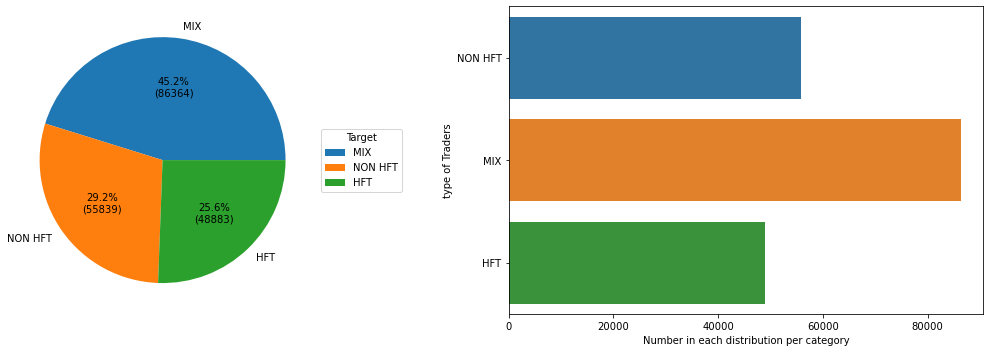

In [22]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)


fig = plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
plt.pie(df_target.frequence, labels = df_target.modality,
       autopct = lambda pct: func(pct, df_target.frequence))
plt.legend(df_target.modality,
          title ="Target",
          loc ="center left",
          bbox_to_anchor =(1, 0,0, 1))
plt.subplot(1,2,2)
sns.countplot(data=df, y='type')
plt.ylabel('type of Traders')
plt.xlabel('Number in each distribution per category')
plt.tight_layout()
plt.show()

We notice that traders of the MIX category are more represented in our database, i.e. 45.2% of all observations, then comes the NON HTF category 29.2% and finally the HTF category 25.6% of our database. 
These statistics indicate that our database is unbalanced, so we must take this into account in our prediction models. Otherwise, this imbalance may affect the performance of our machine learning models.

### Unimodal Data Visualisation

#### We look at the distribution of individual attributes in our dataset
#### HISTOGRAMS OF ALL attributes

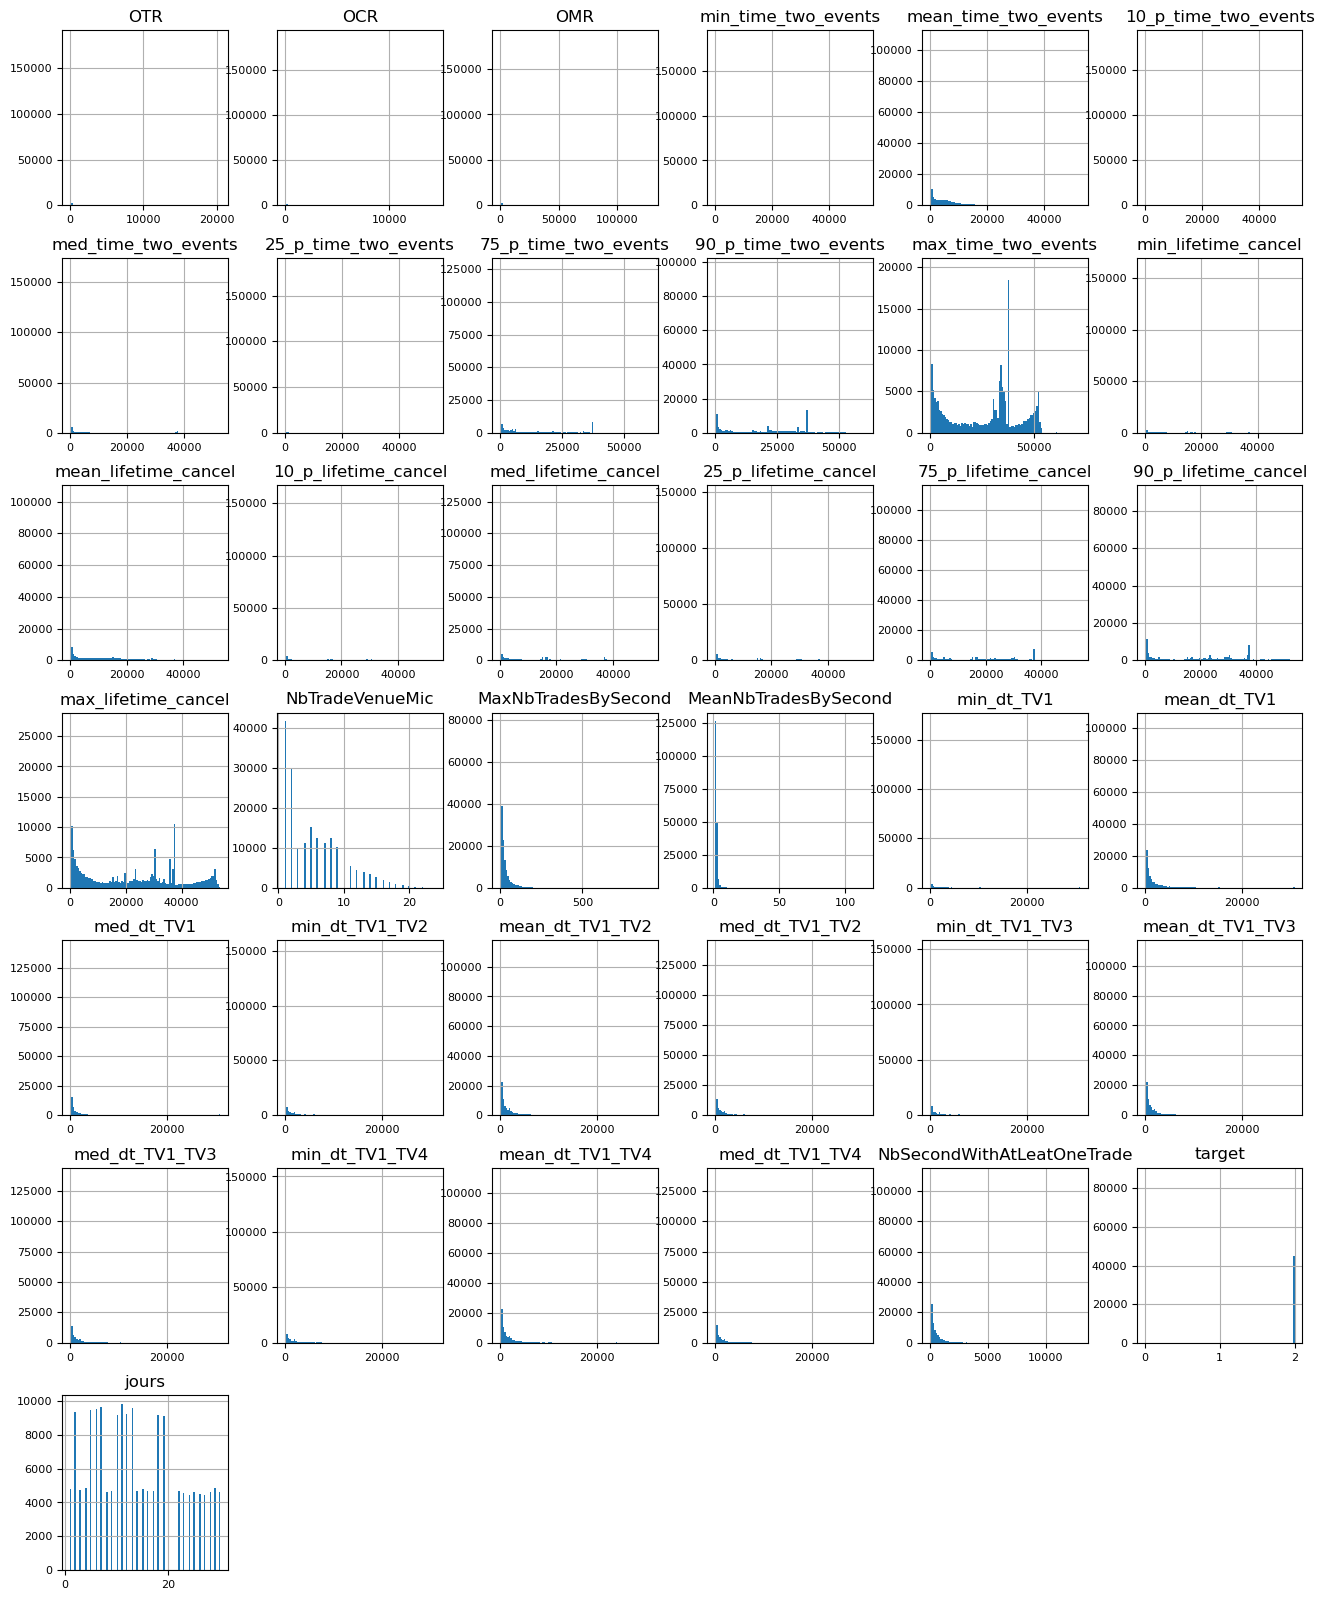

In [152]:
df_features.drop('Index',axis=1).hist(figsize=(16, 20), bins=100, xlabelsize=8, ylabelsize=8)
plt.show()

We see that the distribution of almost all of our variables is skewed to the right.
We can also see that the distribution of the variables OTR (the number of trades), OCR (the number of cancellation-type event), OMR (the number of modification-type event), 10_p_time_two_events, med_time_two_events, 25_p_time_two_events are almost not visible in spite of the fact of increasing the number of classes to 100 

In [56]:
%%R 
#install.packages('tidyverse')
library(tidyverse)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.4.0      v purrr   1.0.0 
v tibble  3.1.8      v dplyr   1.0.10
v tidyr   1.2.1      v stringr 1.5.0 
v readr   2.1.3      v forcats 0.5.2 
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x purrr::accumulate() masks foreach::accumulate()
x dplyr::filter()     masks stats::filter()
x dplyr::lag()        masks stats::lag()
x purrr::when()       masks foreach::when()


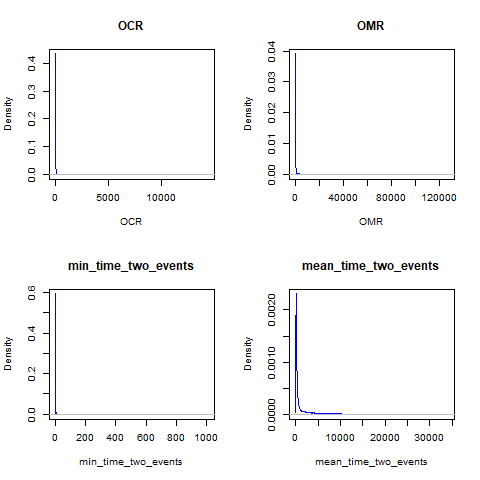

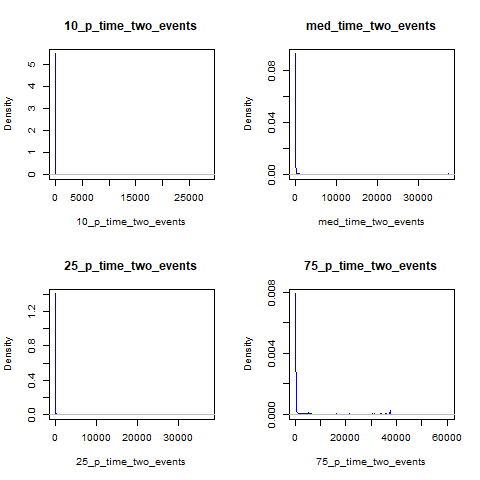

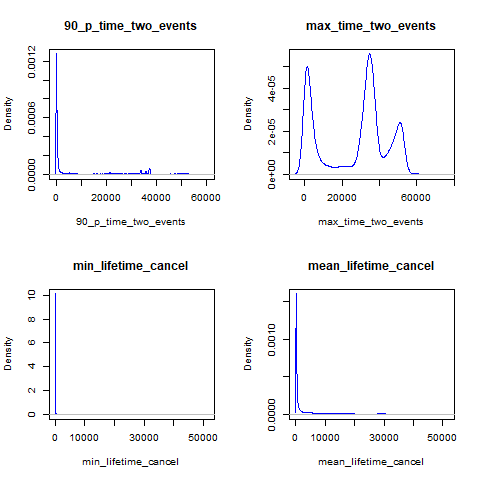

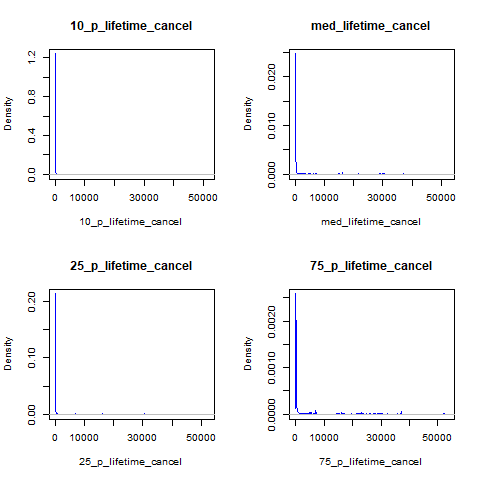

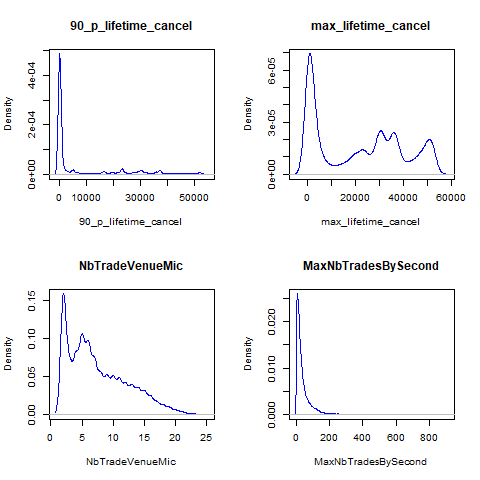

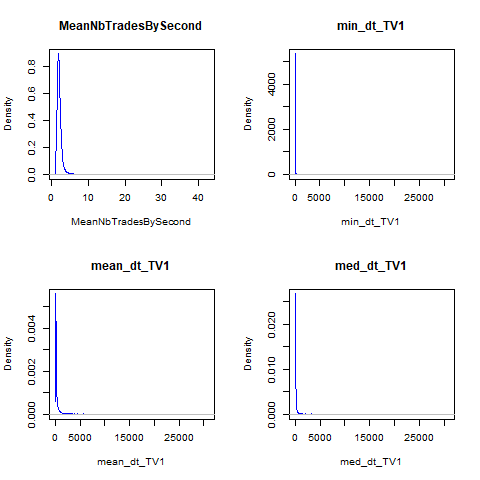

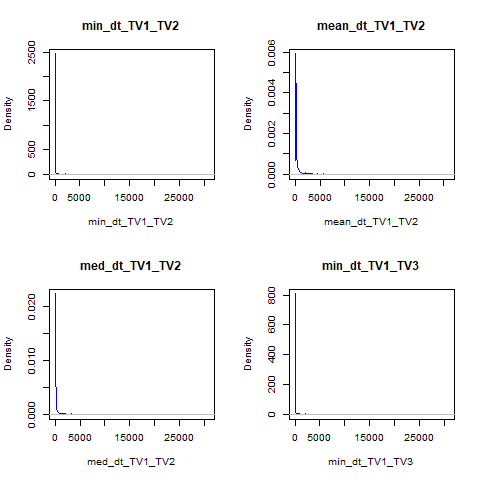

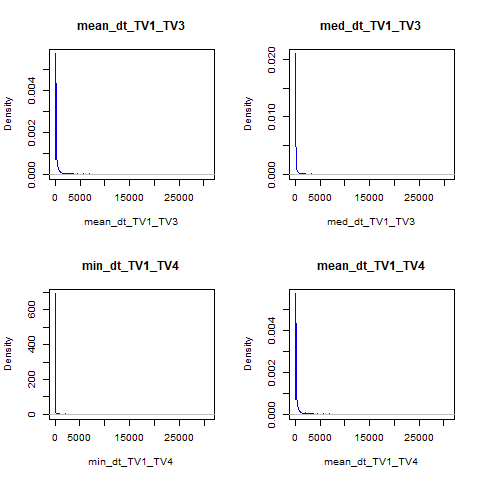

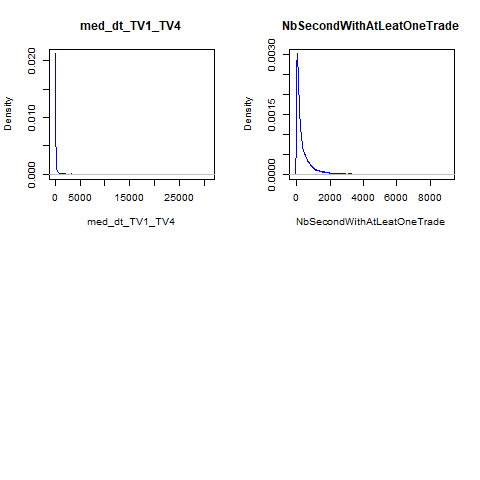

In [84]:
%%R -i df_num
df_num_R=df_num[,2:35]
par(mfrow=c(2,2))
col=dim(df_num_R)[2]
complet_cases<- complete.cases(df_num_R)
for (i in 1:col){
    plot(density(df_num_R[complet_cases,i]), main=names(df_num_R)[i], xlab=names(df_num_R)[i],col='blue', lwd=1)
}


As can be seen in the hystogram graph above, the density graph shows skewed distributions for all variables.

### Distribution of variables according to each modality of our target variables

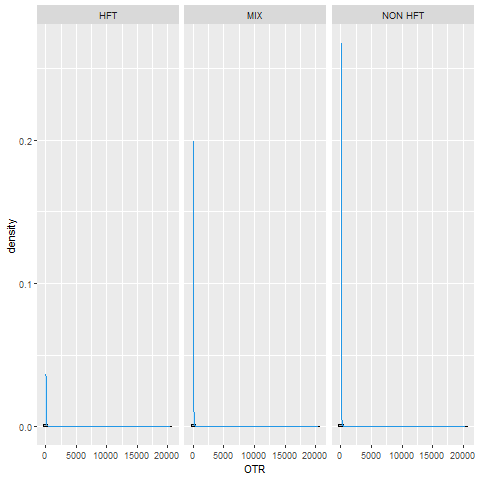

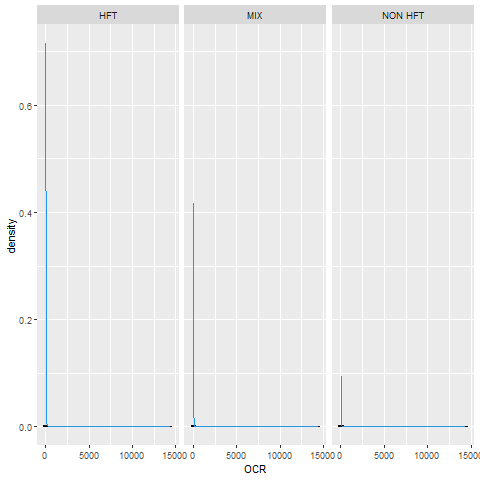

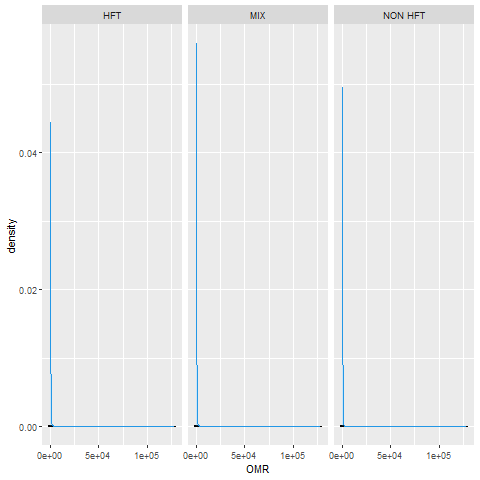

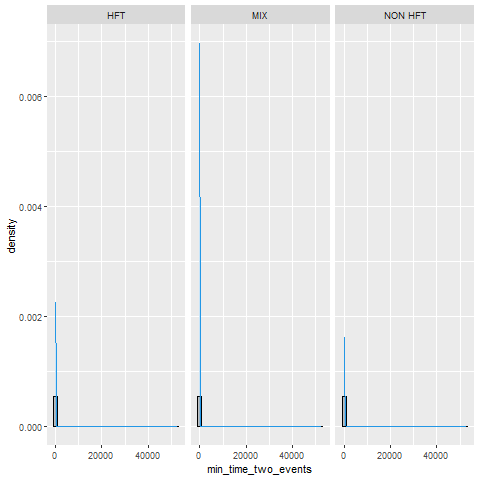

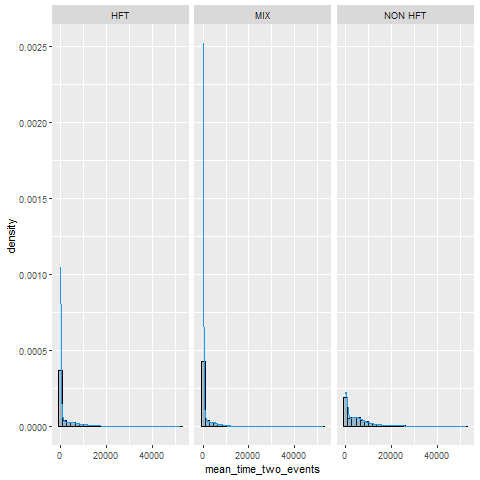

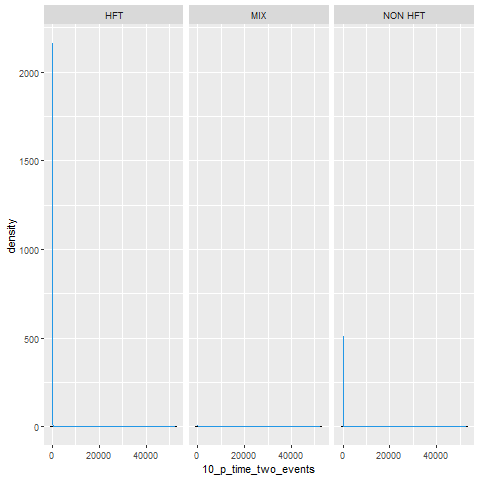

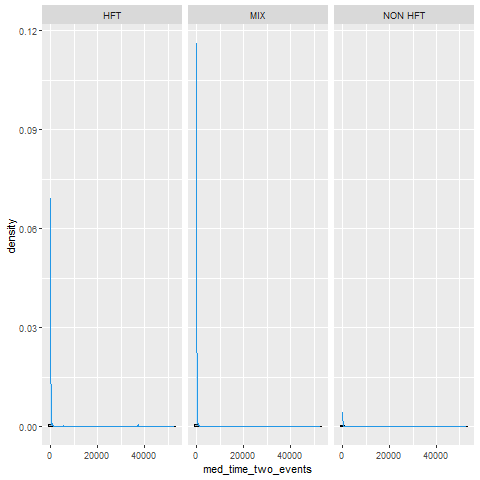

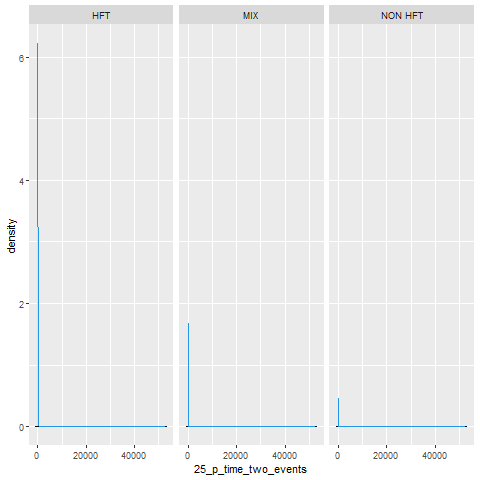

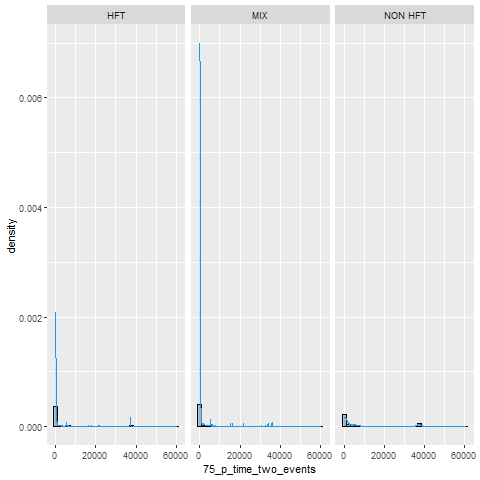

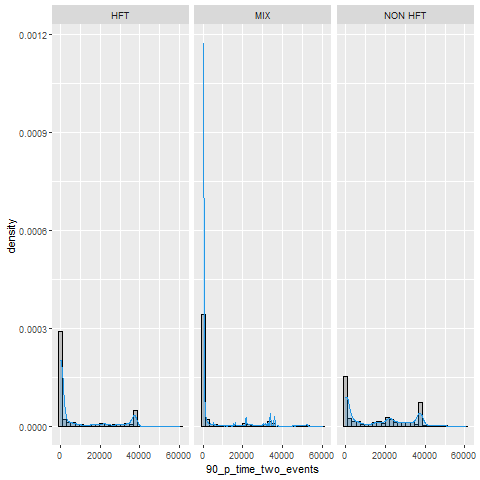

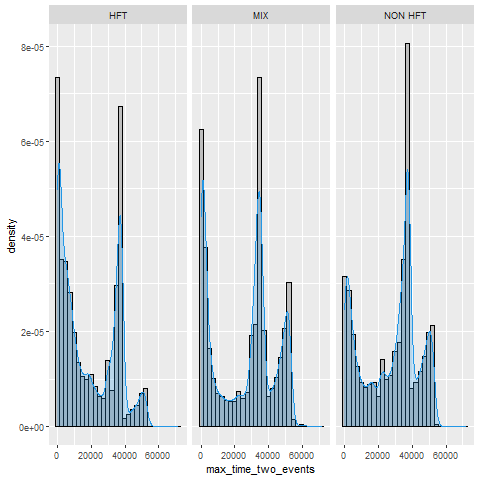

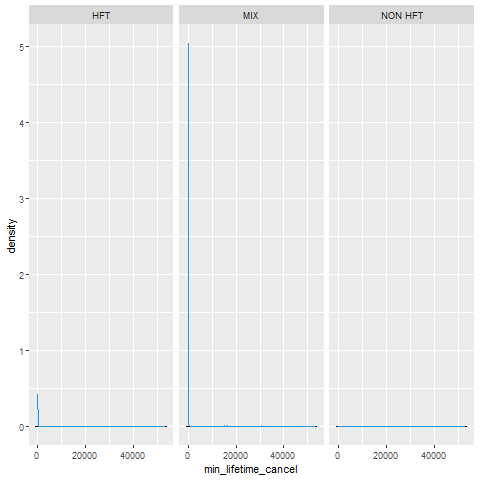

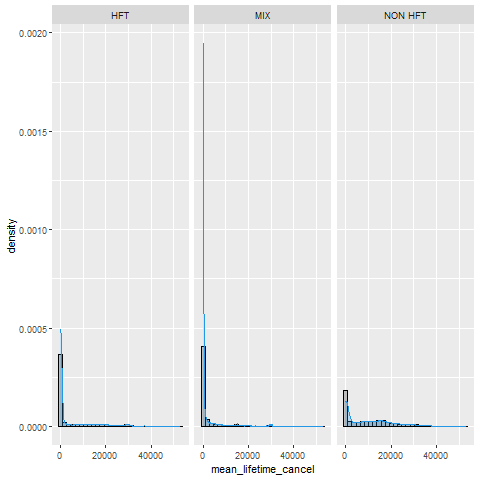

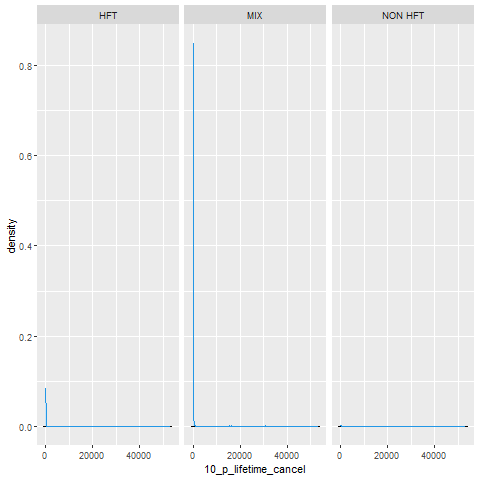

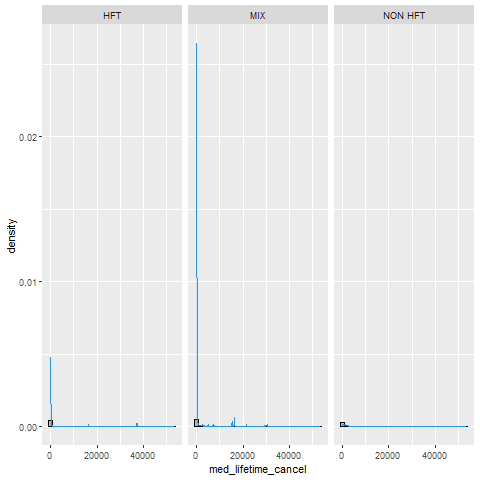

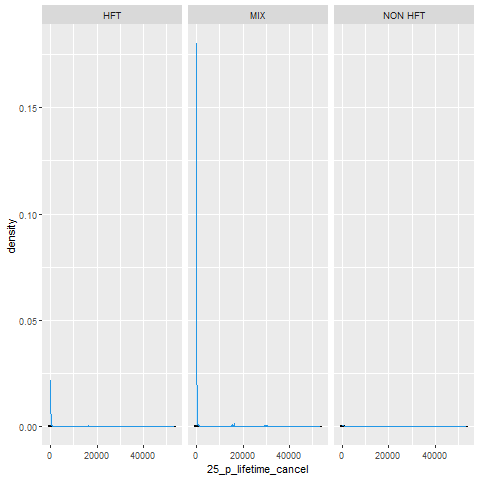

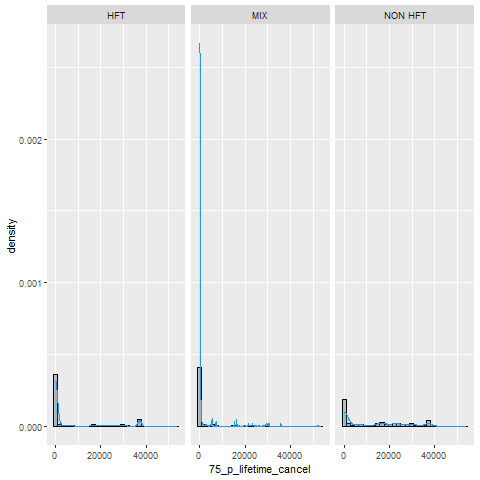

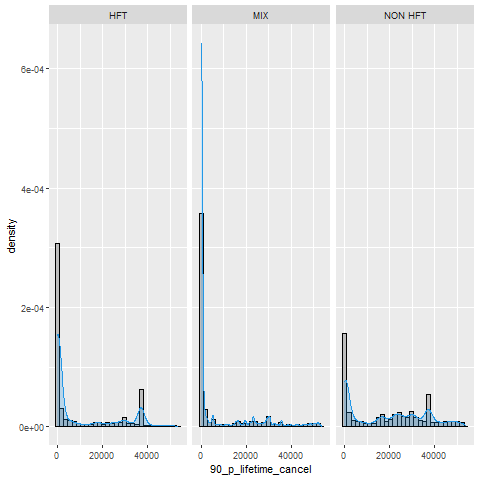

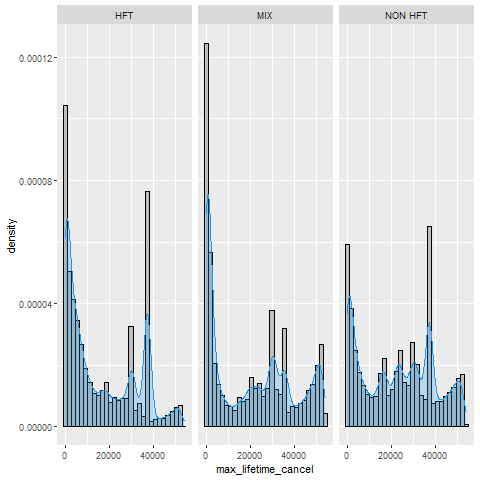

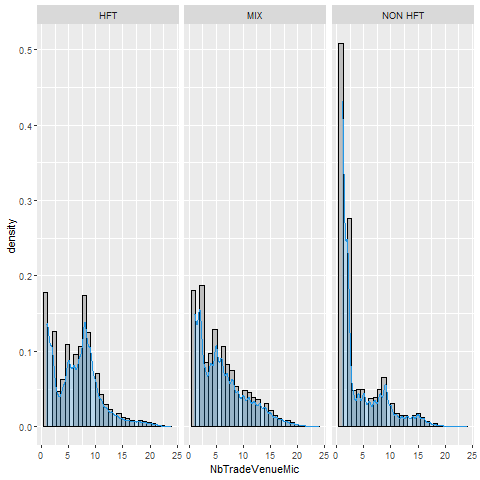

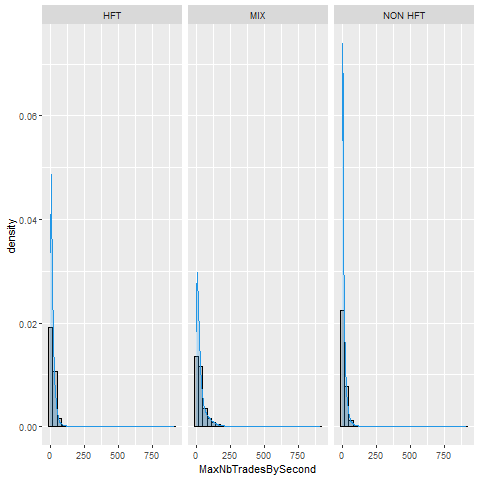

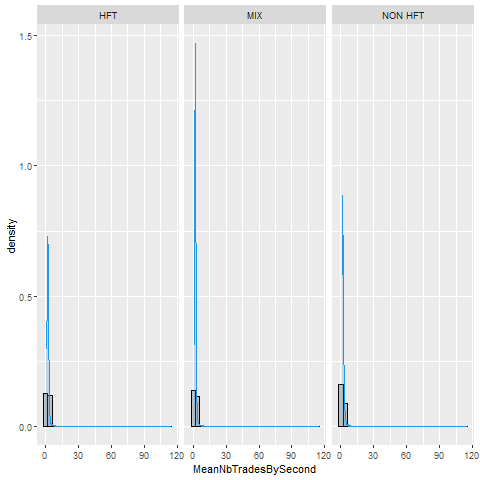

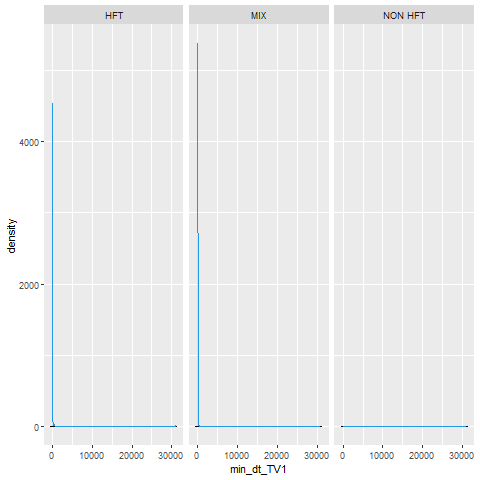

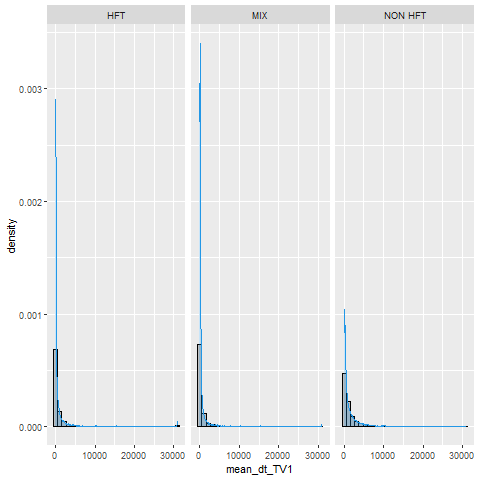

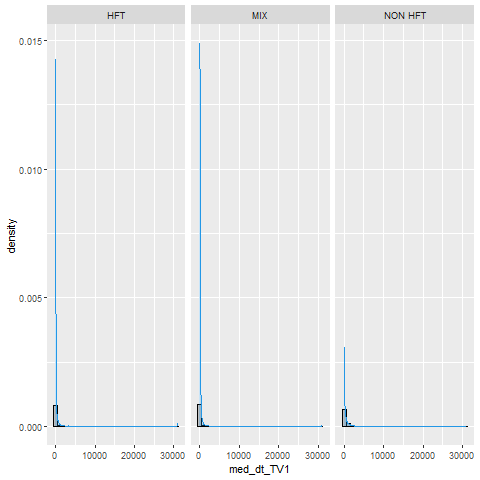

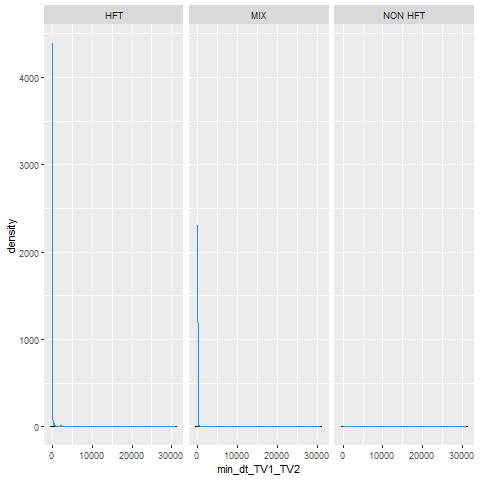

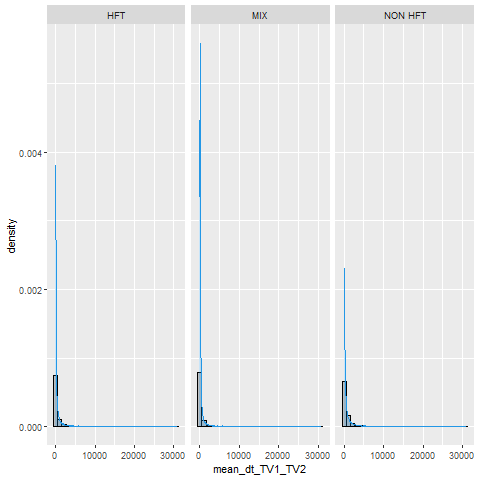

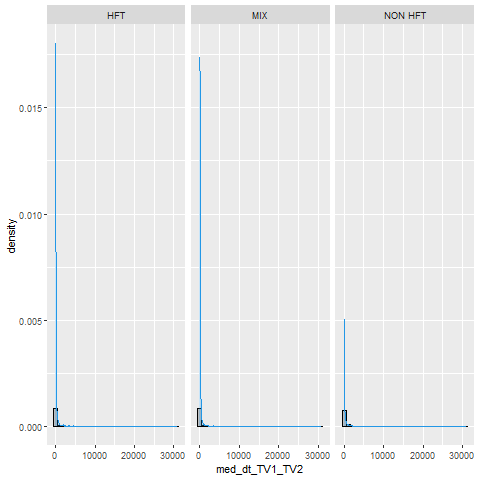

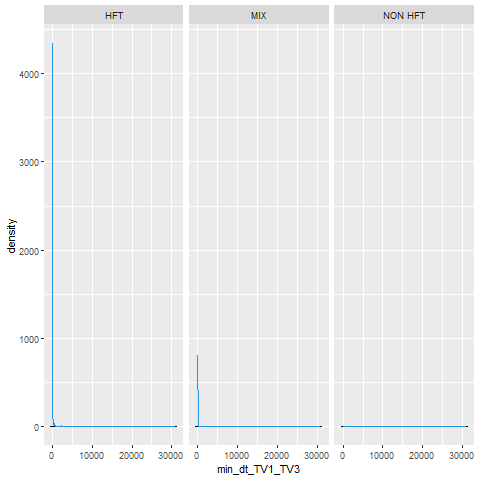

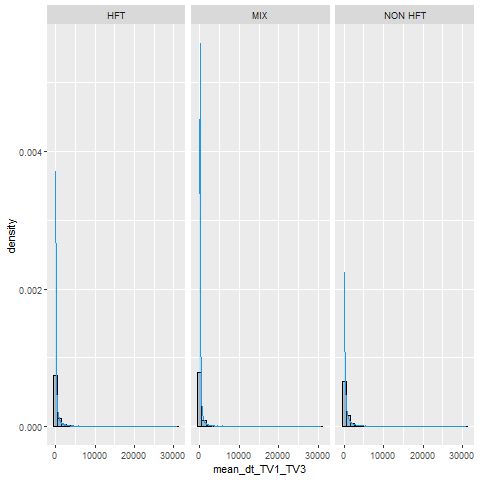

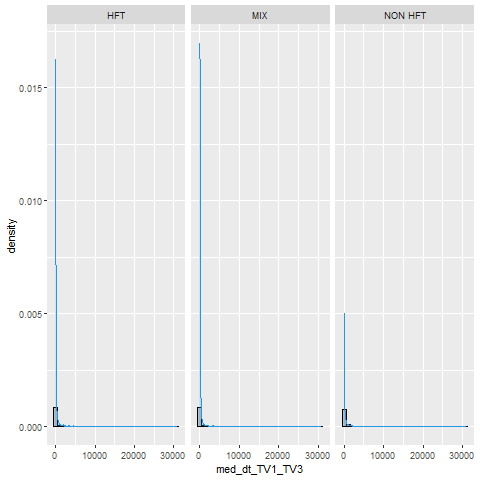

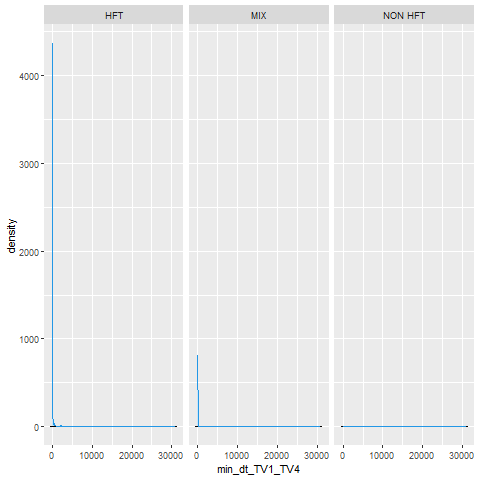

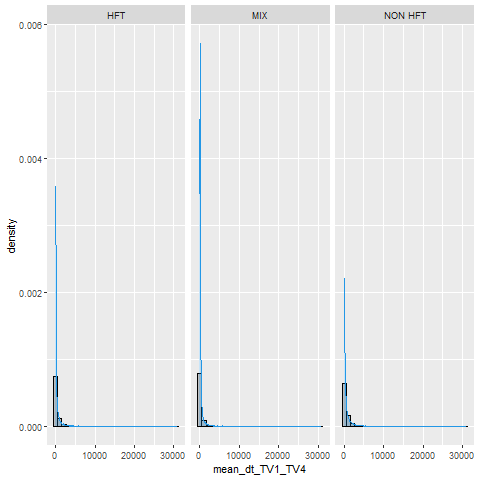

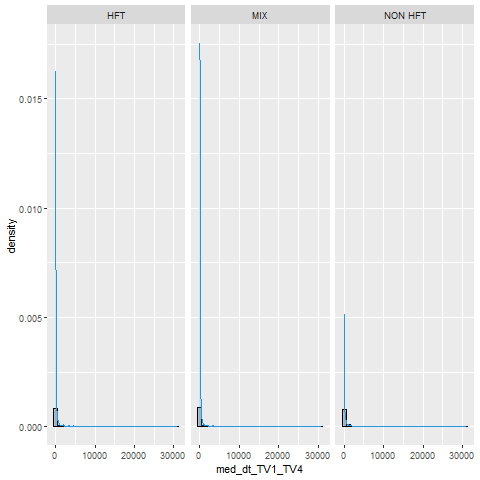

In [136]:
%%R
par(mfrow=c(2,2))
col=dim(df_num[,2:(dim(df_num)[2]-3)])[2]
complet_cases<- complete.cases(df_num_R)
for (i in 1:col){
    print(ggplot(df_num, aes(x=df_num[,i]))+
          geom_histogram(aes(y=..density..),
                        fill='gray', colour=1 ,bins=30)+
          geom_density( colour = 4,
               fill = 4, alpha = 0.25)+
          xlab(names(df_num)[i])+
          facet_wrap(~label_target))
    #plot(density(df_num_R[complet_cases,i]), main=names(df_num_R)[i], xlab=names(df_num_R)[i],col='blue', lwd=1)
}

In [ ]:
%%R -i df_num
pairs(df_num[,2:12])


# Data preparation

#### We transform the Day column to integer

In [23]:
import re
Day=[]
for day in df.Day:
    Day.append(re.sub('Date_','',day))

Days=[int(day) for day in Day]
df['jours']=Days
df_num['jours']=Days

In [24]:
target=[]
for label in df['type']:
    if label=='NON HFT':
        target.append(0)
    elif label=='MIX':
        target.append(1)
    else:
        target.append(2)
df['target']=target
df_num['target']=target

## Treatment of missing values


For our project we will use two methods to deal with the missing values problem. As said above, we will first do our analysis by removing all observations for which there is at least one missing value for a given variable. 
Then we will use the imputation method to replace the missing values and we will compare the predictive power of the two methods

#### We apply the MCAR method (delete all rows containing missing values)


We know that with this method we will lose information but if the underlying assumption is true then we have nothing to fear for our prediction model otherwise we would have goods so lost valuable information for nothing

In [30]:
# we drop all rows with na
data_MCAR=df.dropna()
print(f'the new rows after dropna is {data_MCAR.shape[0]}')
print(f'\nWe will lost {(1-data_MCAR.shape[0]/df.shape[0])*100} % of original data set')

the new rows after dropna is 78929

We will lost 58.69451451179051 % of original data set


#### As the database has a large dimension, we do a parallel calculation to reduce the execution time before applying the KNN imputation method

In [31]:
x_train_num=x_train.select_dtypes(include=['int64', 'float64'])
names_features=x_train_num.columns
x_test_num=x_test.select_dtypes(include=['int64', 'float64'])

In [12]:
len(x_test_num.columns)

36

In [421]:
imputerKnn =KNNImputer(n_neighbors=3)
dfT_KNN=imputerKnn.fit_transform(x_train_num)

In [422]:
dfTest_KNN=imputerKnn.fit_transform(x_test_num)

In [420]:
len(df_num.columns)

39

In [426]:
X_train_KNNImputer=pd.DataFrame(dfT_KNN, columns=names_features)
X_test_KNNImputer=pd.DataFrame(dfTest_KNN, columns=x_test_num.columns)

OTR        OCR         OMR  min_time_two_events  mean_time_two_events  \
0  2.272727   8.333333   12.500000                  0.0           5117.830300   
1  1.696629  25.166667   21.571429                  0.0           1846.968401   
2  1.482759  47.300000  118.250000                  0.0            686.300630   
3  1.705882  14.500000   29.000000                  0.0           2174.335265   
4  1.517730  26.750000    8.557296                  0.0            944.008551   

   10_p_time_two_events  med_time_two_events  25_p_time_two_events  \
0              0.000000           419.688500             10.722543   
1              0.000074             0.003374              0.000204   
2              0.000071             0.000599              0.000129   
3              0.000000             6.152666              0.000945   
4              0.000071             0.001364              0.000146   

   75_p_time_two_events  90_p_time_two_events  max_time_two_events  \
0            984.320560           23151.83800            25139.598   
1              8.768699            2671.48830            31278.357   
2              5.725427             448.88360            30799.467   
3             62.444176           19187.71900            19187.719   
4              2.225420             273.45676            23164.514   

   min_lifetime_cancel  mean_lifetime_cancel  10_p_lifetime_cancel  \
0           682.153260           8272.770569            682.153260   
1            11.866026           3796.632686             11.866026   
2             2.761036           1397.103679              2.761036   
3           286.019320           9736.869034            286.019320   
4             2.798452          10066.803992              2.798452   

   med_lifetime_cancel  25_p_lifetime_cancel  75_p_lifetime_cancel  \
0            984.32056             682.15326           23151.83800   
1            177.93991              73.74323             808.26230   
2            187.99548              19.77734             418.23984   
3            286.01932             286.01932           19187.71900   
4           1345.95280             662.57434           21903.78300   

   90_p_lifetime_cancel  max_lifetime_cancel  NbTradeVenueMic  \
0            23151.8380            23151.838              1.0   
1            21433.6840            21433.684              1.0   
2             1953.6235            10842.464              1.0   
3            19187.7190            19187.719              1.0   
4            23164.5140            23164.514              1.0   

   MaxNbTradesBySecond  MeanNbTradesBySecond  min_dt_TV1  mean_dt_TV1  \
0                  7.0              2.750000  351.702399  9639.216031   
1                 17.0              5.933333    0.000066   493.559196   
2                 20.0              5.063492    0.000018   163.954785   
3                  8.0              4.250000    0.000148  1232.562133   
4                 19.0              3.710526    0.000025   248.073927   

    med_dt_TV1  min_dt_TV1_TV2  mean_dt_TV1_TV2  med_dt_TV1_TV2  \
0  1585.079495     3349.589048      3690.313181     3349.589048   
1     0.000901        0.000003        78.258116       23.348987   
2     0.000770        0.001338       221.480994      126.743763   
3     0.004301       54.247654       523.093820      115.462107   
4     0.001364      268.711524       888.129229      549.976769   

   min_dt_TV1_TV3  mean_dt_TV1_TV3  med_dt_TV1_TV3  min_dt_TV1_TV4  \
0     3349.589048      3690.313181     3349.589048     3349.589048   
1        0.000007        78.789365       29.980759        0.000061   
2        0.001334       221.444885      129.208429        0.001339   
3       54.247653       619.296612      115.462107       54.247817   
4      268.711524       631.168151      549.976769      268.711524   

   mean_dt_TV1_TV4  med_dt_TV1_TV4  NbSecondWithAtLeatOneTrade  
0      3690.313181     3349.589048                         4.0  
1        83.198080       30.544318                   

In [431]:
del X_test_KNNImputer['Index']

In [440]:
X_test_KNNImputer['sample']=2
X_train_KNNImputer['sample']=1
data_KNN=pd.concat([X_train_KNNImputer,X_test_KNNImputer], ignore_index=True)
data_KNN['target']=target
data_KNN.head()

OTR        OCR         OMR  min_time_two_events  mean_time_two_events  \
0  2.272727   8.333333   12.500000                  0.0           5117.830300   
1  1.696629  25.166667   21.571429                  0.0           1846.968401   
2  1.482759  47.300000  118.250000                  0.0            686.300630   
3  1.705882  14.500000   29.000000                  0.0           2174.335265   
4  1.517730  26.750000    8.557296                  0.0            944.008551   

   10_p_time_two_events  med_time_two_events  25_p_time_two_events  \
0              0.000000           419.688500             10.722543   
1              0.000074             0.003374              0.000204   
2              0.000071             0.000599              0.000129   
3              0.000000             6.152666              0.000945   
4              0.000071             0.001364              0.000146   

   75_p_time_two_events  90_p_time_two_events  max_time_two_events  \
0            984.320560           23151.83800            25139.598   
1              8.768699            2671.48830            31278.357   
2              5.725427             448.88360            30799.467   
3             62.444176           19187.71900            19187.719   
4              2.225420             273.45676            23164.514   

   min_lifetime_cancel  mean_lifetime_cancel  10_p_lifetime_cancel  \
0           682.153260           8272.770569            682.153260   
1            11.866026           3796.632686             11.866026   
2             2.761036           1397.103679              2.761036   
3           286.019320           9736.869034            286.019320   
4             2.798452          10066.803992              2.798452   

   med_lifetime_cancel  25_p_lifetime_cancel  75_p_lifetime_cancel  \
0            984.32056             682.15326           23151.83800   
1            177.93991              73.74323             808.26230   
2            187.99548              19.77734             418.23984   
3            286.01932             286.01932           19187.71900   
4           1345.95280             662.57434           21903.78300   

   90_p_lifetime_cancel  max_lifetime_cancel  NbTradeVenueMic  \
0            23151.8380            23151.838              1.0   
1            21433.6840            21433.684              1.0   
2             1953.6235            10842.464              1.0   
3            19187.7190            19187.719              1.0   
4            23164.5140            23164.514              1.0   

   MaxNbTradesBySecond  MeanNbTradesBySecond  min_dt_TV1  mean_dt_TV1  \
0                  7.0              2.750000  351.702399  9639.216031   
1                 17.0              5.933333    0.000066   493.559196   
2                 20.0              5.063492    0.000018   163.954785   
3                  8.0              4.250000    0.000148  1232.562133   
4                 19.0              3.710526    0.000025   248.073927   

    med_dt_TV1  min_dt_TV1_TV2  mean_dt_TV1_TV2  med_dt_TV1_TV2  \
0  1585.079495     3349.589048      3690.313181     3349.589048   
1     0.000901        0.000003        78.258116       23.348987   
2     0.000770        0.001338       221.480994      126.743763   
3     0.004301       54.247654       523.093820      115.462107   
4     0.001364      268.711524       888.129229      549.976769   

   min_dt_TV1_TV3  mean_dt_TV1_TV3  med_dt_TV1_TV3  min_dt_TV1_TV4  \
0     3349.589048      3690.313181     3349.589048     3349.589048   
1        0.000007        78.789365       29.980759        0.000061   
2        0.001334       221.444885      129.208429        0.001339   
3       54.247653       619.296612      115.462107       54.247817   
4      268.711524       631.168151      549.976769      268.711524   

   mean_dt_TV1_TV4  med_dt_TV1_TV4  NbSecondWithAtLeatOneTrade  sample  target  
0      3690.313181     3349.589048                         4.0       1       0  
1        83.198080   

In [441]:
data_KNN.to_csv('data_KNNimputer.csv',index=False)

## Analysis with data processed with the MCAR method

We recover the columns of type numeric

In [32]:
data_MCAR_num = data_MCAR.select_dtypes(include = ['float64', 'int64'])
del data_MCAR_num['Index']
data_MCAR_num.head()

OTR        OCR    OMR  min_time_two_events  mean_time_two_events  \
647   3.540541   7.705882  131.0                  0.0           6153.317527   
1056  1.877676  32.315789  307.0                  0.0           2505.958654   
6677  3.555556   8.000000   32.0                  0.0           2883.672043   
6680  2.337255  14.190476  119.2                  0.0           3473.998966   
6681  5.991525   3.199095  707.0                  0.0            558.198772   

      10_p_time_two_events  med_time_two_events  25_p_time_two_events  \
647                    0.0           296.829000              0.000000   
1056                   0.0             0.001554              0.000000   
6677                   0.0             0.000000              0.000000   
6680                   0.0             3.175961              0.000000   
6681                   0.0            18.132948              1.381444   

      75_p_time_two_events  90_p_time_two_events  ...  med_dt_TV1_TV2  \
647             7065.32000           23411.25000  ...      178.349637   
1056             306.34317            7154.90970  ...       56.584152   
6677             128.98378             493.26193  ...        0.001000   
6680              76.21925           10022.05900  ...       97.796000   
6681             116.51631             216.90742  ...       12.580000   

      min_dt_TV1_TV3  mean_dt_TV1_TV3  med_dt_TV1_TV3  min_dt_TV1_TV4  \
647         3.435721       333.580958      178.349637        3.435721   
1056        0.000200       114.832536       56.584152        0.000200   
6677        0.001000      2513.524333        0.001000        0.001000   
6680        0.001000       273.843487       79.829000        0.001000   
6681        0.001000       379.342816        6.887000        0.001000   

      mean_dt_TV1_TV4  med_dt_TV1_TV4  NbSecondWithAtLeatOneTrade  jours  \
647        333.580958      178.349637                          69     13   
1056       114.832536       56.584152                         297      7   
6677      2101.774000        0.001000                           8      8   
6680       296.543789       79.829000                         172      5   
6681       289.481278       10.607000                         122     10   

      target  
647        0  
1056       0  
6677       1  
6680       1  
6681       1  

[5 rows x 37 columns]

In [33]:
#
df_features=data_MCAR_num.drop(columns='target')
columns_num=df_features.columns.tolist()
print(f'After drop a missing values\nthe number of rows is {df_features.shape[0]} \nand the number of columns is {df_features.shape[1]}')

After drop a missing values
the number of rows is 78929 
and the number of columns is 36


There are no more missing values in the database

In [40]:
df_features.isnull().sum()

Index                         0
OTR                           0
OCR                           0
OMR                           0
min_time_two_events           0
mean_time_two_events          0
10_p_time_two_events          0
med_time_two_events           0
25_p_time_two_events          0
75_p_time_two_events          0
90_p_time_two_events          0
max_time_two_events           0
min_lifetime_cancel           0
mean_lifetime_cancel          0
10_p_lifetime_cancel          0
med_lifetime_cancel           0
25_p_lifetime_cancel          0
75_p_lifetime_cancel          0
90_p_lifetime_cancel          0
max_lifetime_cancel           0
NbTradeVenueMic               0
MaxNbTradesBySecond           0
MeanNbTradesBySecond          0
min_dt_TV1                    0
mean_dt_TV1                   0
med_dt_TV1                    0
min_dt_TV1_TV2                0
mean_dt_TV1_TV2               0
med_dt_TV1_TV2                0
min_dt_TV1_TV3                0
mean_dt_TV1_TV3               0
med_dt_T

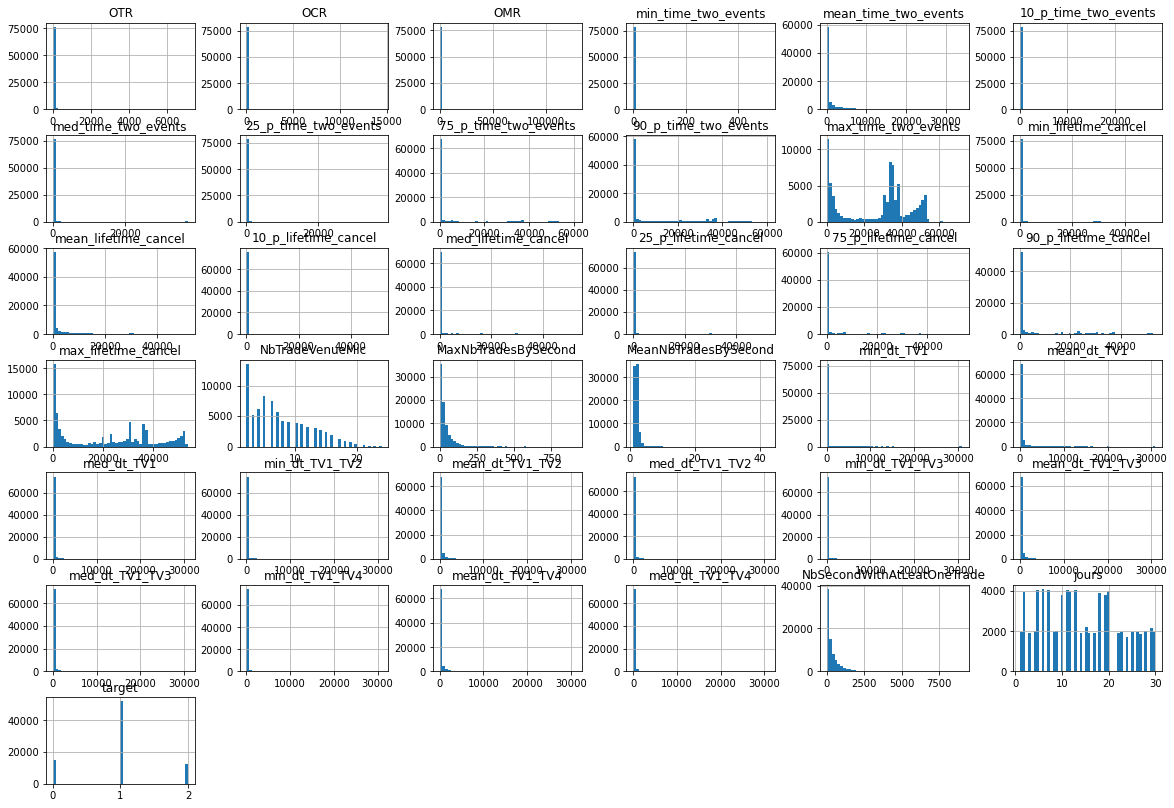

In [87]:
data_MCAR_num.hist(bins=50,figsize=(20,14))
plt.show()

The distribution of the predictive variables shows us that none of them resembles a Gaussian, and that our database contains outliers.

On the other hand, the variables OTR, OCR, OMR, Min_time_two_events, have more values close to 0 and a more assymetric concentration towards 0.

With the boxplot we will visualize a little more the outliers 

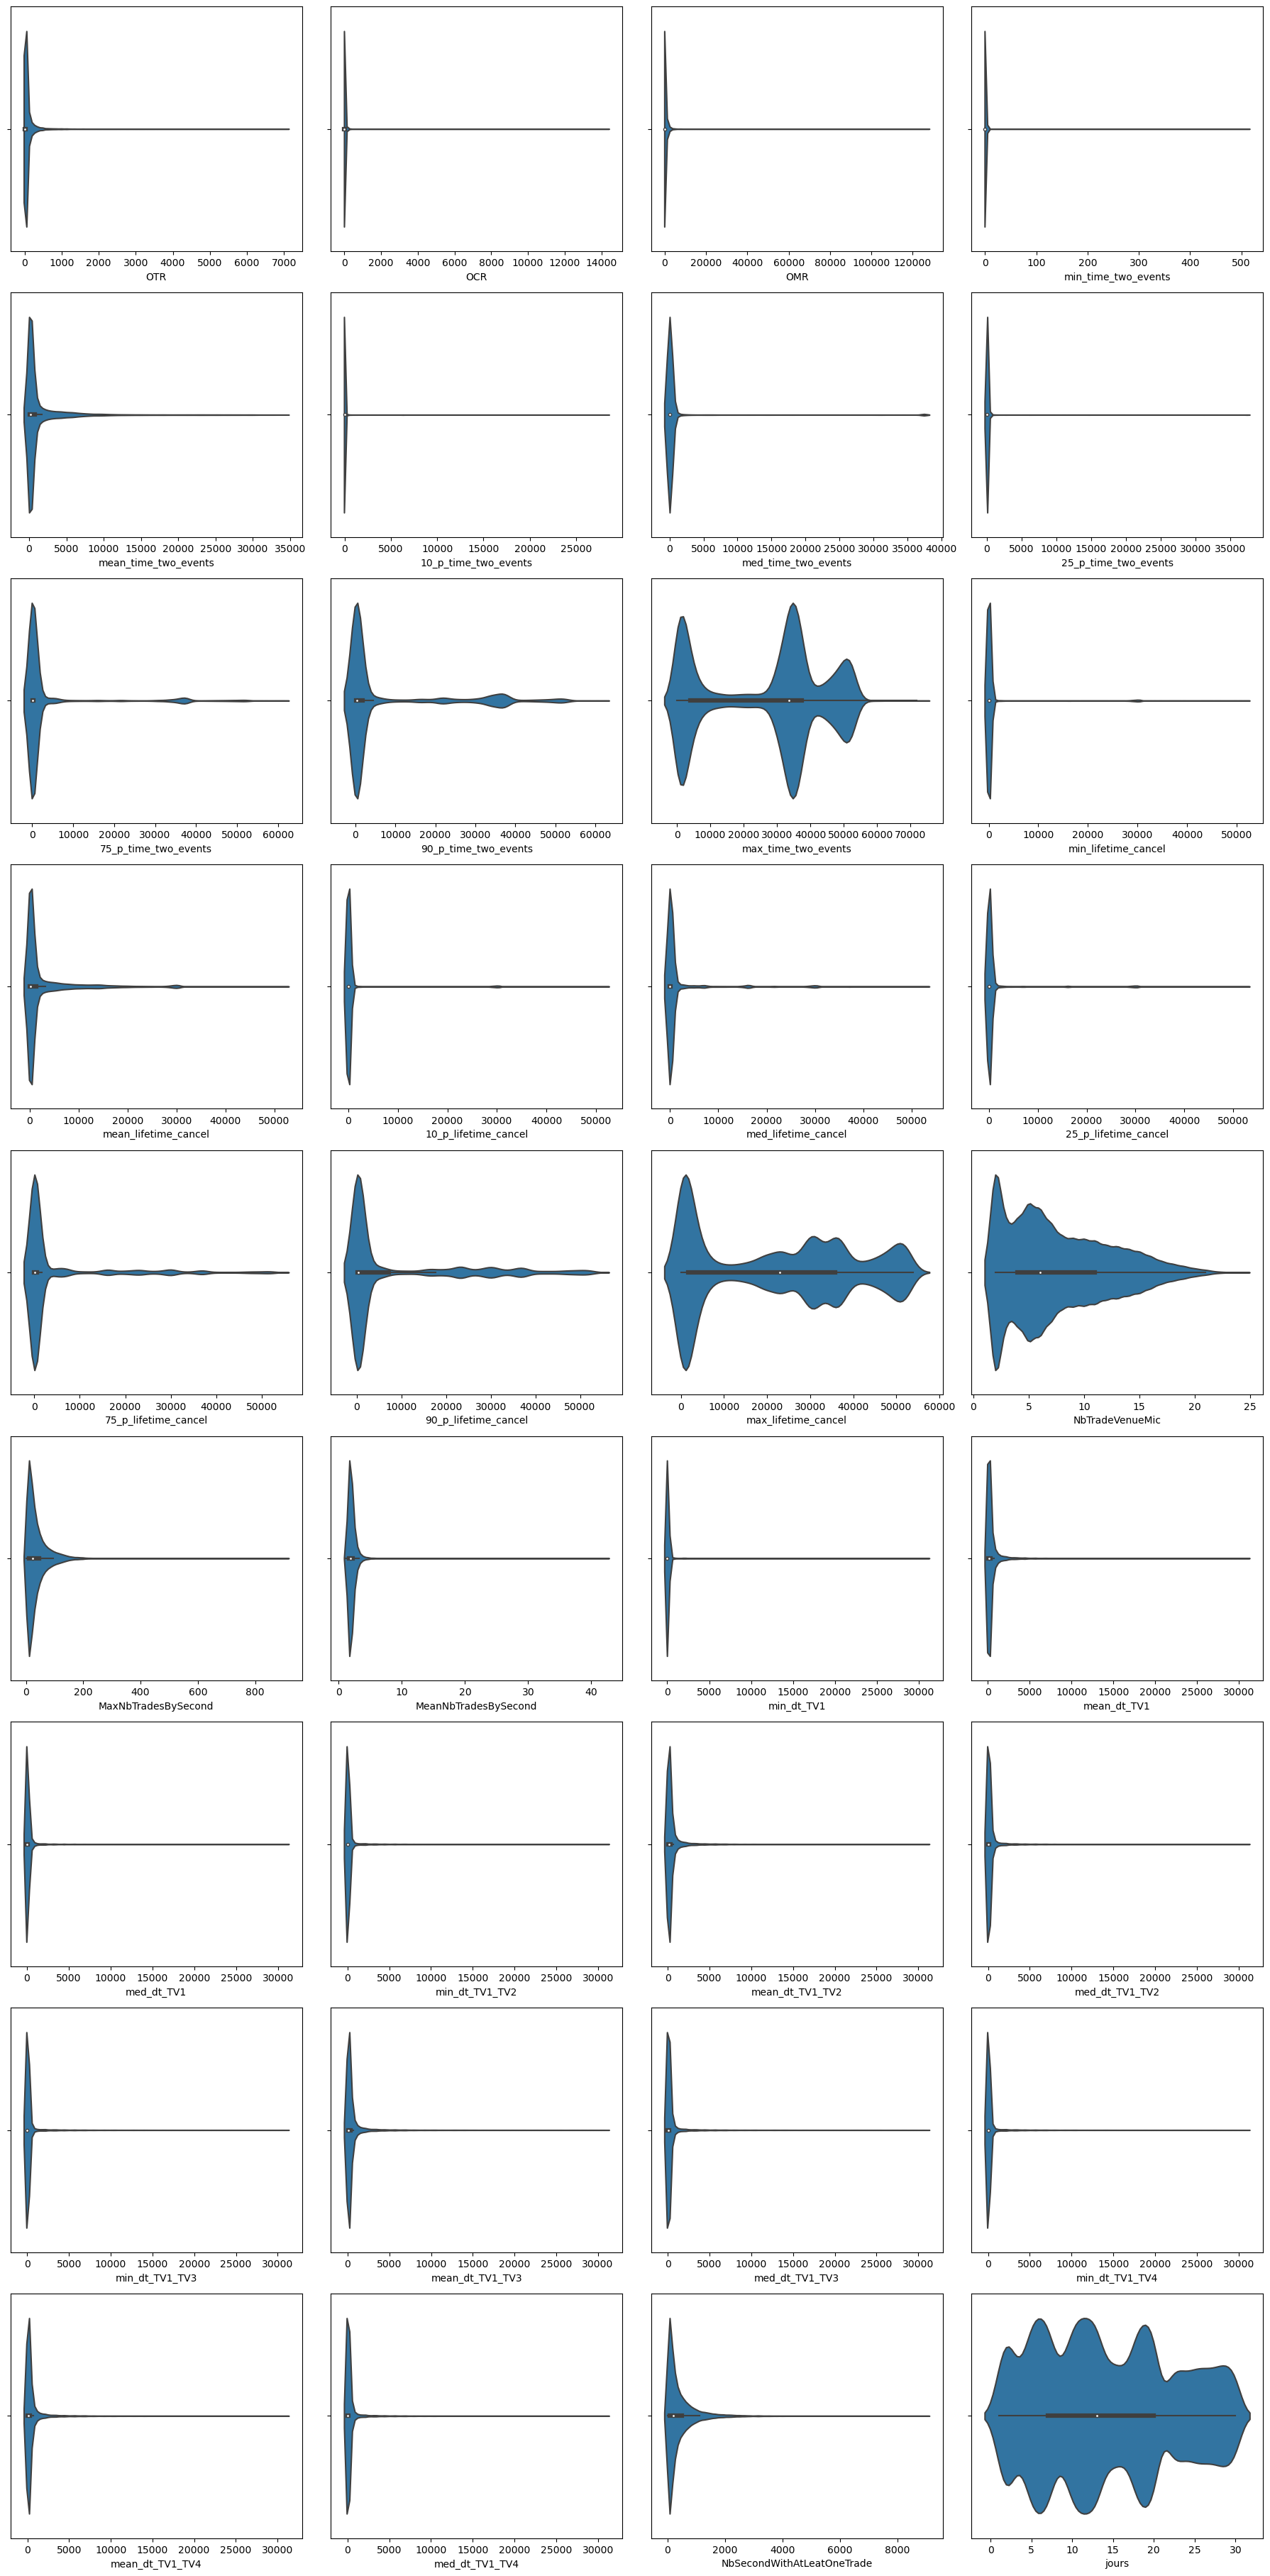

In [42]:
plt.figure(figsize=(18,40))
for i,var in enumerate(df_features.drop('Index',axis=1).columns,1):
    plt.subplot(10,4,i)
    sns.violinplot(x=var, data=data_MCAR_num)
plt.tight_layout()
plt.show()

We see a kind of disparity between the distribution of the variables. Indeed, except for the variables Days, max_lifetime_cancel, NBTradeVenueMic, all the other variables have a large number of missing values.


Let's take a closer look at this by calculating the shape and kurtosis indicators

In [88]:
#skewness
pd.DataFrame(data=[df_features.skew(),df_features.kurtosis()], index=['skewness','kurtosis'])

OTR           OCR          OMR  min_time_two_events  \
skewness   17.120363    198.261369    59.089712            85.411210   
kurtosis  542.718164  49161.303212  7422.731350          8626.475723   

          mean_time_two_events  10_p_time_two_events  med_time_two_events  \
skewness              4.797904             56.278526             9.470038   
kurtosis             28.475057           3899.673584            90.430478   

          25_p_time_two_events  75_p_time_two_events  90_p_time_two_events  \
skewness             19.614357              3.421397              1.899584   
kurtosis            414.802693             10.625981              2.179168   

          max_time_two_events  min_lifetime_cancel  mean_lifetime_cancel  \
skewness            -0.309321             7.013668              3.178602   
kurtosis            -1.338241            49.059678             10.759706   

          10_p_lifetime_cancel  med_lifetime_cancel  25_p_lifetime_cancel  \
skewness              6.845467             4.382257              6.051514   
kurtosis             46.948359            19.910354             37.475368   

          75_p_lifetime_cancel  90_p_lifetime_cancel  max_lifetime_cancel  \
skewness              2.556595              1.716563             0.208616   
kurtosis              5.834559              1.699488            -1.399663   

          NbTradeVenueMic  MaxNbTradesBySecond  MeanNbTradesBySecond  \
skewness         0.733995             3.758186              6.404196   
kurtosis        -0.318735            30.520063            198.007872   

          min_dt_TV1  mean_dt_TV1  med_dt_TV1  min_dt_TV1_TV2  \
skewness    12.12221     9.490681   11.404663        9.510888   
kurtosis   171.12964   114.534364  155.656438      106.438951   

          mean_dt_TV1_TV2  med_dt_TV1_TV2  min_dt_TV1_TV3  mean_dt_TV1_TV3  \
skewness         8.228110        9.333494        9.347986         8.281888   
kurtosis        83.956924      103.688020      102.531681        84.524763   

          med_dt_TV1_TV3  min_dt_TV1_TV4  mean_dt_TV1_TV4  med_dt_TV1_TV4  \
skewness        9.199400        9.411757         8.195333        9.232678   
kurtosis      100.318082      104.006057        83.063200      101.235722   

          NbSecondWithAtLeatOneTrade     jours  
skewness                    3.211450  0.268075  
kurtosis                   15.928848 -1.007876

As our intuition told us, these two statistics show us a big difference between the skewness and the kurtosis of almost the whole set of variables. Indeed, for the variable OTR the skewness is 17 and 542.7, for the OCR and OMR we have respectively 198.2 and 49161, 59 and 7422.7. We can also notice that the difference between the skewness and the kurtosis of variable NbSecondWithAtLeatOneTrade and Days is very small which means that they contain few outliers.

Furthermore, as we can see on the histograms, these statistics show us that the distribution of our variables is a Gaussian distribution.

#### Let's solve the problem of outliers, otherwise we will reduce the performance of our models.

In [34]:
def outliers(df,var):
    Q1=df[var].quantile(0.25)
    Q3=df[var].quantile(0.75)
    IQR=Q3-Q1
    
    lower_bound=(Q1 - 1.5*IQR)
    upper_bound=(Q3 + 1.5*IQR)
    
    ls=df.index[(df[var]<lower_bound) | (df[var]>upper_bound)]
    
    return ls
    

In [35]:
# other way to remove outliers

def outliers2(df,var):
    Q1=df[var].quantile(0.01)
    Q99=df[var].quantile(0.99)
    
    ls=df.index[(df[var]<Q1) | (df[var]>Q99)]
    
    return ls

In [36]:
# we take the name of the columns
columns_num=df_features.columns.tolist()
columns_num[1:5]

['OCR', 'OMR', 'min_time_two_events', 'mean_time_two_events']

In [37]:
index_list=[]
for feature in columns_num:
    index_list.extend(outliers(df_features,feature))

In [41]:
# other way to remove outliers

index_list2=[]
for feature in columns_num:
    index_list2.extend(outliers2(df_features,feature))

In [29]:
len(set(index_list))

61617

In [38]:
# We create now de function for romove the outliers
def remove_outliers(df, ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [39]:
df_features_clean=remove_outliers(data_MCAR,index_list)
df_features_clean.shape
# on passe de 79000 à 13000 observations, c'est beaucoup trop comme perte

(17312, 43)

In [42]:
# we take the name of the columns
columns_num=data_KNN.columns.tolist()
index_list=[]
for feature in columns_num:
    index_list.extend(outliers(data_KNN,feature))
data_KNN_clean=remove_outliers(data_KNN,index_list)
data_KNN_clean.shape

In [45]:
df_features_clean2=remove_outliers(data_MCAR,index_list2)
df_features_clean.shape

(17312, 43)

In [43]:
df_features_clean_num=df_features_clean.select_dtypes(include = ['float64', 'int64'])
print(f'After remove outlier we have now \n{df_features_clean_num.shape[0]} rows and \n{df_features_clean_num.shape[1]} columns')


After remove outlier we have now 
17312 rows and 
38 columns


In [43]:
del df_features_clean_num['Index']
df_features_clean_num.describe()

OTR           OCR           OMR  min_time_two_events  \
count  17312.000000  17312.000000  17312.000000              17312.0   
mean      10.049650      5.284087     41.692306                  0.0   
std        8.069523      3.542809     50.427091                  0.0   
min        1.668376      2.111322      1.191138                  0.0   
25%        3.931365      3.086666      3.509211                  0.0   
50%        7.283440      3.968748     20.964260                  0.0   
75%       13.429603      5.950305     60.233333                  0.0   
max       40.107143     22.750000    212.142857                  0.0   

       mean_time_two_events  10_p_time_two_events  med_time_two_events  \
count          17312.000000          17312.000000         17312.000000   
mean             261.988568              0.308710            15.925171   
std              286.157572              0.474042            15.074819   
min                0.416591              0.000000             0.000000   
25%               79.396924              0.000006             3.736924   
50%              169.515345              0.000567            11.764950   
75%              325.745642              1.001559            23.980955   
max             1710.483905              2.480390            79.650740   

       25_p_time_two_events  75_p_time_two_events  90_p_time_two_events  \
count          17312.000000          17312.000000          17312.000000   
mean               1.728593             76.678859            249.669003   
std                2.094001             72.233678            278.310586   
min                0.000000              0.000000              0.044666   
25%                0.043069             24.303554             83.855405   
50%                0.902458             56.639830            199.183170   
75%                2.965023            104.473930            311.991650   
max                8.927737            598.829830           4295.706500   

       max_time_two_events  min_lifetime_cancel  mean_lifetime_cancel  \
count         17312.000000         17312.000000          17312.000000   
mean          27891.669388             0.151464            371.184569   
std           16518.741767             0.313420            494.114134   
min               0.900052             0.000010              0.505573   
25%           10826.482000             0.000806             66.168421   
50%           33598.768000             0.005498            179.065041   
75%           36490.944000             0.063451            448.092948   
max           71934.410000             1.288975           3228.690289   

       10_p_lifetime_cancel  med_lifetime_cancel  25_p_lifetime_cancel  \
count          17312.000000         17312.000000          17312.000000   
mean               1.290313            28.859770              5.959831   
std                1.481976            30.879733              6.665030   
min                0.000103             0.001164              0.000197   
25%                0.085081             7.622005              0.831426   
50%                1.077717            19.294626              4.065463   
75%                1.987022            38.998264              8.465099   
max                9.888135           220.769730             46.851990   

       75_p_lifetime_cancel  90_p_lifetime_cancel  max_lifetime_cancel  \
count          17312.000000          17312.000000         17312.000000   
mean             113.124553            573.851302         20277.074709   
std              153.781428           1304.641713         17672.078347   
min                0.008101              0.044147             1.249772   
25%               30.004379             81.550410          1372.848700   
50%               67.288355            186.197600         19769.129000   
75%              137.082887            381.482770         33506.567250   
max             1614.647100          17043.531000         53651.460000   

       NbTradeVenueMic  MaxNbTra

In [44]:
df_features_clean_num['min_time_two_events'].describe()

count    17312.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: min_time_two_events, dtype: float64

We can see that after deleting the outliers the min_time_two_events variable contains only 0's so we can delete it from our database

In [114]:
df_features_clean_num=df_features_clean_num.drop('min_time_two_events',axis=1)

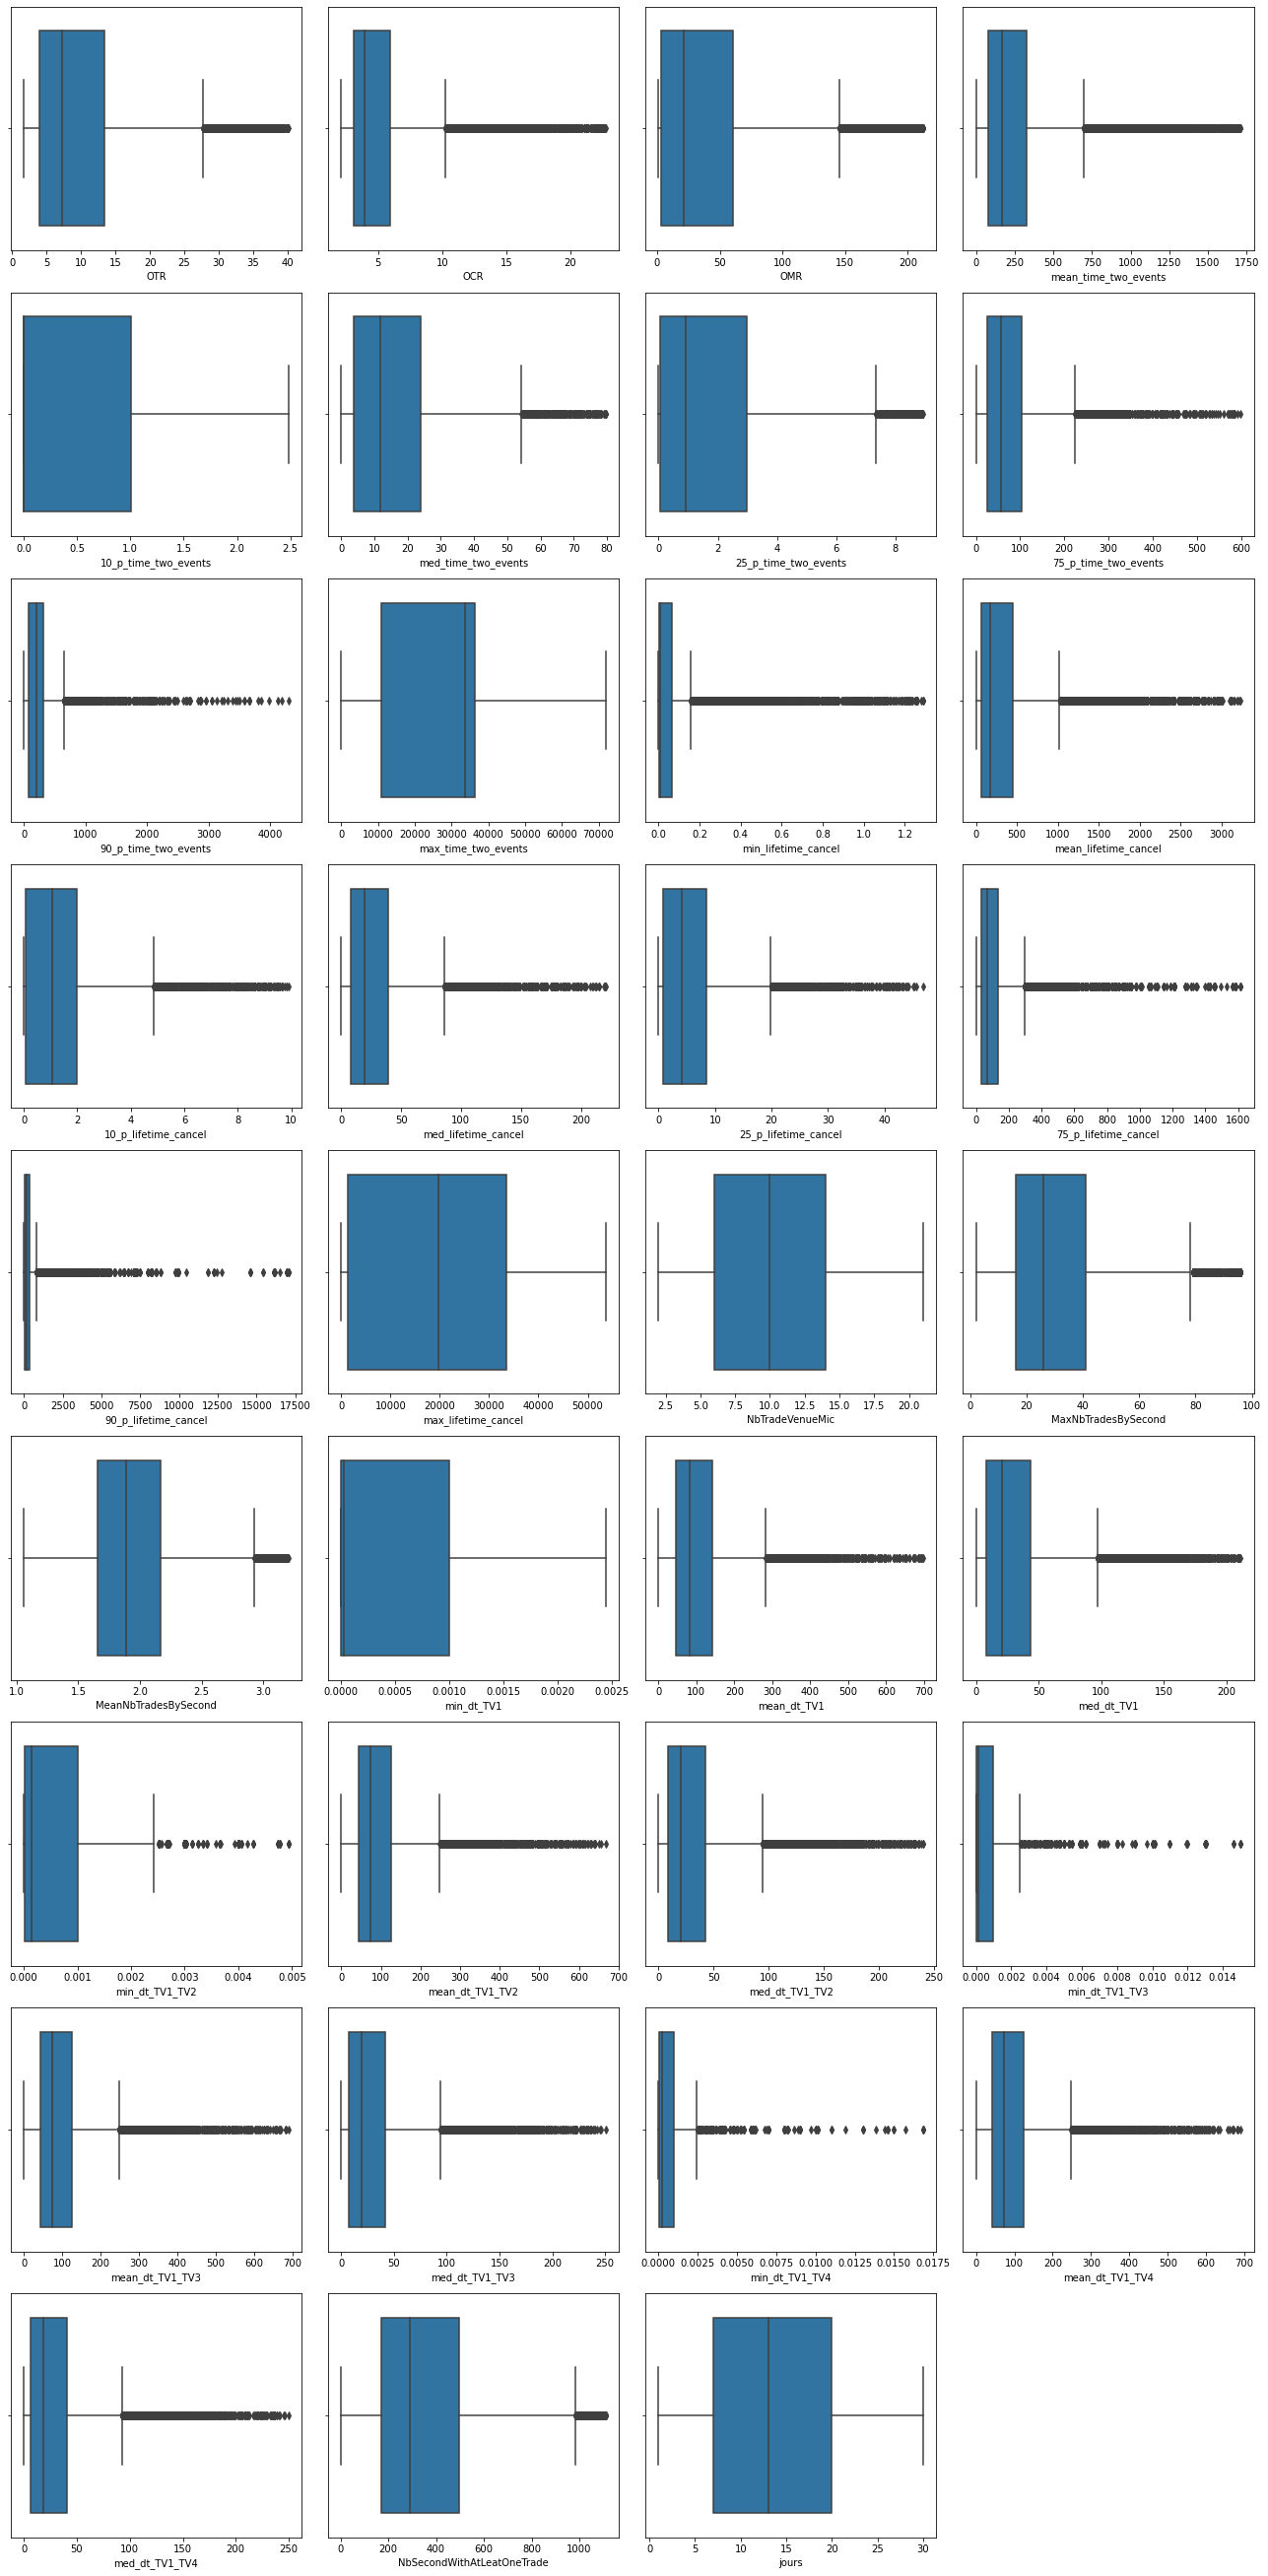

In [116]:
plt.figure(figsize=(18,40))

for i,var in enumerate(df_features_clean_num.drop(['target'],axis=1).columns,1):
    plt.subplot(10,4,i)
    sns.boxplot(x=var, data=df_features_clean_num)
plt.tight_layout()
plt.show()

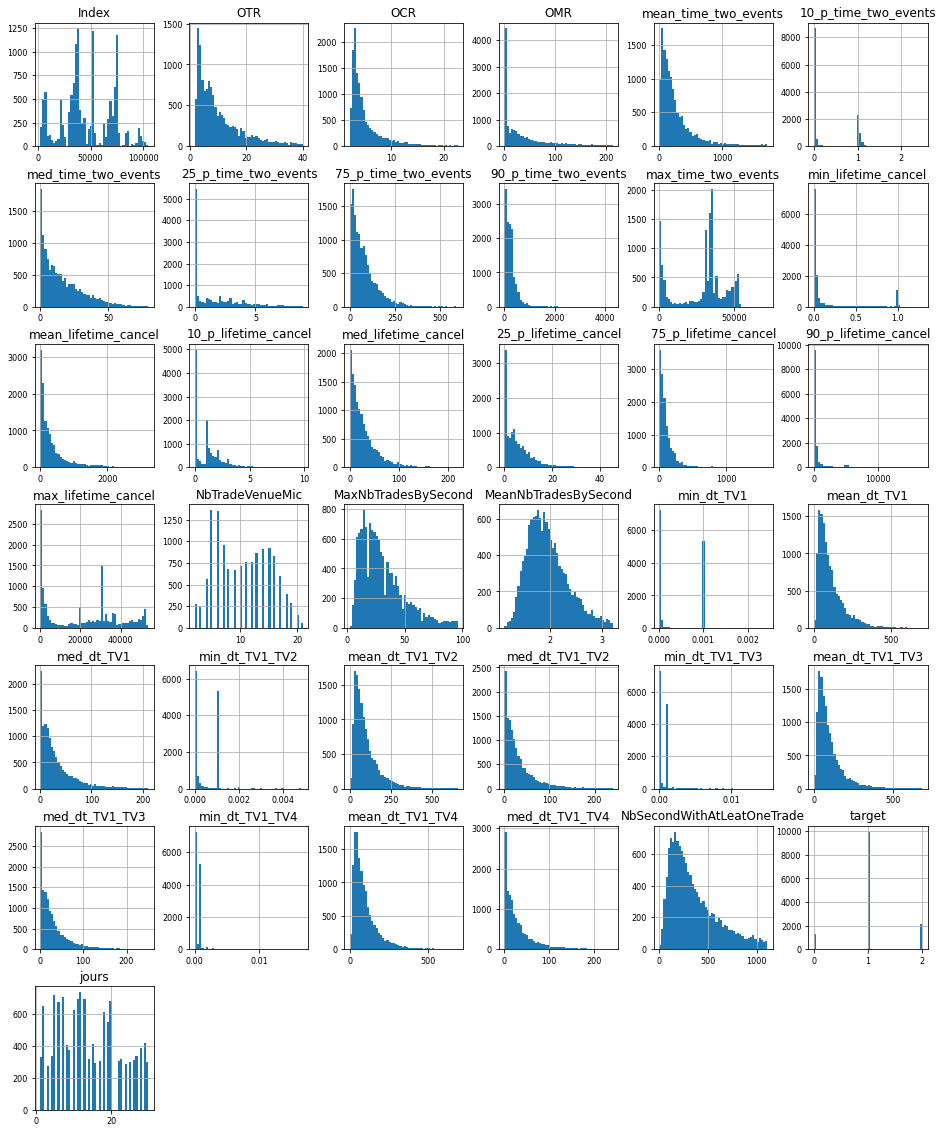

In [89]:
df_features_clean[columns_num].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

### After removing the outliers in our database, let's look at the distribution of our target variable

In [124]:
n=df_features_clean.shape[0]
tab_target=df_features_clean['type'].value_counts()
df_target=pd.DataFrame({'modality':tab_target.index, 'frequence':tab_target.values, 'prop in data (%)': (tab_target.values/n)*100})
print(df_target)

  modality  frequence  prop in data (%)
0      MIX      12324         71.187616
1      HFT       2701         15.601895
2  NON HFT       2287         13.210490


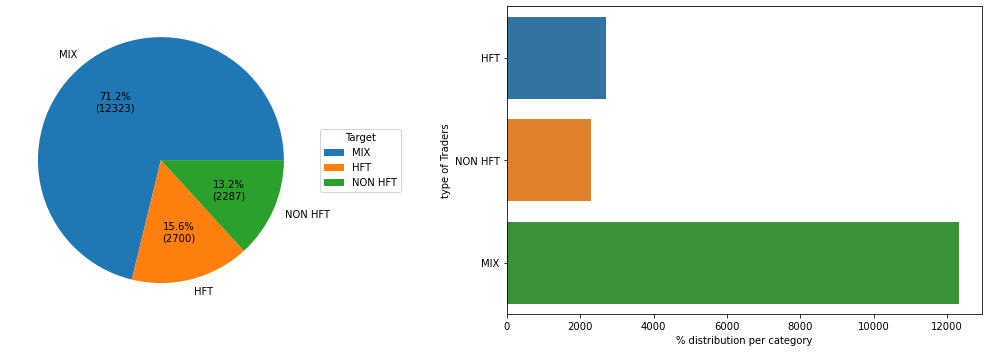

In [125]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)


fig = plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
plt.pie(df_target.frequence, labels = df_target.modality,
       autopct = lambda pct: func(pct, df_target.frequence))
plt.legend(df_target.modality,
          title ="Target",
          loc ="center left",
          bbox_to_anchor =(1, 0,0, 1))
plt.subplot(1,2,2)
sns.countplot(data=df_features_clean, y='type')
plt.ylabel('type of Traders')
plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

After removing the outliers we have 71.2% of MIX type participants, 15.6% of HTF type participants and 13.2% of non-HTF type participants.

In a prediction model where the target variable has modalities of different proportions as in our case, the HFT(15%) and Non HFT (13%) classes are very male represented, would lead to a very poor model. That is why in will use a resampling method to balance our database.

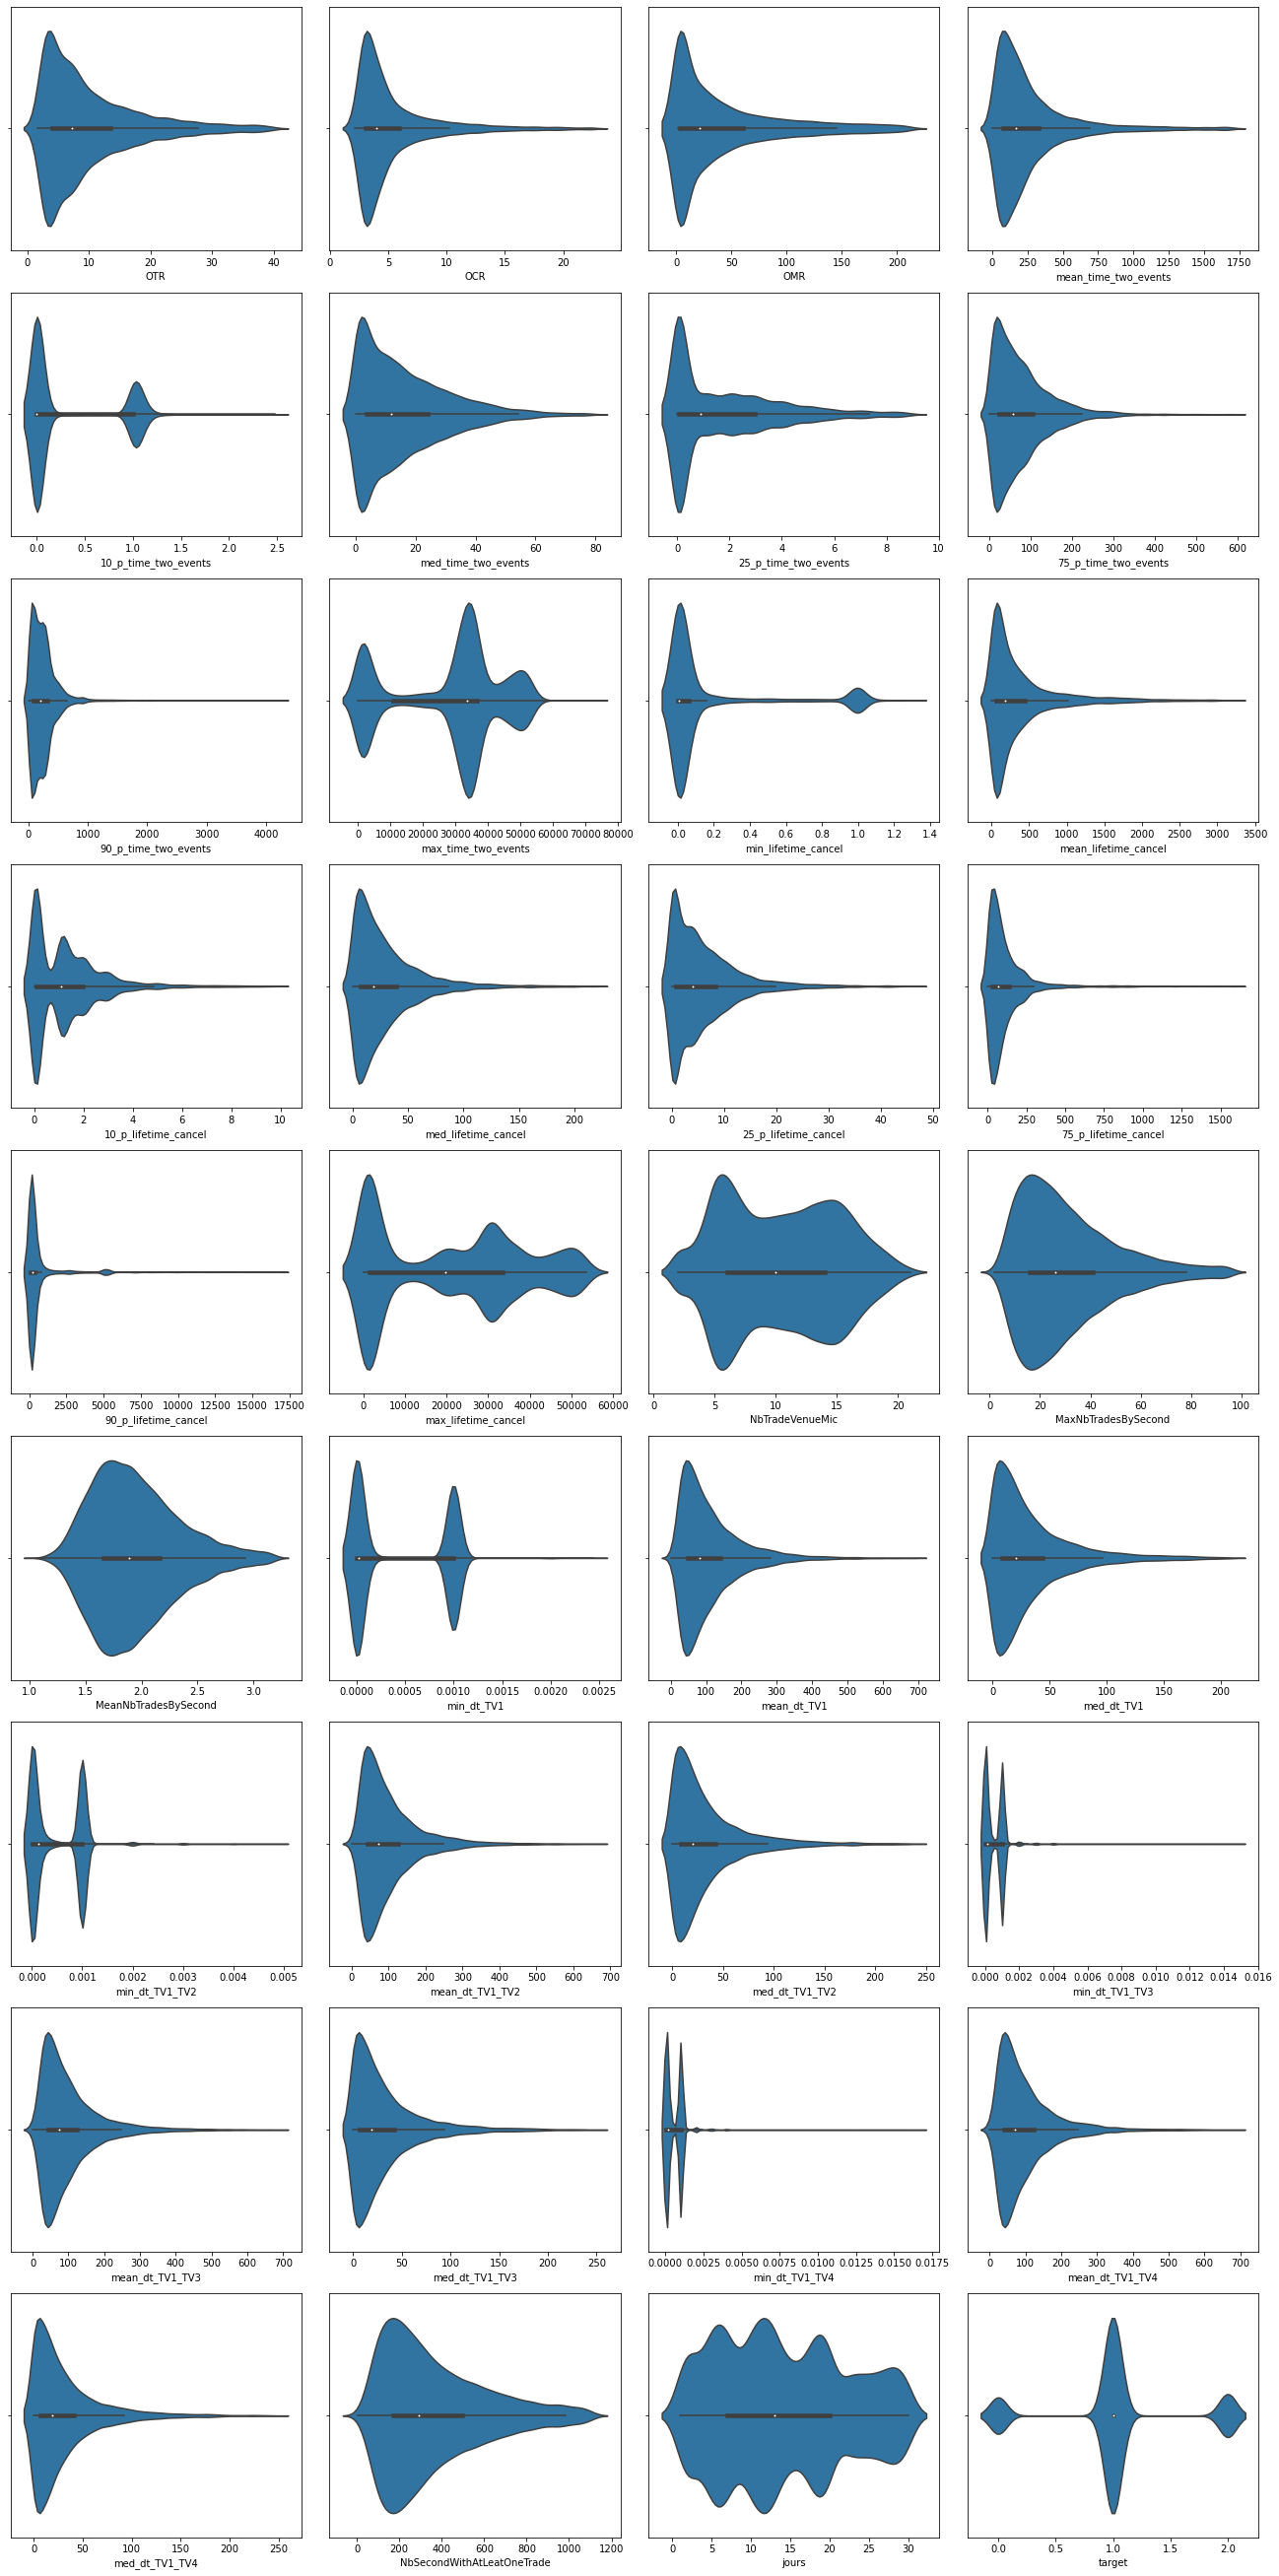

In [129]:
plt.figure(figsize=(18,40))
for i,var in enumerate(df_features_clean_num.columns,1):
    plt.subplot(10,4,i)
    sns.violinplot(x=var, data=df_features_clean)
plt.tight_layout()
plt.show()

#### distribution of each numeric variable

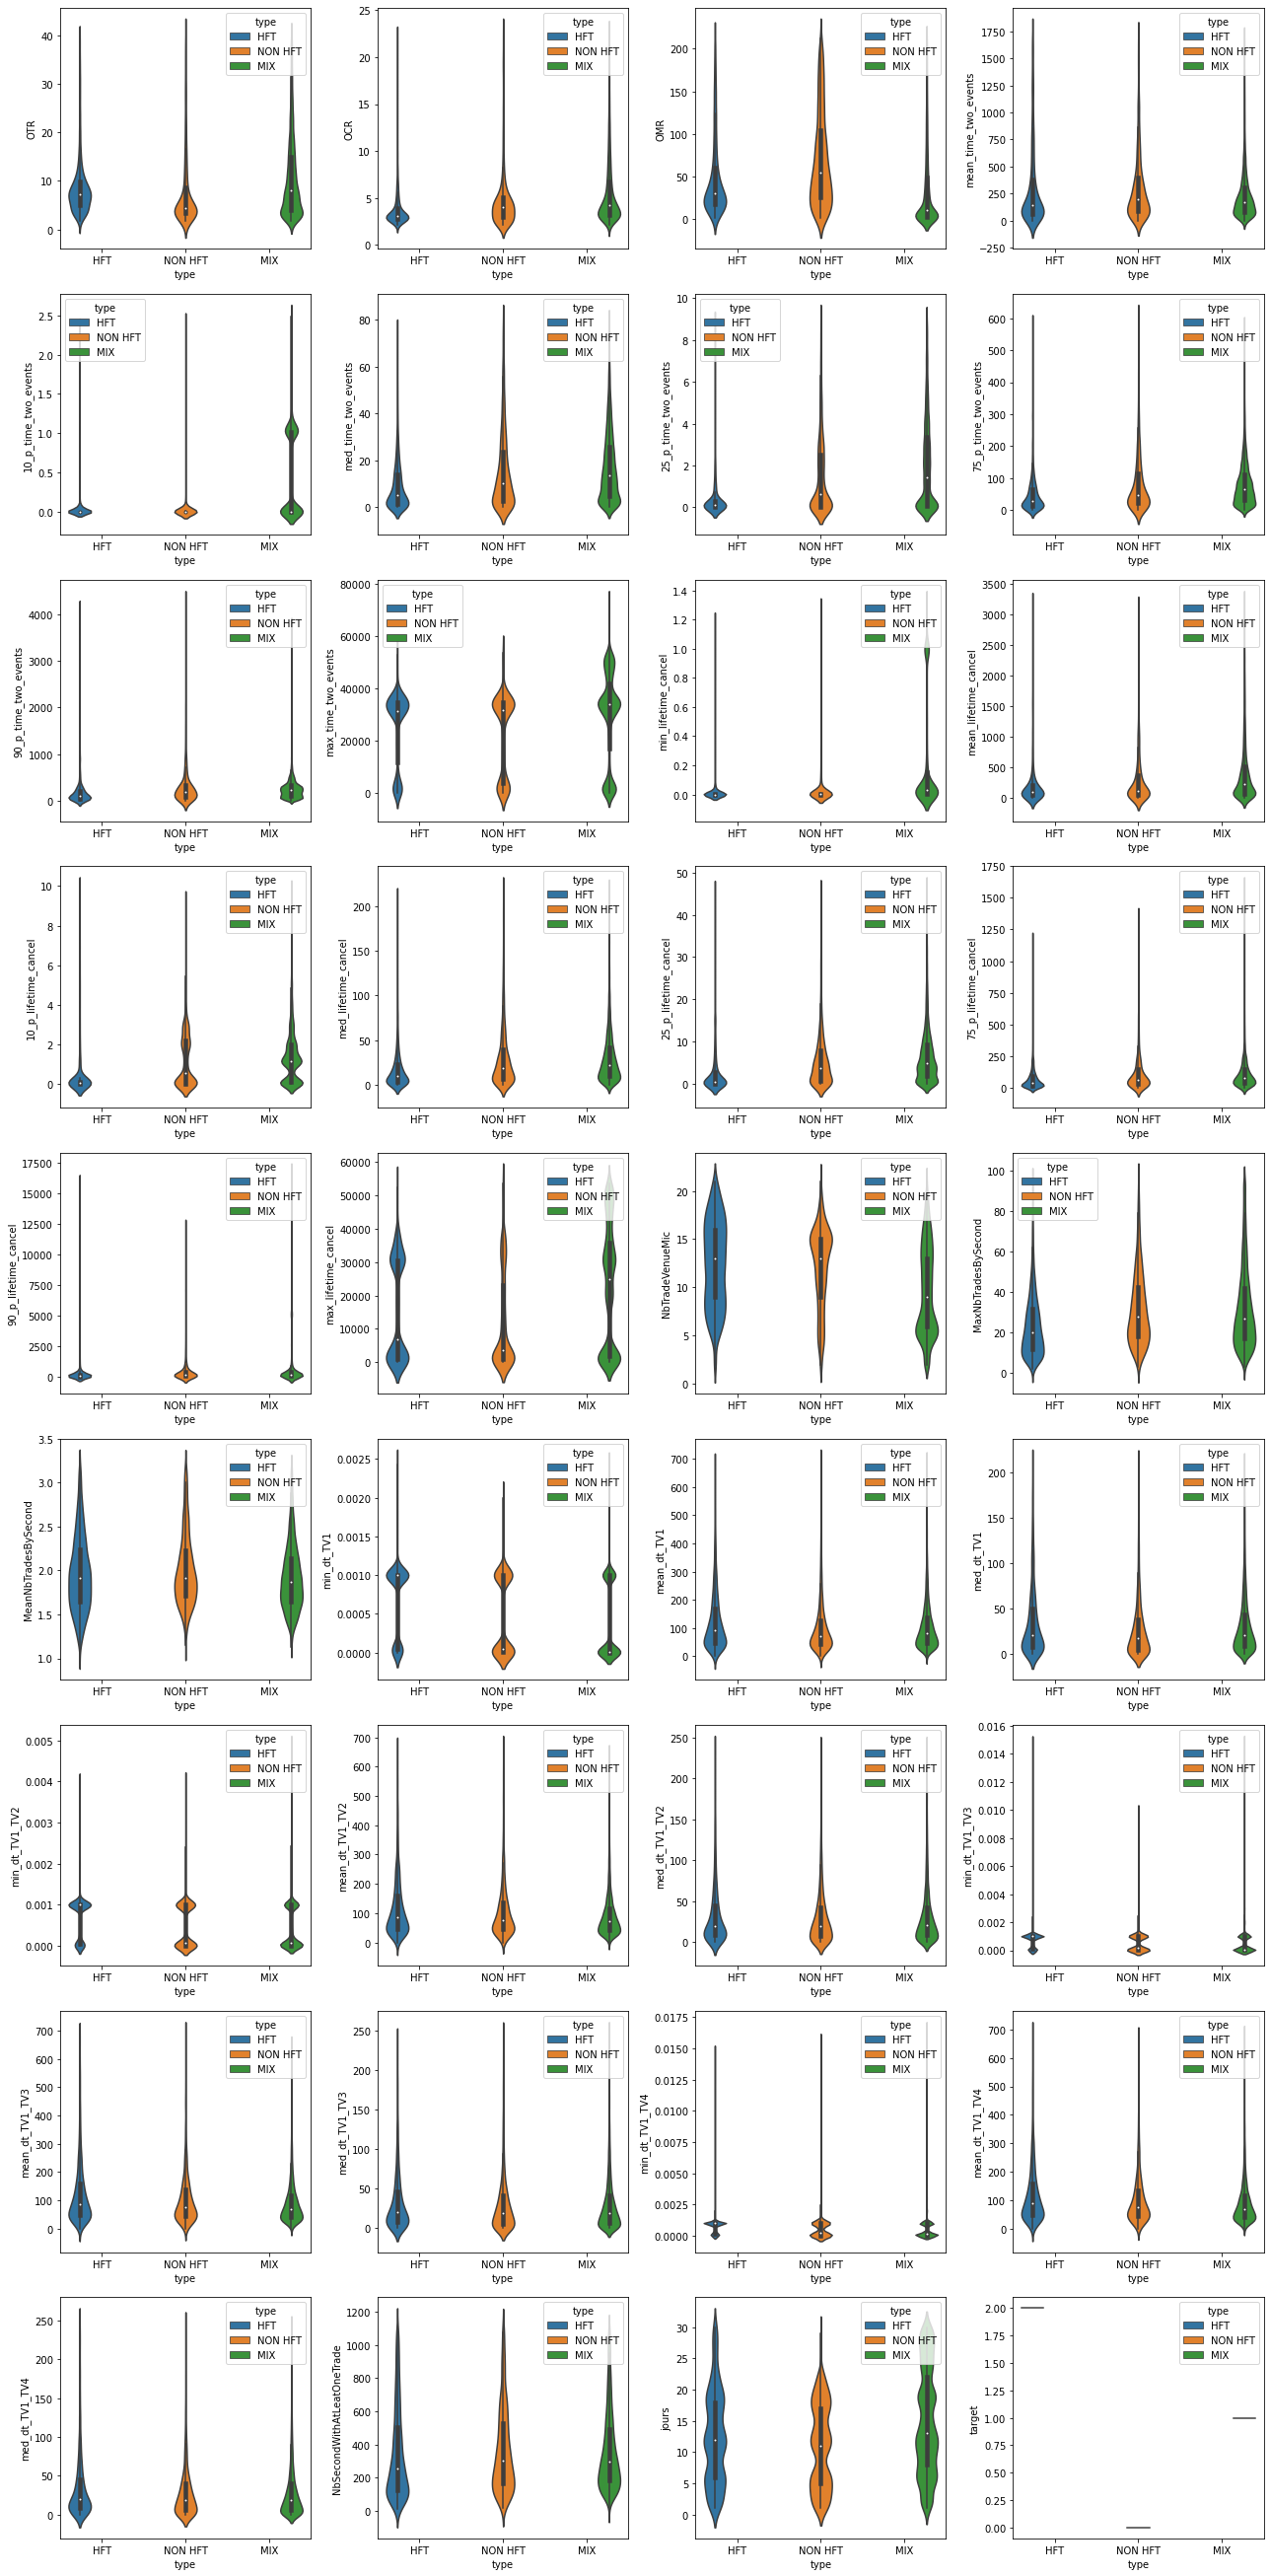

In [130]:
columns_num=df_features_clean_num.columns
plt.figure(figsize=(18,40))
for i,var in enumerate(columns_num,1):
    plt.subplot(10,4,i)
    sns.violinplot(x="type", y=var, hue="type", data=df_features_clean)
plt.tight_layout()
plt.show()

In [58]:
columns_num=columns_num[1:len(columns_num)-1]

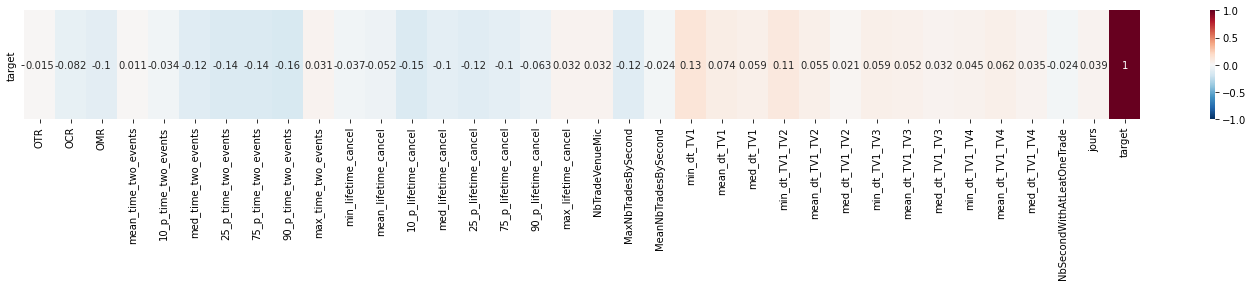

In [131]:
plt.figure(figsize=(25,2))
df_features_clean_num=df_features_clean[columns_num]
sns.heatmap(df_features_clean_num.corr().iloc[[-1]],
            cmap='RdBu_r',
            annot=True,
            vmin=-1, vmax=1)
plt.show()

We find that there is not a strong correlation between the predictors and our target variable. Indeed, no correlation reaches in absolute value 0.5 with the target variable

The correlation table of the explanatory variables with our target variable clearly shows us that there is no linear relationship between these variables and the target variable. Indeed, none of them has a correlation greater than 2% with the target variable

The correlation matrix visualized below is the quantification of the linear relationships that can exist between our predictors

The correlation matrix is a square matrix that contains the Pearson product-moment correlation coefficient (often abbreviated as Pearson's r), which measure the linear dependence between pairs of features. The correlation coefficients are in the range -1
to 1. Two features have a perfect positive correlation if r =1, no correlation if r = 0 , and a perfect negative correlation if r = −1. As mentioned previously, Pearson's correlation coefficient can simply be calculated as the covariance between two
features x and y (numerator) divided by the product of their standard deviations (denominator):

<Figure size 1440x1440 with 0 Axes>

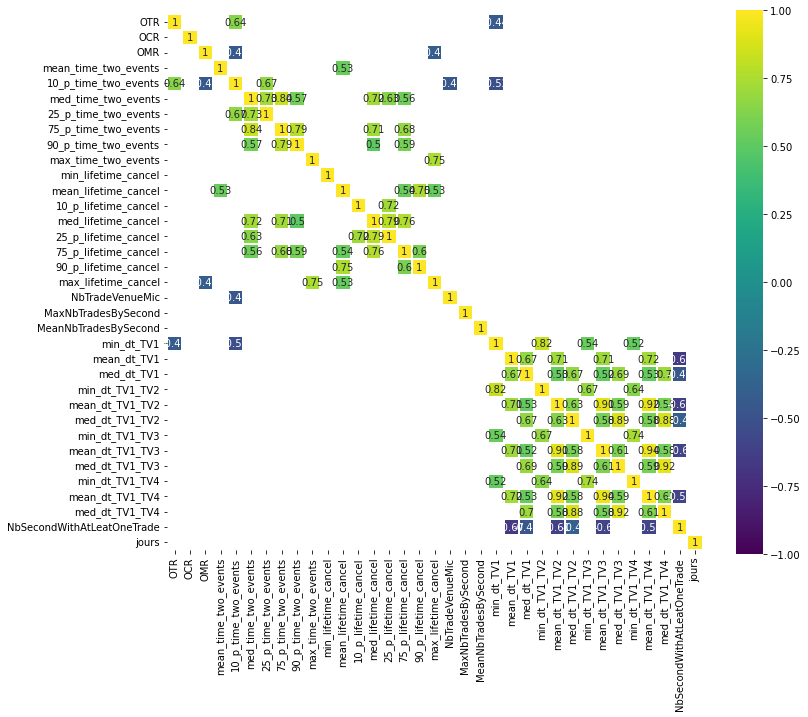

In [137]:
plt.figure(figsize=(20,20))
corr = df_features_clean_num.drop('target', axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 10}, square=True);
plt.show()

Above we see the table of correlation matrix between the predictors and we have displayed only those whose value is greater than 50%.
We can see that, a strong correlation (up to 88% for some) between the variables min_dt_TV1, mean_dt_TV1, med_dt_TV1, min_dt_TV1_TV2, mean_dt_TV1_TV2, med_dt_TV1_TV2, min_dt_TV1_TV3, mean_dt_TV1_TV3, med_dt_TV1_TV3 , min_dt_TV1_TV4, mean_dt_TV1_TV4, med_dt_TV1_TV4.
This strong correlation between our predictors could be a source of multicollinearity. 

Multicollinearity refers to the statistical phenomenon where two or more independent variables are strongly correlated. It marks the almost perfect or exact relationship between the predictors. This strong correlation between the exploratory variables is one of the major problems in linear regression analysis.

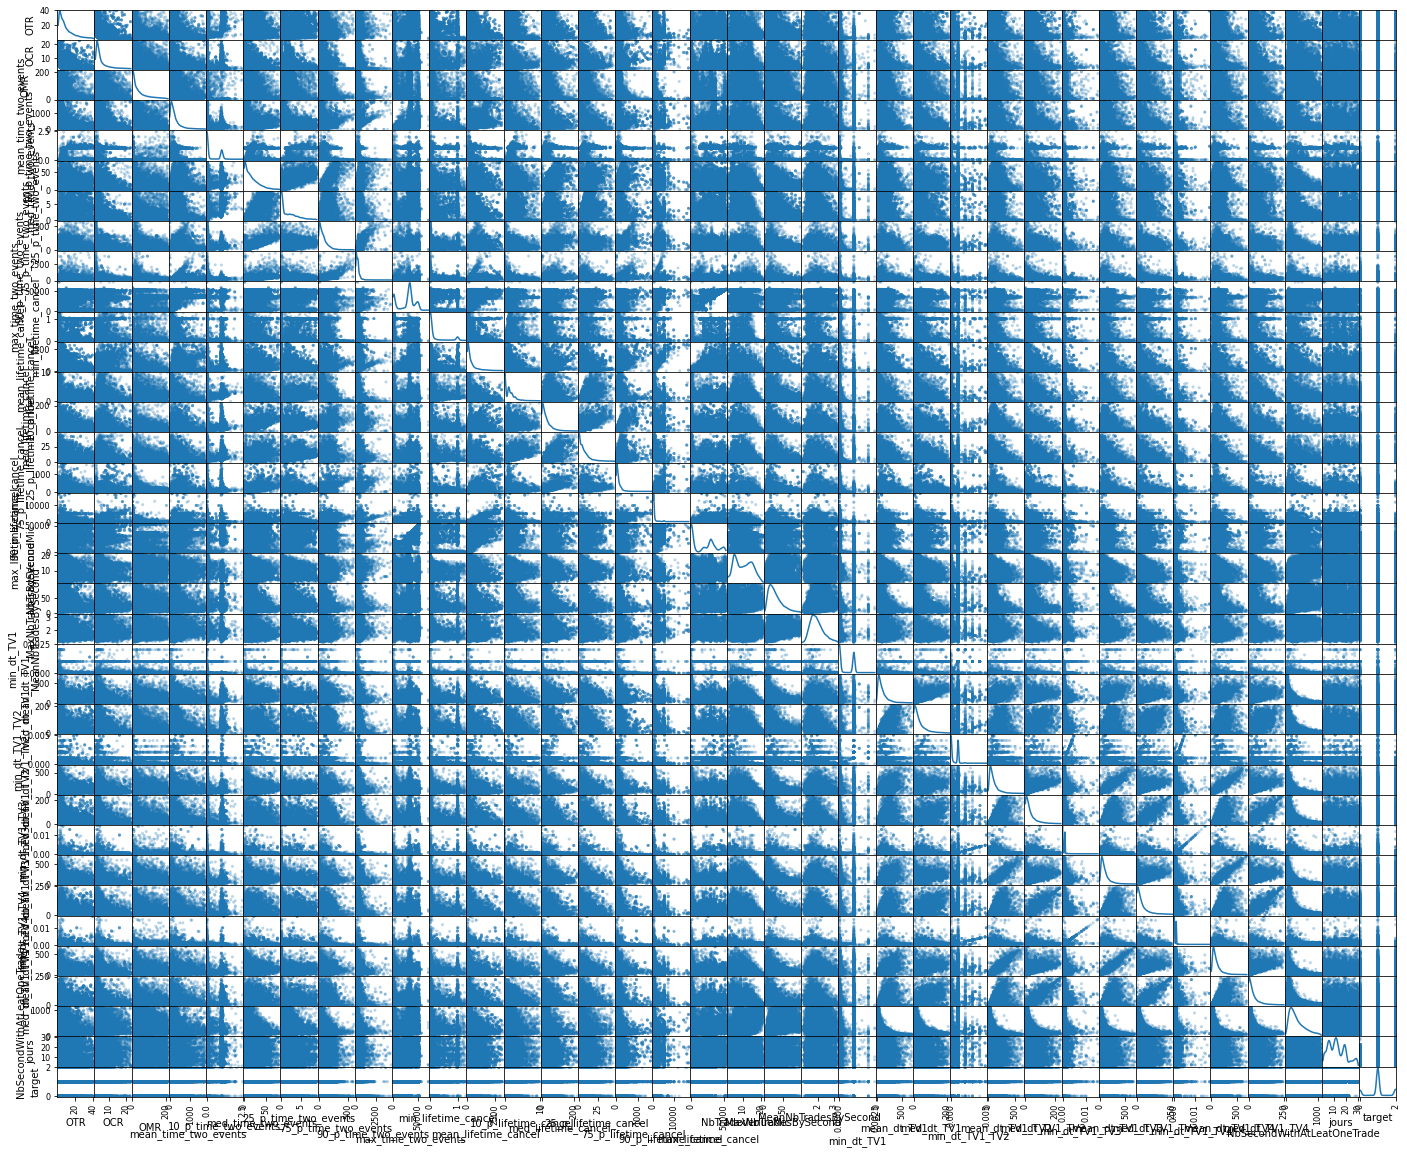

In [321]:
pd.plotting.scatter_matrix(df_features_clean_num,alpha=0.3,figsize=(24,20), diagonal='kde')
plt.show()

This graph displays the joint scatterplots between our explanatory variable, there is no linear relationship between it.

### Préprocessing

We will now turn our attention to data normalization. Data normalization consists of scaling the values of our different explanatory variables to the same scale. Indeed, the non-normalization of data has a huge effect on data performance. There are several, including centered data with their deviations -type, centered and reduce data, normalize with min max etc.

For our project, We will use the min-max method

In [45]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler=MinMaxScaler()

# Detection of the multicolinearity

In [47]:
# we're gonna use the VIF (Variance Inflation Factor)

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
#len(df_features2.values)

In [48]:
vif_data = pd.DataFrame()
vif_data["feature"] = df_features_clean_num.columns
vif_data["VIF"] = [variance_inflation_factor(df_features_clean_num.values, i) for i in range(len(df_features_clean_num.columns))]

print(vif_data)

C:\Users\thier\anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


                       feature        VIF
0                        Index   6.800008
1                          OTR   5.687785
2                          OCR   5.490897
3                          OMR   2.465000
4          min_time_two_events        NaN
5         mean_time_two_events   4.425027
6         10_p_time_two_events   5.273402
7          med_time_two_events  19.387889
8         25_p_time_two_events   7.767657
9         75_p_time_two_events  17.062870
10        90_p_time_two_events   6.100147
11         max_time_two_events  11.440563
12         min_lifetime_cancel   1.840694
13        mean_lifetime_cancel   8.333125
14        10_p_lifetime_cancel   4.506421
15         med_lifetime_cancel  13.207461
16        25_p_lifetime_cancel   9.555647
17        75_p_lifetime_cancel   6.196895
18        90_p_lifetime_cancel   3.794432
19         max_lifetime_cancel   9.004841
20             NbTradeVenueMic  10.109365
21         MaxNbTradesBySecond   5.704657
22        MeanNbTradesBySecond  23

So we can see that there is a lot of multicolinearity in our database, since there is a lot of variables in the quantiles that have almost the same VIF score (go deeper and take examples in the presentation)

C:\Users\33698\AppData\Local\Temp\ipykernel_20280\1259080852.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\33698\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


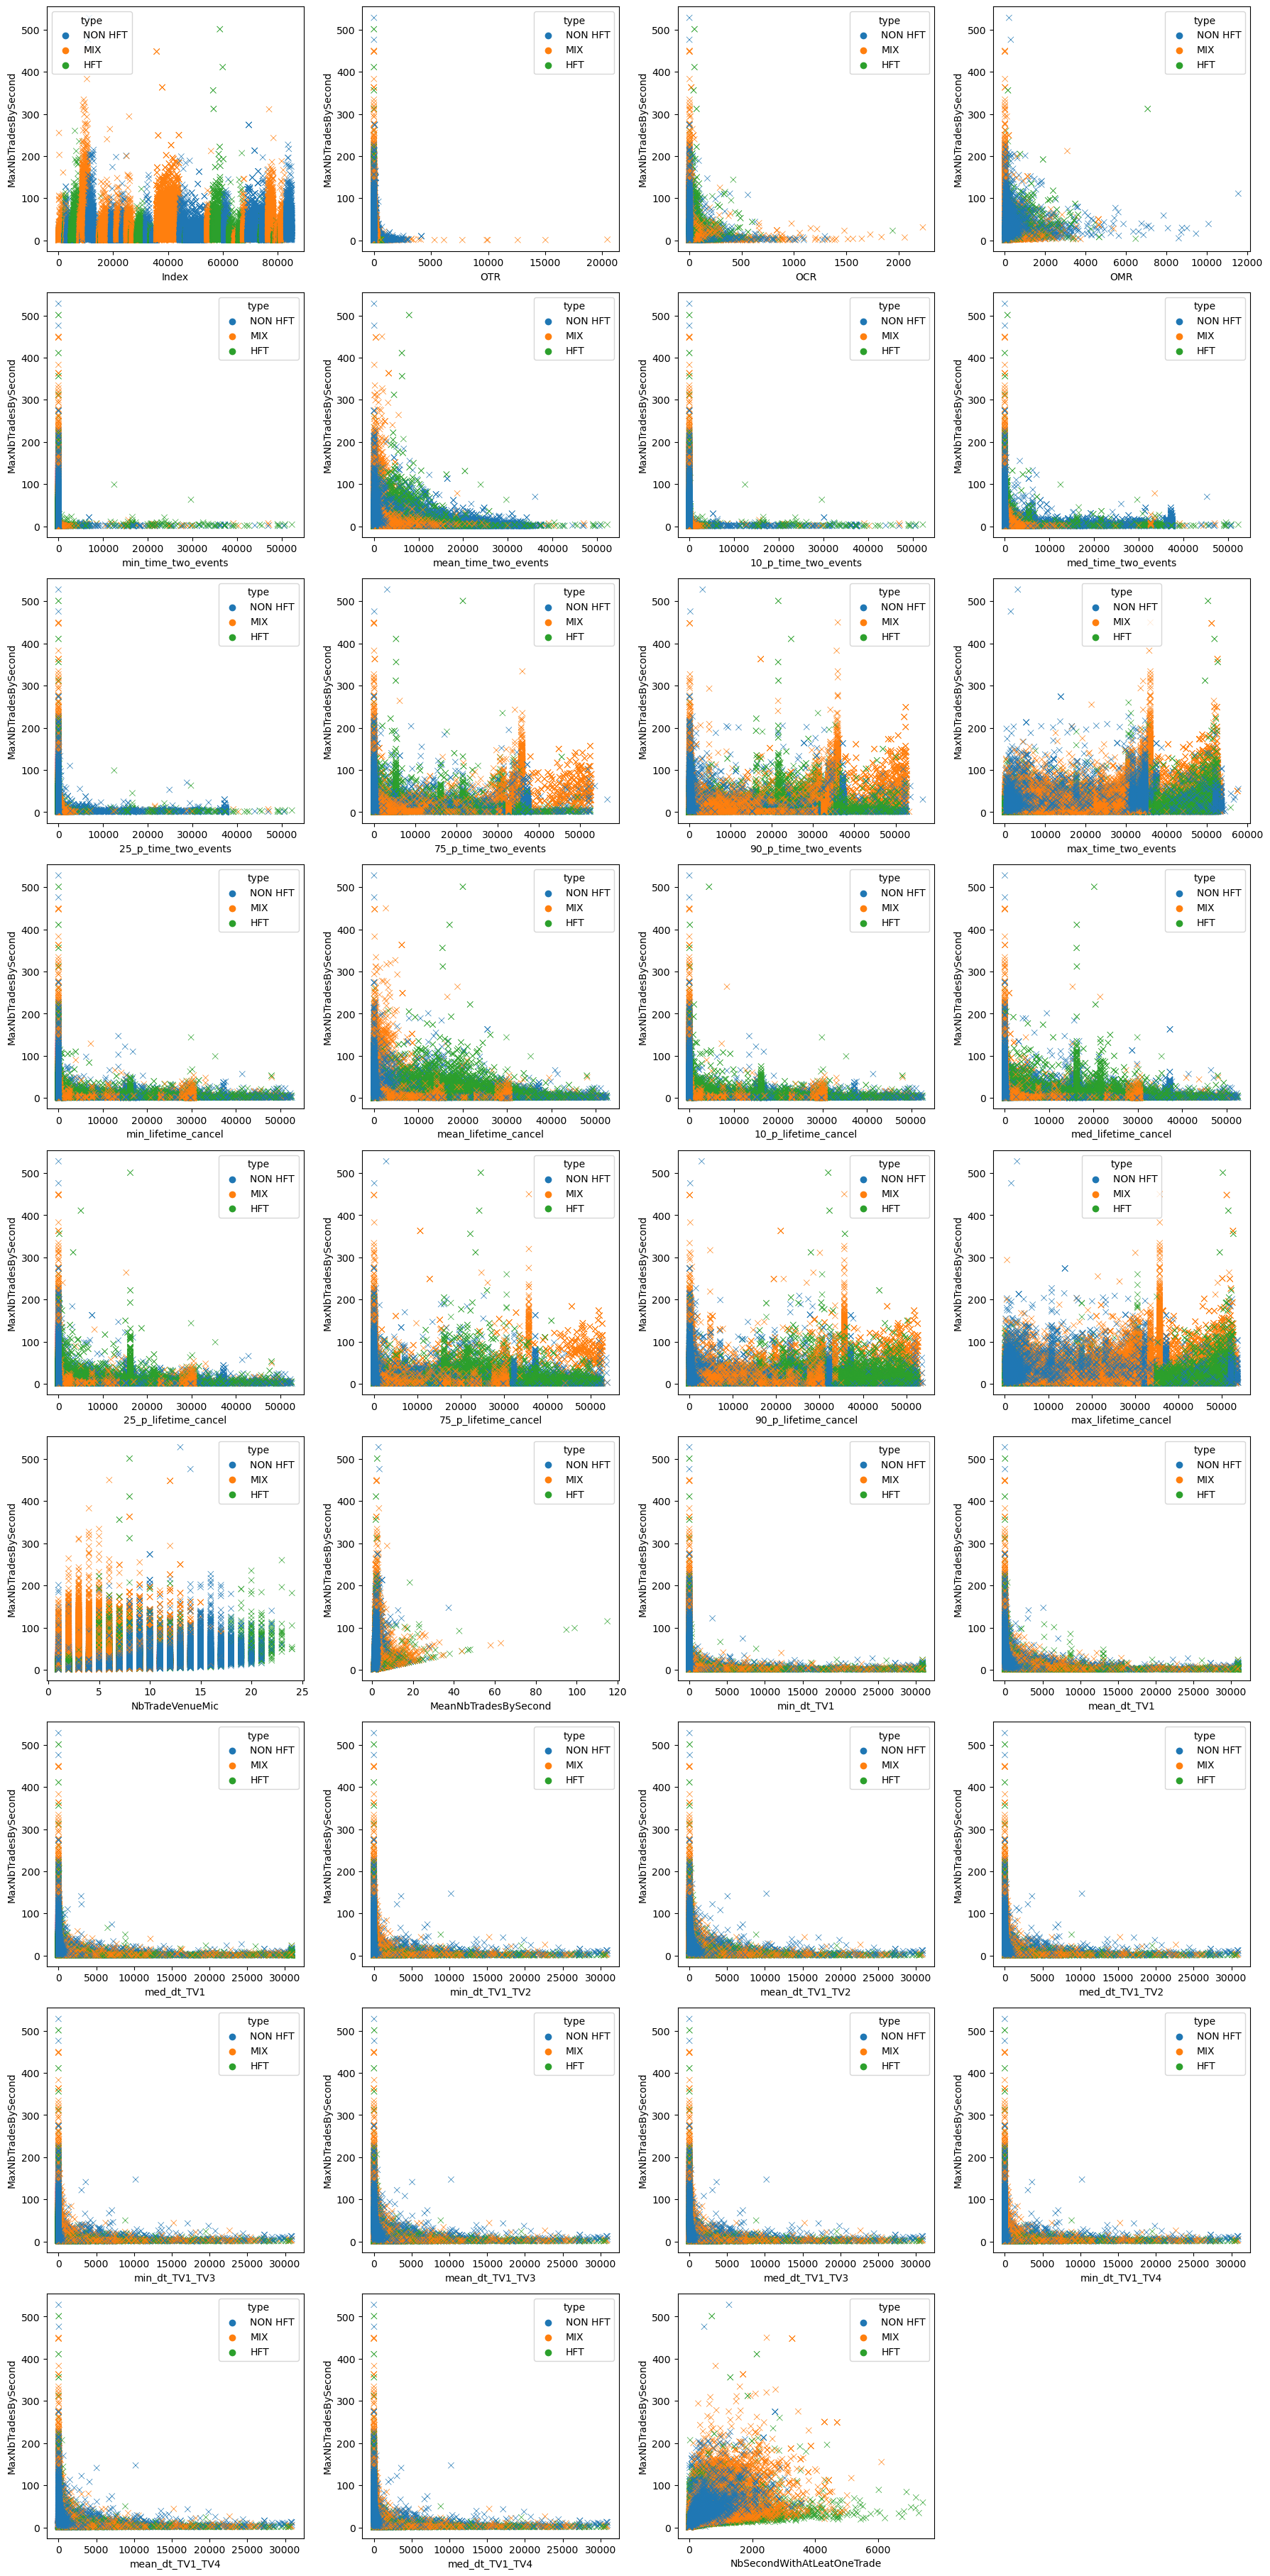

In [100]:
import seaborn as sns

plt.figure(figsize=(18,40))

for i,var in enumerate(df_train.drop(['type', 'Share', 'Day', 'Trader', 'MaxNbTradesBySecond'], axis=1).columns,1):
    plt.subplot(10,4,i)
    sns.scatterplot(data = df_train, x = var, y = 'MaxNbTradesBySecond', color='black', marker='x', hue = 'type')
plt.tight_layout()
plt.show()

We clearly see that our model is non-linear because for each variable, we can't separate the distinct types with a line.

So our model is non-linear, and has some multicolinearity on few variables. We need to take this in account for the choice of our method of reduction of the dimensionality.
We can't perform PCA, LDA or ICA.

## Feature Selection

Variable selection is an important step in a machine learning project. Indeed, the variable selection allows us to reduce the computational cost of modeling, the problem of the curse of dimensionality in our model to have a good performance of our prediction model.
There are several methods of dimensionality reduction, the principal component analysis (PCA) when all the input variables are continuous quantitative, it consists in reserving the components which explain a strong proportion of the variance of all the input variables. The selection method, based on statistics, consists of evaluating the relationship between each input variable and the target variable using statistics and selecting the input variables that have the strongest relationship with the target variable.

There are also iterative methods of variable selection based either on the R2 or AIC of the model according to the progressive addition or decrease of variables in the model.

#### Split our dataset in Train and test set

In [49]:
#s
target=df_features_clean['target']
features_names=df_features_clean_num.drop(['target','jours'], axis=1).columns
features=df_features_clean[features_names]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)
print(f'the number of rows in the Train set is {X_train.shape[0]}\nand {X_train.shape[1]} columns')
print(f'the number of rows in the Test set is {X_test.shape[0]}\nand {X_test.shape[1]} columns')

the number of rows in the Train set is 13849
and 36 columns
the number of rows in the Test set is 3463
and 36 columns


As our subject is classification problem with categorical variable (target variable) and numeric variable (explanatory) we will use univariate variable selection based on mutual information.
The mutual information.


Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances 


As we have 34 explanatory variables which is huge, we will select the half or 17 explanatory variables that have mutual information with the highest target variable 

In [50]:
from sklearn.feature_selection import mutual_info_classif
# define feature selection
# we choose 17 variables
fs = SelectKBest(score_func=mutual_info_classif, k=17)
# apply feature selection
X_selected = fs.fit_transform(X_train, y_train)
print(X_selected.shape)

(13849, 17)


The variables with a high prediction score retained by our selection method are:

In [51]:
print(features_names[fs.get_support()])

Index(['Index', 'OTR', 'OCR', 'OMR', '10_p_time_two_events',
       'med_time_two_events', '25_p_time_two_events', '75_p_time_two_events',
       '90_p_time_two_events', 'max_time_two_events', 'min_lifetime_cancel',
       '10_p_lifetime_cancel', 'med_lifetime_cancel', '25_p_lifetime_cancel',
       '75_p_lifetime_cancel', '90_p_lifetime_cancel', 'max_lifetime_cancel'],
      dtype='object')


### Rebalancing the dataset

In [326]:
#distribution of the target variable in our train set
rp.summary_cat(y_train)

Variable  Outcome  Count  Percent
0   target        1   9816    70.88
1                 2   2152    15.54
2                 0   1881    13.58

In [327]:
rp.summary_cat(y_test)

Variable  Outcome  Count  Percent
0   target        1   2508    72.42
1                 2    549    15.85
2                 0    406    11.72

As explained above, our given base is unbalanced, which is why we must balance our bases before applying our prediction model.

There are many methods to overcome imbalanced datasets in classification modeling by oversampling the minority class or undersampling the majority class. To increase the model performance even further, many researchers suggest combining oversampling and undersampling methods to balance the dataset better.

We have two approaches to rebalancing a database, we have the approach of:
    -Sampling method
    -Cost sensitive method

As part of our project, we will use the method of resampling

Here we use the combined method of subsampling with SMOTENN and subsampling with the nearest neighbour method.

In [52]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
#Define SMOTE-ENN
resample=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))

## Evaluate algorithms


After the preparation of our data it is time to proceed to the evaluation of different learning model because we do not know for the moment which model is better to solve our problem

There are different learning algorithms that are candidates for fitting our data, which are of two categories: Linear and nonlinear algorithms. 

We will use logistic regression with its multinomial variant as we have several class, regularized regression (lasso) for the linear variant of algorithms. 


For the nonlinear variant, we will use the random Forest and XGboost 

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
import xgboost as xgb
from sklearn.svm import SVC
from time import time
from sklearn.pipeline import FeatureUnion
from imblearn.pipeline import Pipeline
from  sklearn.discriminant_analysis  import  LinearDiscriminantAnalysis 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

### 1. Logistic regression Classifier

In [55]:
scaler=StandardScaler()
feature_unions=[]
feature_unions.append(('scaler',scaler))
feature_unions.append(('features selection ',fs))
feature_unions.append(('resample',resample))
varkfold = KFold(n_splits=10)

estimators_RegLog=[('scaler',StandardScaler()),
                   ('best selection',SelectKBest(score_func=mutual_info_classif, k=17)),
                   ('resampling',SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))),
                   ('logistic Multinomial', LogisticRegression(multi_class='multinomial', random_state=1, n_jobs=7))]
pipeline_LogReg=Pipeline(estimators_RegLog)

### 2. Linear discriminant Analisis

In [56]:
feature_unions=[]
feature_unions.append(('scaler',scaler))
feature_unions.append(('features selection ',fs))
feature_unions.append(('resample',resample))
varkfold = KFold(n_splits=10)
estimators_LDA=[('scaler',StandardScaler()),
                   ('best selection',SelectKBest(score_func=mutual_info_classif, k=17)),
                   ('resampling',SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))),
                   ('LDA model', LinearDiscriminantAnalysis())]
pipeline_LDA=Pipeline(estimators_LDA)

### 3. Random Forest Classifier

In [58]:
feature_unions=[]
feature_unions.append(('scaler',scaler))
feature_unions.append(('features selection ',fs))
feature_unions.append(('resample',resample))
varkfold = KFold(n_splits=10)
estimators_Rf=[('scaler',StandardScaler()),
                   ('best selection',SelectKBest(score_func=mutual_info_classif, k=17)),
                   ('resampling',SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))),
                   ('Random Forest',RandomForestClassifier(random_state=1,n_jobs=7))]
pipeline_Rf=Pipeline(estimators_Rf)


### 4. XGboost Classifer

In [61]:
feature_unions=[]
feature_unions.append(('scaler',scaler))
feature_unions.append(('features selection ',fs))
feature_unions.append(('resample',resample))
varkfold = KFold(n_splits=10)
estimators_XG=[('scaler',StandardScaler()),
                   ('best selection',SelectKBest(score_func=mutual_info_classif, k=17)),
                   ('resampling',SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))),
                   ('Xboost Model',xgb.XGBClassifier(random_state=1,n_jobs=7, objective="multi:softprob"))]
pipeline_XG=Pipeline(estimators_XG)

### now we use a loop to run all estimates at once

In [70]:
learners=['multinomial regression', 'LDA','Random forest classifier','XGBoost classier']
columns=['learner','acc_train','acc_test','f1_score']
cnt=0
learningresults= pd.DataFrame(columns=columns)
results = {}

for learner in [pipeline_LogReg, pipeline_LDA,pipeline_Rf,pipeline_XG]:
    #print(learners[cnt])
    results['learner']=learners[cnt]
    #Fitting the learner to the training data using slicing with 'sample_size'
    learner.fit(X_train, y_train)

    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    results['acc_train'] = accuracy_score(y_train, predictions_train)
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    beta=0.5
    results['f1_score'] = f1_score(y_test,predictions_test, average="macro")
    print(results)
    learningresults.loc[cnt]=results
    cnt=cnt+1


{'learner': 'multinomial regression', 'acc_train': 0.5991768358726262, 'acc_test': 0.5859081721051111, 'f1_score': 0.5366508553778988}
{'learner': 'LDA', 'acc_train': 0.5700772618961658, 'acc_test': 0.5561651747040138, 'f1_score': 0.5141138381012008}
{'learner': 'Random forest classifier', 'acc_train': 0.9698895227092209, 'acc_test': 0.9630378284724228, 'f1_score': 0.9486873666822865}
{'learner': 'XGBoost classier', 'acc_train': 0.9286591089609358, 'acc_test': 0.9249205890846087, 'f1_score': 0.9005631925596376}


#### Here is the accuracy table and the F1 score for each of the estimated models

In [71]:
learningresults

learner  acc_train  acc_test  f1_score
0    multinomial regression   0.599177  0.585908  0.536651
1                       LDA   0.570077  0.556165  0.514114
2  Random forest classifier   0.969890  0.963038  0.948687
3          XGBoost classier   0.928659  0.924921  0.900563

In [72]:
learningresults.to_csv('learningResultatMCARData.csv')

We see that the 2 super models which are the randome forest and the XGboost with respectively the accuracy of 0.963038, 0.924921 and F1 score of 0.948687 and 0.900563

### We now compare the predictive power of our different prediction algorithms

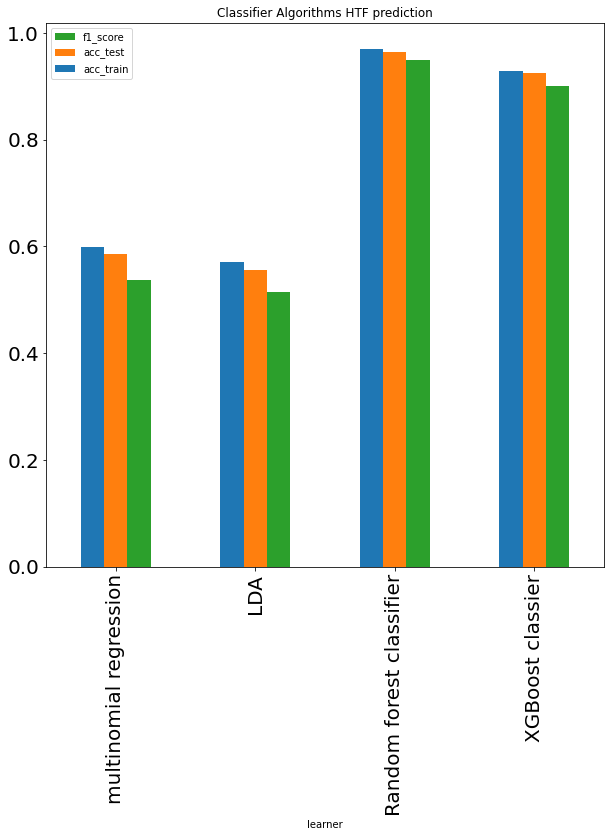

In [73]:
#Looking at the plots to determine the best Classifier for our Dataset

learningresults.columns
learningresults.plot(kind='bar', x='learner',
legend='reverse', title='Classifier Algorithms HTF prediction',figsize=(10,10), fontsize=20)
plt.show()

Now we know that the best candidates among our classifiers are XGBoost and RandomForest. Indeed, they have the best prediction scores (Accuracy and F1 score) whose values are respectively 0.8284352, 0.7329037 for XGBoost and RandomForest 0.79969, 0.69132932.

We notice that the bad candidate algorithms for our problem are the linear ones (mulitinomial regression and linear discriminant analysis)

#### We will therefore retain the XGboost and the RandomForest which we will search for the best hyperparameters


In [65]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from IPython.display import display
import pickle, os.path
from sklearn.metrics import fbeta_score

## KNN emputation

Now we make a fit of our model with the database on which we have replaced our missing values by the value of their nearest neighbors

In [66]:
data_KNN_clean=pd.read_csv("D:/Master2 EBDS/Document projet Machine learning/dataProjet/data AMF Classification des TRAIDER/data_KNNimputer.csv")
featuresKNN=data_KNN_clean.drop(['sample','target'], axis=1)
targetKNN=data_KNN_clean['target']
print(featuresKNN.shape)
print(targetKNN.shape)

(191086, 35)
(191086,)


In [67]:
X_trainKNN, X_testKNN, y_trainKNN, y_testKNN = train_test_split(featuresKNN, targetKNN, test_size=0.2, random_state=1)
print(f'the number of rows in the Train set is {X_trainKNN.shape[0]}\nand {X_trainKNN.shape[1]} columns')
print(f'the number of rows in the Test set is {X_testKNN.shape[0]}\nand {X_testKNN.shape[1]} columns')

the number of rows in the Train set is 152868
and 35 columns
the number of rows in the Test set is 38218
and 35 columns


We apply the same algorithms in order to compare their performance to those adjusted on the database obtained by the method of removal of all rows for which there is a presence of missing value

In [74]:
learners=['multinomial regression', 'LDA','Random forest classifier','XGBoost classier']
columns=['learner','acc_train','acc_test','f1_score']
cnt=0
learningresultsKNN= pd.DataFrame(columns=columns)
results = {} 
for learner in [pipeline_LogReg, pipeline_LDA,pipeline_Rf,pipeline_XG]:
    print(learners[cnt])
    results['learner']=learners[cnt]
        #Fitting the learner to the training data using slicing with 'sample_size'
    learner.fit(X_trainKNN, y_trainKNN)

    predictions_test = learner.predict(X_testKNN)
    predictions_train = learner.predict(X_trainKNN)
    results['acc_train'] = accuracy_score(y_trainKNN, predictions_train)
    results['acc_test'] = accuracy_score(y_testKNN, predictions_test)
    beta=0.5
    results['f1_score'] = f1_score(y_testKNN,predictions_test, average="macro")
    print(results)
    learningresultsKNN.loc[cnt]=results
    cnt=cnt+1

#### Here is the accuracy table and the F1 score for each of the estimated models

In [459]:
learningresults

learner  acc_train  acc_test  f1_score
0    multinomial regression   0.330679  0.338792  0.311545
1                       LDA   0.316106  0.328726  0.298709
2            SVC classifier   0.439941  0.430739  0.417821
3  Random forest classifier   0.623385  0.556791  0.554506
4          XGBoost classier   0.637282  0.572416  0.571747

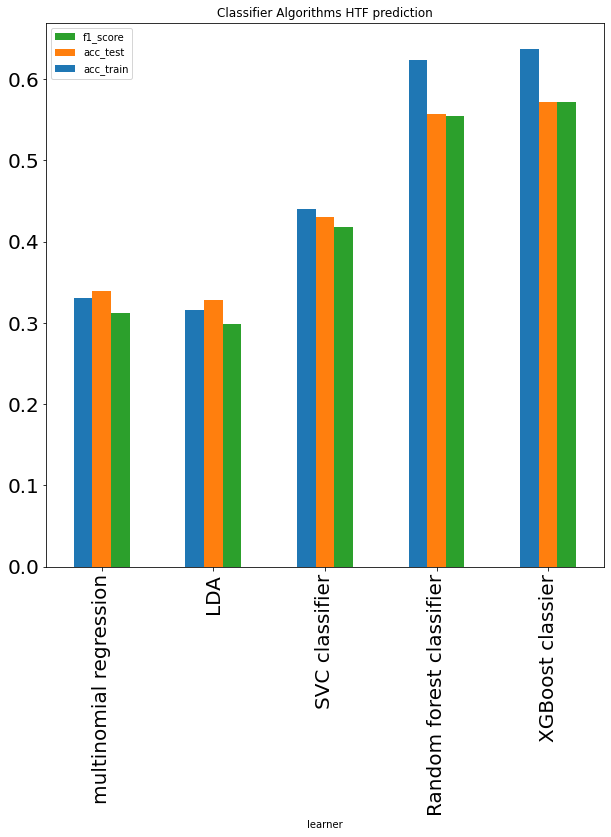

In [460]:
#Looking at the plots to determine the best Classifier for our Dataset

learningresults.columns
learningresults.plot(kind='bar', x='learner',
legend='reverse', title='Classifier Algorithms HTF prediction',figsize=(10,10), fontsize=20)
plt.show()

It can be seen that the estimation made on the database obtained by KNN emputation method is less efficient. Indeed, we can see that the same order of classification of the algorithms, while we can see that the set of algorithms adjusted with the method of deletion of the observations for which there was a missing characteristic is better than the adjustment made on the data obtained with the KNN amputation method.

Thus, we will look for the hyper parameters on the data obtained by deleting the rows and columns.

In [628]:
# we choose 5 best variables
fs = SelectKBest(score_func=mutual_info_classif, k=5)
# apply feature selection
X_selected = fs.fit_transform(X_train, y_train)


In [629]:
X_train_Kbest=X_train[X_train.columns[fs.get_support()]]
X_test_Kbest=X_test[X_test.columns[fs.get_support()]]
scaler=MinMaxScaler()

X_train_Kbest_scaler=pd.DataFrame(scaler.fit_transform(X_train_Kbest),columns=X_train.columns[fs.get_support()])
X_test_Kbest_scaler=pd.DataFrame(scaler.fit_transform(X_test_Kbest),columns=X_train.columns[fs.get_support()])

In [630]:
X_train_Kbest_scaler.shape
X_test_Kbest_scaler.shape

(3463, 7)

In [553]:
from dask.dataframe import from_pandas
from dask import delayed
ddfX_train=from_pandas(X_train_Kbest_scaler,npartitions=20)
ddfy_train=from_pandas(y_train,npartitions=20)

In [92]:
#ddfX_train=clients.compute(ddfX_train)
#ddfy_train=clients.compute(ddfy_train)
#progress(ddfX_train)
#progress(ddfy_train)

In [601]:
X_train_decoup=np.array_split(X_train_Kbest_scaler,10)
y_train_decoup=np.array_split(y_train,10)

In [612]:
CV_Rf = GridSearchCV(Rf, param_grid=parameters, cv= 10, scoring='accuracy')
result_fit=[]
for i in range(10):
    r=delayed(CV_Rf.fit)(X_train_decoup[i],y_train_decoup[i])
    result_fit.append(r)

In [77]:
best_clf = None
beta=0.5

# initialise classifier

Rf=RandomForestClassifier(random_state=1,n_jobs=-1, n_estimators=1000)

parameters= {'max_depth': range(10,100,30),
             #'max_features': ['auto', 'sqrt'], 
             'min_samples_leaf': [2, 4, 10], 
             'min_samples_split': [2, 5, 10]}

grid_obj = GridSearchCV(Rf, parameters)

grid_fit = grid_obj.fit(X_train_Kbest_scaler, y_train)
CV_Rf = GridSearchCV(Rf, param_grid=parameters, cv= 5, scoring='accuracy')

delayed_fit=delayed(CV_Rf.fit)(X_train_Kbest_scaler, y_train)


In [ ]:
best_clf = grid_fit.best_estimator_

predictions = (clf_C.fit(X_train, y_train)).predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_
test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test,
predictions, beta = 0.5,average='micro'))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_
score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_
test, best_predictions, beta = 0.5,average='micro'))

In [ ]:
from dask_ml.model_selection import HyperbandSearchCV
import dask_ml

In [ ]:
 # initialise classifier
XG=XGBClassifier(random_state=1,n_jobs=-1, n_estimators=1000)

parameters = {
    "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500],
    "max_leaf_nodes": [2, 5, 10, 20, 50, 100],
    "learning_rate": loguniform(0.01, 1),
}

grid_obj = GridSearchCV(Rf, parameters)
grid_fit = grid_obj.fit(X_train_Kbest_scaler, y_train)
CV_Rf = GridSearchCV(Rf, param_grid=parameters, cv= 10)
CV_Rf.fit(X_train_Kbest_scaler, y_train)

In [73]:
best_clf = grid_fit.best_estimator_
# Make predictions using the unoptimized and model
predictions = (clf_C.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)
# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_
test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test,
predictions, beta = 0.5,average='micro'))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_
score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_
test, best_predictions, beta = 0.5,average='micro'))

In [78]:
pipeline_Rf.set_params

<bound method Pipeline.set_params of Pipeline(steps=[('scaler', StandardScaler()),
                ('best selection',
                 SelectKBest(k=17,
                             score_func=<function mutual_info_classif at 0x0000018043BBF700>)),
                ('resampling',
                 SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))),
                ('Random Forest',
                 RandomForestClassifier(n_jobs=7, random_state=1))])>

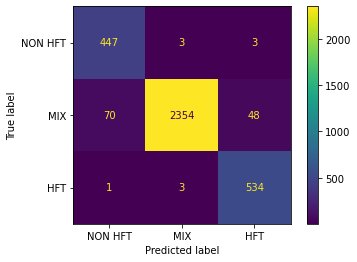

In [86]:
y_pred=pipeline_Rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['NON HFT','MIX', 'HFT'])
cmd.plot()
plt.show()

In [87]:
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score

In [90]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_pred = label_binarizer.transform(y_pred)
y_onehot_test.shape  

(3463, 3)

In [91]:
label_binarizer.transform([2]) # here is an example with the target = 2 (so the HFT class) of the encoder 

array([[0, 0, 1]])

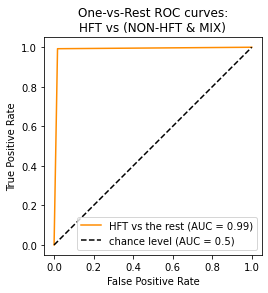

In [92]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, 2],
    y_onehot_pred[:, 2],
    name="HFT vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nHFT vs (NON-HFT & MIX)")
plt.legend()
plt.show()

# PCA Analysis

## Dimensionality reduction 

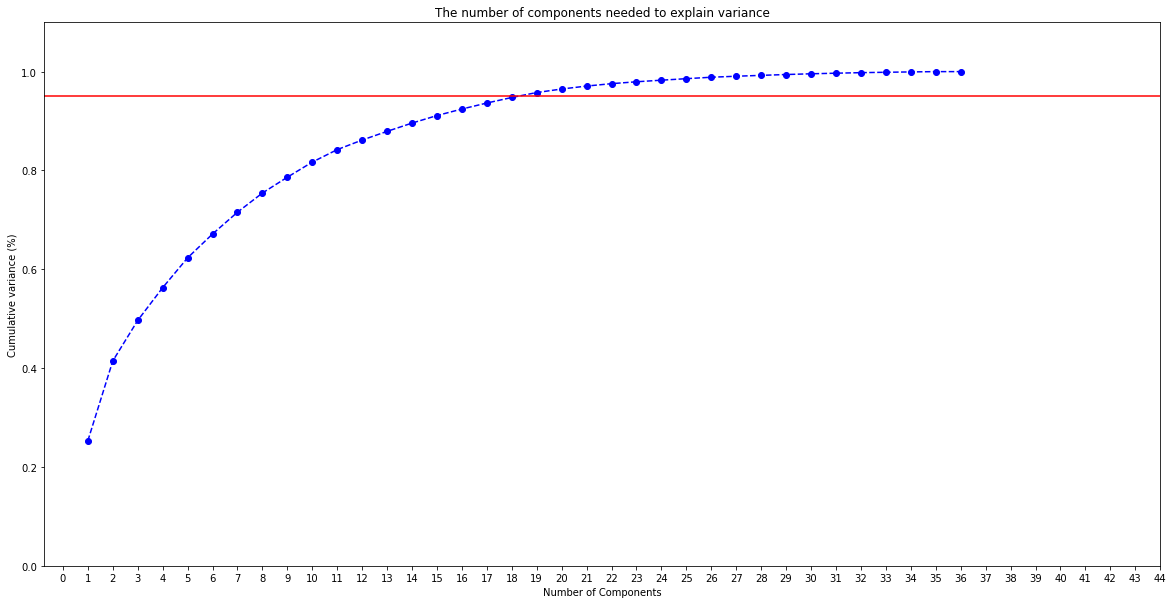

In [96]:
import numpy as np
from sklearn.decomposition import PCA

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(X_train)

pca = PCA().fit(data)

plt.figure(figsize=(20,10))
xi = np.arange(1, 37, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 45, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')

plt.show()

We see that if we want to explain 95% of the variance (which is what is done in the traditional litterature), we can reduce our dataset to only 18 features.

Eigenvalues: [7.87736327 6.24111114 2.74674342 2.4319732  2.19122324 1.6402908
 1.2823928  1.21962001 1.07518444 1.02256843 0.93809115 0.68864
 0.6553493  0.61030204 0.56948406 0.54049896 0.46099103 0.44724858
 0.41089792 0.34585541 0.31581873 0.29597218 0.26643456 0.25679548
 0.21440307 0.20270236 0.04184123 0.06217399 0.06902995 0.08462511
 0.09334894 0.109246   0.12725302 0.14780641 0.15397801 0.16274178
 0.        ]
Eigenvectors [[ 0.13823949 -0.13422189  0.31093535 ... -0.09865002  0.02332342
   0.        ]
 [ 0.02179869 -0.07214752 -0.10275374 ...  0.01738296  0.02854017
   0.        ]
 [-0.10397888  0.14675263 -0.17350045 ... -0.01034978  0.01441134
   0.        ]
 ...
 [-0.23793307 -0.1082934  -0.10110116 ... -0.07864184 -0.11951662
   0.        ]
 [-0.00701661 -0.00031716 -0.02806503 ... -0.00555075  0.00608481
   0.        ]
 [-0.02291007  0.05672235  0.1267998  ...  0.01106652  0.01658855
   0.        ]]
Sorted Eigenvalues: [7.87736327 6.24111114 2.74674342 2.4319732  2.1912

IndexError: list index out of range

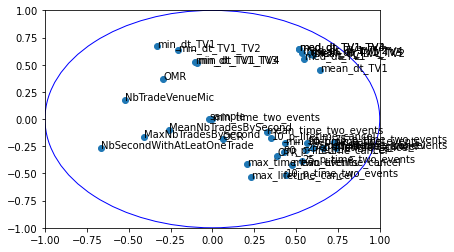

In [97]:
from numpy.linalg import eig
import math
pca = PCA(n_components = 18)
df_pca = df_features_clean.drop(['Trader', 'type', 'Index', 'Share', 'Day'], axis = 1)
corr_matrix = df_pca.corr().fillna(0)

l,e = eig(corr_matrix)

print('Eigenvalues:', l)
print('Eigenvectors', e)

idx = l.argsort()[::-1]   
l = l[idx]
e = e[:,idx]

print('Sorted Eigenvalues:', l)
print('Sorted Eigenvectors', e)

Proportion_var_expl_PC1 = l[0] / sum(l)
Proportion_var_expl_PC2 = l[1] / sum(l)
Proportion_var_expl_PC3 = l[2] / sum(l)
Proportion_var_expl_PC4 = l[3] / sum(l)
Proportion_var_expl_PC5 = l[4] / sum(l)
Proportion_var_expl_PC6 = l[5] / sum(l)
Proportion_var_expl_PC7 = l[6] / sum(l)
Proportion_var_expl_PC8 = l[7] / sum(l)
Proportion_var_expl_PC9 = l[8] / sum(l)
Proportion_var_expl_PC10 = l[9] / sum(l)
Proportion_var_expl_PC1 = l[0] / sum(l)
Proportion_var_expl_PC2 = l[1] / sum(l)
Proportion_var_expl_PC3 = l[2] / sum(l)
Proportion_var_expl_PC4 = l[3] / sum(l)
Proportion_var_expl_PC5 = l[4] / sum(l)
Proportion_var_expl_PC6 = l[5] / sum(l)
Proportion_var_expl_PC7 = l[6] / sum(l)
Proportion_var_expl_PC8 = l[7] / sum(l)
Proportion_var_expl_PC9 = l[8] / sum(l)
Proportion_var_expl_PC10 = l[9] / sum(l)
Proportion_var_expl_PC11 = l[0] / sum(l)
Proportion_var_expl_PC12 = l[1] / sum(l)
Proportion_var_expl_PC13 = l[2] / sum(l)
Proportion_var_expl_PC14 = l[3] / sum(l)
Proportion_var_expl_PC15 = l[4] / sum(l)
Proportion_var_expl_PC16 = l[5] / sum(l)
Proportion_var_expl_PC17 = l[6] / sum(l)
Proportion_var_expl_PC18 = l[7] / sum(l)
Proportion_var_expl_PC19 = l[8] / sum(l)
Proportion_var_expl_PC20 = l[9] / sum(l)
Proportion_var_expl_PC21 = l[0] / sum(l)
Proportion_var_expl_PC22 = l[1] / sum(l)
Proportion_var_expl_PC23 = l[2] / sum(l)
Proportion_var_expl_PC24 = l[3] / sum(l)
Proportion_var_expl_PC25 = l[4] / sum(l)
Proportion_var_expl_PC26 = l[5] / sum(l)
Proportion_var_expl_PC27 = l[6] / sum(l)
Proportion_var_expl_PC28 = l[7] / sum(l)
Proportion_var_expl_PC29 = l[8] / sum(l)
Proportion_var_expl_PC10 = l[9] / sum(l)

print("Proportion of variance explained by PC1:", Proportion_var_expl_PC1)
print("Proportion of variance explained by PC2:", Proportion_var_expl_PC2)
print("Proportion of variance explained by PC3:", Proportion_var_expl_PC3)
print("Proportion of variance explained by PC4:", Proportion_var_expl_PC4)
print("Proportion of variance explained by PC5:", Proportion_var_expl_PC5)
print("Proportion of variance explained by PC6:", Proportion_var_expl_PC6)
print("Proportion of variance explained by PC7:", Proportion_var_expl_PC7)
print("Proportion of variance explained by PC8:", Proportion_var_expl_PC8)
print("Proportion of variance explained by PC9:", Proportion_var_expl_PC9)
print("Proportion of variance explained by PC10:", Proportion_var_expl_PC10)
print("Proportion of variance explained by PC11:", Proportion_var_expl_PC11)
print("Proportion of variance explained by PC12:", Proportion_var_expl_PC12)
print("Proportion of variance explained by PC13:", Proportion_var_expl_PC13)
print("Proportion of variance explained by PC14:", Proportion_var_expl_PC14)
print("Proportion of variance explained by PC15:", Proportion_var_expl_PC15)
print("Proportion of variance explained by PC16:", Proportion_var_expl_PC16)
print("Proportion of variance explained by PC17:", Proportion_var_expl_PC17)
print("Proportion of variance explained by PC18:", Proportion_var_expl_PC18)

print("Proportion of variance explained by PC1 + PC2:", Proportion_var_expl_PC1 + Proportion_var_expl_PC2)
print("Proportion of variance explained by PC1 + PC2 + PC3:", Proportion_var_expl_PC1 + Proportion_var_expl_PC2 + Proportion_var_expl_PC3)
print("Proportion of variance explained by PC1 + PC2 + PC3 + PC4:", Proportion_var_expl_PC1 + Proportion_var_expl_PC2 + Proportion_var_expl_PC3 + Proportion_var_expl_PC4)
print("Proportion of variance explained by PC1 + PC2 + PC3 + PC4 + PC5:", Proportion_var_expl_PC1 + Proportion_var_expl_PC2 + Proportion_var_expl_PC3 + Proportion_var_expl_PC4 + Proportion_var_expl_PC5)

Corr_PC1_X1 = (e[0,0]*math.sqrt(l[0]))
Corr_PC1_X2 = (e[1,0]*math.sqrt(l[0]))
Corr_PC1_X3 = (e[2,0]*math.sqrt(l[0]))
Corr_PC1_X4 = (e[3,0]*math.sqrt(l[0]))
Corr_PC1_X5 = (e[4,0]*math.sqrt(l[0]))
Corr_PC1_X6 = (e[5,0]*math.sqrt(l[0]))
Corr_PC1_X7 = (e[6,0]*math.sqrt(l[0]))
Corr_PC1_X8 = (e[7,0]*math.sqrt(l[0]))
Corr_PC1_X9 = (e[8,0]*math.sqrt(l[0]))
Corr_PC1_X10 = (e[9,0]*math.sqrt(l[0]))
Corr_PC1_X11 = (e[10,0]*math.sqrt(l[0]))
Corr_PC1_X12 = (e[11,0]*math.sqrt(l[0]))
Corr_PC1_X13 = (e[12,0]*math.sqrt(l[0]))
Corr_PC1_X14 = (e[13,0]*math.sqrt(l[0]))
Corr_PC1_X15 = (e[14,0]*math.sqrt(l[0]))
Corr_PC1_X16 = (e[15,0]*math.sqrt(l[0]))
Corr_PC1_X17 = (e[16,0]*math.sqrt(l[0]))
Corr_PC1_X18 = (e[17,0]*math.sqrt(l[0]))
Corr_PC1_X19 = (e[18,0]*math.sqrt(l[0]))
Corr_PC1_X20 = (e[19,0]*math.sqrt(l[0]))
Corr_PC1_X21 = (e[20,0]*math.sqrt(l[0]))
Corr_PC1_X22 = (e[21,0]*math.sqrt(l[0]))
Corr_PC1_X23 = (e[22,0]*math.sqrt(l[0]))
Corr_PC1_X24 = (e[23,0]*math.sqrt(l[0]))
Corr_PC1_X25 = (e[24,0]*math.sqrt(l[0]))
Corr_PC1_X26 = (e[25,0]*math.sqrt(l[0]))
Corr_PC1_X27 = (e[26,0]*math.sqrt(l[0]))
Corr_PC1_X28 = (e[27,0]*math.sqrt(l[0]))
Corr_PC1_X29 = (e[28,0]*math.sqrt(l[0]))
Corr_PC1_X30 = (e[29,0]*math.sqrt(l[0]))
Corr_PC1_X31 = (e[30,0]*math.sqrt(l[0]))
Corr_PC1_X32 = (e[31,0]*math.sqrt(l[0]))
Corr_PC1_X33 = (e[32,0]*math.sqrt(l[0]))
Corr_PC1_X34 = (e[33,0]*math.sqrt(l[0]))
Corr_PC1_X35 = (e[34,0]*math.sqrt(l[0]))
Corr_PC1_X36 = (e[35,0]*math.sqrt(l[0]))

Corr_PC2_X1 = (e[0,1]*math.sqrt(l[1]))
Corr_PC2_X2 = (e[1,1]*math.sqrt(l[1]))
Corr_PC2_X3 = (e[2,1]*math.sqrt(l[1]))
Corr_PC2_X4 = (e[3,1]*math.sqrt(l[1]))
Corr_PC2_X5 = (e[4,1]*math.sqrt(l[1]))
Corr_PC2_X6 = (e[5,1]*math.sqrt(l[1]))
Corr_PC2_X7 = (e[6,1]*math.sqrt(l[1]))
Corr_PC2_X8 = (e[7,1]*math.sqrt(l[1]))
Corr_PC2_X9 = (e[8,1]*math.sqrt(l[1]))
Corr_PC2_X10 = (e[9,1]*math.sqrt(l[1]))
Corr_PC2_X11 = (e[10,1]*math.sqrt(l[1]))
Corr_PC2_X12 = (e[11,1]*math.sqrt(l[1]))
Corr_PC2_X13 = (e[12,1]*math.sqrt(l[1]))
Corr_PC2_X14 = (e[13,1]*math.sqrt(l[1]))
Corr_PC2_X15 = (e[14,1]*math.sqrt(l[1]))
Corr_PC2_X16 = (e[15,1]*math.sqrt(l[1]))
Corr_PC2_X17 = (e[16,1]*math.sqrt(l[1]))
Corr_PC2_X18 = (e[17,1]*math.sqrt(l[1]))
Corr_PC2_X19 = (e[18,1]*math.sqrt(l[1]))
Corr_PC2_X20 = (e[19,1]*math.sqrt(l[1]))
Corr_PC2_X21 = (e[20,1]*math.sqrt(l[1]))
Corr_PC2_X22 = (e[21,1]*math.sqrt(l[1]))
Corr_PC2_X23 = (e[22,1]*math.sqrt(l[1]))
Corr_PC2_X24 = (e[23,1]*math.sqrt(l[1]))
Corr_PC2_X25 = (e[24,1]*math.sqrt(l[1]))
Corr_PC2_X26 = (e[25,1]*math.sqrt(l[1]))
Corr_PC2_X27 = (e[26,1]*math.sqrt(l[1]))
Corr_PC2_X28 = (e[27,1]*math.sqrt(l[1]))
Corr_PC2_X29 = (e[28,1]*math.sqrt(l[1]))
Corr_PC2_X30 = (e[29,1]*math.sqrt(l[1]))
Corr_PC2_X31 = (e[30,1]*math.sqrt(l[1]))
Corr_PC2_X32 = (e[31,1]*math.sqrt(l[1]))
Corr_PC2_X33 = (e[32,1]*math.sqrt(l[1]))
Corr_PC2_X34 = (e[33,1]*math.sqrt(l[1]))
Corr_PC2_X35 = (e[34,1]*math.sqrt(l[1]))
Corr_PC2_X36 = (e[35,1]*math.sqrt(l[1]))

print("Correlation between PC1 and X1:", Corr_PC1_X1)
print("Correlation between PC1 and X2:", Corr_PC1_X2)
print("Correlation between PC1 and X3:", Corr_PC1_X3)
print("Correlation between PC1 and X4:", Corr_PC1_X4)
print("Correlation between PC1 and X5:", Corr_PC1_X5)
print("Correlation between PC2 and X1:", Corr_PC2_X1)
print("Correlation between PC2 and X2:", Corr_PC2_X2)
print("Correlation between PC2 and X3:", Corr_PC2_X3)
print("Correlation between PC2 and X4:", Corr_PC2_X4)
print("Correlation between PC2 and X5:", Corr_PC2_X5)

Corr_PC1 = [Corr_PC1_X1, Corr_PC1_X2, Corr_PC1_X3, Corr_PC1_X4, Corr_PC1_X5, Corr_PC1_X6, Corr_PC1_X7, Corr_PC1_X8, Corr_PC1_X9, Corr_PC1_X10, Corr_PC1_X11, Corr_PC1_X12, Corr_PC1_X13, Corr_PC1_X14, Corr_PC1_X15, Corr_PC1_X16, Corr_PC1_X17, Corr_PC1_X18, Corr_PC1_X19, Corr_PC1_X20, Corr_PC1_X21, Corr_PC1_X22, Corr_PC1_X23, Corr_PC1_X24, Corr_PC1_X25, Corr_PC1_X26, Corr_PC1_X27, Corr_PC1_X28, Corr_PC1_X29, Corr_PC1_X30, Corr_PC1_X31, Corr_PC1_X32, Corr_PC1_X33, Corr_PC1_X34, Corr_PC1_X35, Corr_PC1_X36]
Corr_PC2 = [Corr_PC2_X1, Corr_PC2_X2, Corr_PC2_X3, Corr_PC2_X4, Corr_PC2_X5, Corr_PC2_X6, Corr_PC2_X7, Corr_PC2_X8, Corr_PC2_X9, Corr_PC2_X10, Corr_PC2_X11, Corr_PC2_X12, Corr_PC2_X13, Corr_PC2_X14, Corr_PC2_X15, Corr_PC2_X16, Corr_PC2_X17, Corr_PC2_X18, Corr_PC2_X19, Corr_PC2_X20, Corr_PC2_X21, Corr_PC2_X22, Corr_PC2_X23, Corr_PC2_X24, Corr_PC2_X25, Corr_PC2_X26, Corr_PC2_X27, Corr_PC2_X28, Corr_PC2_X29, Corr_PC2_X30, Corr_PC2_X31, Corr_PC2_X32, Corr_PC2_X33, Corr_PC2_X34, Corr_PC2_X35, Corr_PC2_X36]

fig, ax = plt.subplots()
plt.scatter(Corr_PC1, Corr_PC2)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
cir = plt.Circle((0, 0), 1, color='blue', fill=False)
ax.add_patch(cir)
annotations=list(df_pca.columns.values)
for i in range(len(l)):
    plt.annotate(annotations[i], (Corr_PC1[i], Corr_PC2[i])) 
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [107]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(df_pca.drop(['target'], axis = 1), df_pca['target'], test_size = 0.2)

In [111]:
del X_train_pca['sample']
del X_test_pca['sample']

In [112]:
X_test_pca.shape

(3463, 36)

In [113]:
pca = PCA(n_components = 18)
X_train_pca = pca.fit_transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[8.72424137e-01 1.24126858e-01 2.92486497e-03 2.09562244e-04
 1.12190990e-04 9.23997917e-05 5.24637965e-05 2.05767849e-05
 1.81624675e-05 4.90912135e-06 3.96802072e-06 3.28166111e-06
 2.33526163e-06 1.26194972e-06 7.47987974e-07 5.73045377e-07
 5.37196176e-07 4.62080672e-07]


Now, we have a reduction of dimensionality to 18 composants which are mix of the features of the raw database, we are going to 

### Autometrics

This method is starting from the GUM (General Unrestricted Model) and cuts variables while the lost of information due to the cutting stays acceptable.

This method is starting from the GUM (General Unrestricted Model) and cuts variables while the lost of information due to the cutting stays acceptable. Here again, 18 variables are selected, those are the 18 more influent ones on the type of trader.

We have in our initial model a rejection of the null hypothesis for the Normality test, meaning that the population is not distributed following a Normal distribution, for the Heteroscedasticity test, meaning that that the hypothesis of homoscedasticity is rejected (which is not good, but we can ignore it), and for the RESET23, meaning that our model is misspecified, and probably that the target variable is explain by non-linearities, and so we should consider it for the estimation of our model in the future.

To finish, the GETS method keeps variables that respect the null hypothesis of the CHOW test, meaning that the data set can be represented with a single regression line.

## Evaluate algorithme with Principale components

### redo the process with pipeline and PCA 

In [ ]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(df_pca.drop(['target'], axis = 1), df_pca['target'], test_size = 0.2)

In [116]:
del X_train_pca['sample']
del X_test_pca['sample']

In [117]:
pca = PCA(n_components = 18)
X_train_pca = pca.fit_transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[8.70637081e-01 1.25964220e-01 2.85746361e-03 2.19269664e-04
 1.13318742e-04 9.66236617e-05 5.47003232e-05 2.06049707e-05
 1.77121819e-05 4.99643749e-06 4.00830741e-06 3.33496714e-06
 2.40774548e-06 1.17871727e-06 7.85457528e-07 5.72100055e-07
 5.35256292e-07 4.60881284e-07]


In [118]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.impute import KNNImputer
import dask
from dask import delayed
import profile
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
! pip install rpy2
import rpy2

In [121]:
# create feature union
feature_unions=[]
feature_unions.append(('scaler',scaler))
feature_unions.append(('resample',resample))
varkfold = KFold(n_splits=10)

estimators_RegLog=[('scaler',StandardScaler()),
                   ('resampling',SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))),
                   ('logistic Multinomial', LogisticRegression(multi_class='multinomial', random_state=1, n_jobs=7))]
estimators_LDA=[('scaler',StandardScaler()),
                   ('resampling',SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))),
                   ('LDA model', LinearDiscriminantAnalysis())]
estimators_Rf=[('scaler',StandardScaler()),
                   ('resampling',SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))),
                   ('Random Forest',RandomForestClassifier(random_state=1,n_jobs=7))]

estimators_XG=[('scaler',StandardScaler()),
                   ('resampling',SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))),
                   ('Xboost Model',xgb.XGBClassifier(random_state=1,n_jobs=7))]


pipeline_LDA=Pipeline(estimators_LDA)
pipeline_LogReg=Pipeline(estimators_RegLog)

pipeline_Rf=Pipeline(estimators_Rf)
pipeline_XG=Pipeline(estimators_XG)

Mean Accuracy: 0.644 (0.012)
confusion matrix logistique regression [[ 298   32  125]
 [ 705 1223  557]
 [ 132   34  357]]
<function Pipeline.score at 0x00000180C9799E50>


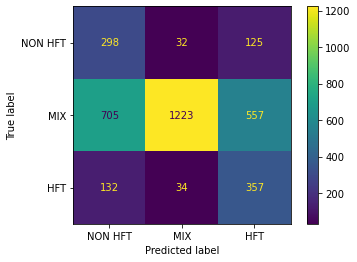

In [122]:
varkfold = KFold(n_splits=10, shuffle=True, random_state=1)
n_scores_log = cross_val_score(pipeline_LogReg, X_train, y_train,scoring='accuracy', cv=varkfold)
print('Mean Accuracy: %.3f (%.3f)' % (n_scores_log.mean(), n_scores_log.std()))
pipeline_LogReg.fit(X_train_pca,y_train_pca)

y_pred_LogReg=pipeline_LogReg.predict(X_test_pca)
cm_logReg=confusion_matrix(y_test_pca,y_pred_LogReg)
print('confusion matrix logistique regression',cm_logReg)
cmd_logReg = ConfusionMatrixDisplay(cm_logReg, display_labels=['NON HFT','MIX', 'HFT'])
cmd_logReg.plot()

print(pipeline_LogReg.score)

Mean Accuracy: 0.685 (0.011)
confusion matrix logistique regression [[ 378   26   51]
 [ 523 1535  427]
 [  95   19  409]]


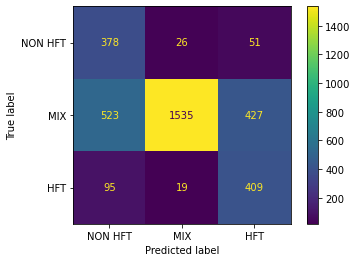

In [123]:
varkfold = KFold(n_splits=10, shuffle=True, random_state=1)
n_scores_Rf = cross_val_score(pipeline_Rf, X_train_pca, y_train_pca,scoring='accuracy', cv=varkfold)
print('Mean Accuracy: %.3f (%.3f)' % (n_scores_Rf.mean(), n_scores_Rf.std()))
pipeline_Rf.fit(X_train_pca,y_train_pca)

y_pred_Rf=pipeline_Rf.predict(X_test_pca)
cm_Rf=confusion_matrix(y_test_pca,y_pred_Rf)
print('confusion matrix logistique regression',cm_Rf)
cmd_Rf = ConfusionMatrixDisplay(cm_Rf, display_labels=['NON HFT','MIX', 'HFT'])
cmd_Rf.plot()

Mean Accuracy: 0.609 (0.008)
confusion matrix logistique regression [[ 349   19   87]
 [ 676 1305  504]
 [ 110   20  393]]


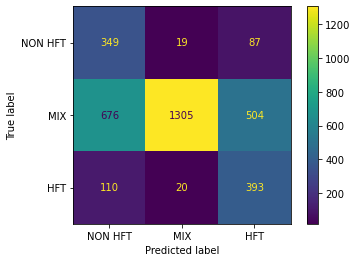

In [124]:
varkfold = KFold(n_splits=10, shuffle=True, random_state=1)
n_scores_XG = cross_val_score(pipeline_XG, X_train_pca, y_train_pca,scoring='accuracy', cv=varkfold)
print('Mean Accuracy: %.3f (%.3f)' % (n_scores_XG.mean(), n_scores_XG.std()))
pipeline_XG.fit(X_train_pca,y_train_pca)

y_pred_XG=pipeline_XG.predict(X_test_pca)
cm_XG=confusion_matrix(y_test_pca,y_pred_XG)
print('confusion matrix logistique regression',cm_XG)
cmd_XG = ConfusionMatrixDisplay(cm_XG, display_labels=['NON HFT','MIX', 'HFT'])
cmd_XG.plot()

Mean Accuracy: 0.539 (0.009)
confusion matrix logistique regression [[ 301   29  125]
 [ 698 1207  580]
 [ 136   32  355]]


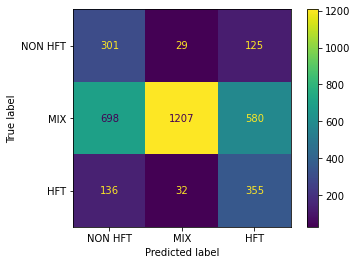

In [125]:
varkfold = KFold(n_splits=10, shuffle=True, random_state=1)
n_scores_LDA= cross_val_score(pipeline_LDA, X_train_pca, y_train_pca,scoring='accuracy', cv=varkfold)
print('Mean Accuracy: %.3f (%.3f)' % (n_scores_LDA.mean(), n_scores_LDA.std()))
pipeline_LDA.fit(X_train_pca,y_train_pca)

y_pred_LDA=pipeline_LDA.predict(X_test_pca)
cm_LDA=confusion_matrix(y_test_pca,y_pred_LDA)
print('confusion matrix logistique regression',cm_LDA)
cmd_LDA = ConfusionMatrixDisplay(cm_LDA, display_labels=['NON HFT','MIX', 'HFT'])
cmd_LDA.plot()
plt.show()

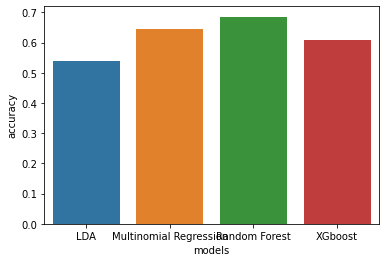

In [126]:
model_accuracy=[n_scores_LDA.mean(), n_scores_log.mean(), n_scores_Rf.mean(), n_scores_XG.mean()]
model_names=['LDA', 'Multinomial Regression', 'Random Forest', 'XGboost']
df_model=pd.DataFrame({'accuracy': model_accuracy,'models' : model_names})
sns.barplot(data=df_model,y='accuracy',x='models')
plt.show()

We see that it is the random forest that is the best algorithm.
Regarding the comparison between the dimensionality reduction and the variable selection, the variable selection is better.